---

In [1]:
#Essential data science libraries
import pandas as pd
import seaborn as sns
import glob
import pickle
import os
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
#Graphing…
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':25,
     'ytick.labelsize':25,
     'axes.labelsize': 25,
     'legend.fontsize': 25,
     'axes.titlesize':45,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

## Chargement des données et Analyse exploratoire

In [4]:
%%time 
application_train = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

CPU times: user 15.1 s, sys: 3.6 s, total: 18.7 s
Wall time: 19.4 s


In [5]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description = pd.read_csv('data/HomeCredit_columns_description.csv',  encoding="ISO-8859-1")
description

DOCUMENTATION :


Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

In [6]:
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        data = pd.read_csv(file)
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype', 'MB_Memory'], 
                                                   orient='index')
    print("SUMMARY FILES…")
    return(comparative_table)

In [7]:
def features(folder):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''
    
    data_object = {}
    data_numeric = {}
    
    for file in folder:
        data = pd.read_csv(file)
        
        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

### EDA application_train.csv | test.csv
La première partie permet d'illustrer globalement les données disponibles. Il est nécessaire d'approfondir l'analyse des features du ou des principaux fichiers.

In [8]:
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [9]:
#Check if 'TARGET' is the only difference ;-)
display(application_train.columns.difference(application_test.columns))
print("Check theses two files for Train (with TARGET) and Test (without TARGET).")

Index(['TARGET'], dtype='object')

Check theses two files for Train (with TARGET) and Test (without TARGET).


In [10]:
#Distribution of the Target Column
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

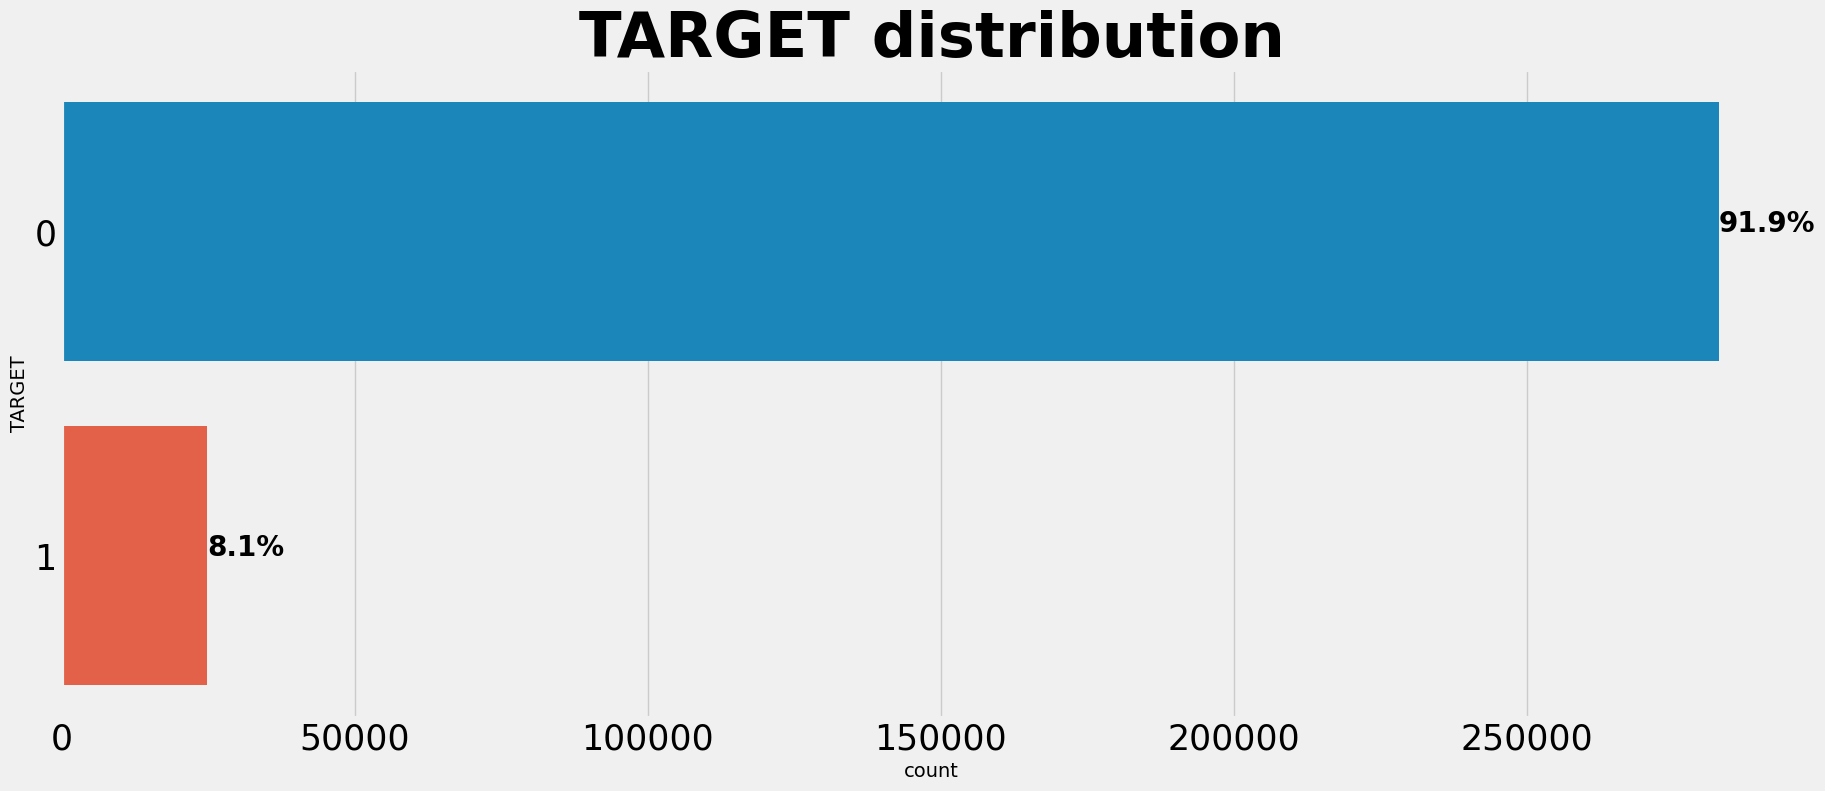

In [11]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=application_train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
show()

Notons des classes déséquilibrées. Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

### Types de colonnes
Analyse rapide du type de features, mais surtout établir un aperçu afin de pouvoir poser une réflexion sur l'encodage des données catégorielles.

In [12]:
#Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
#Number of unique classes in each object column
application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

### Valeurs manquantes
En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

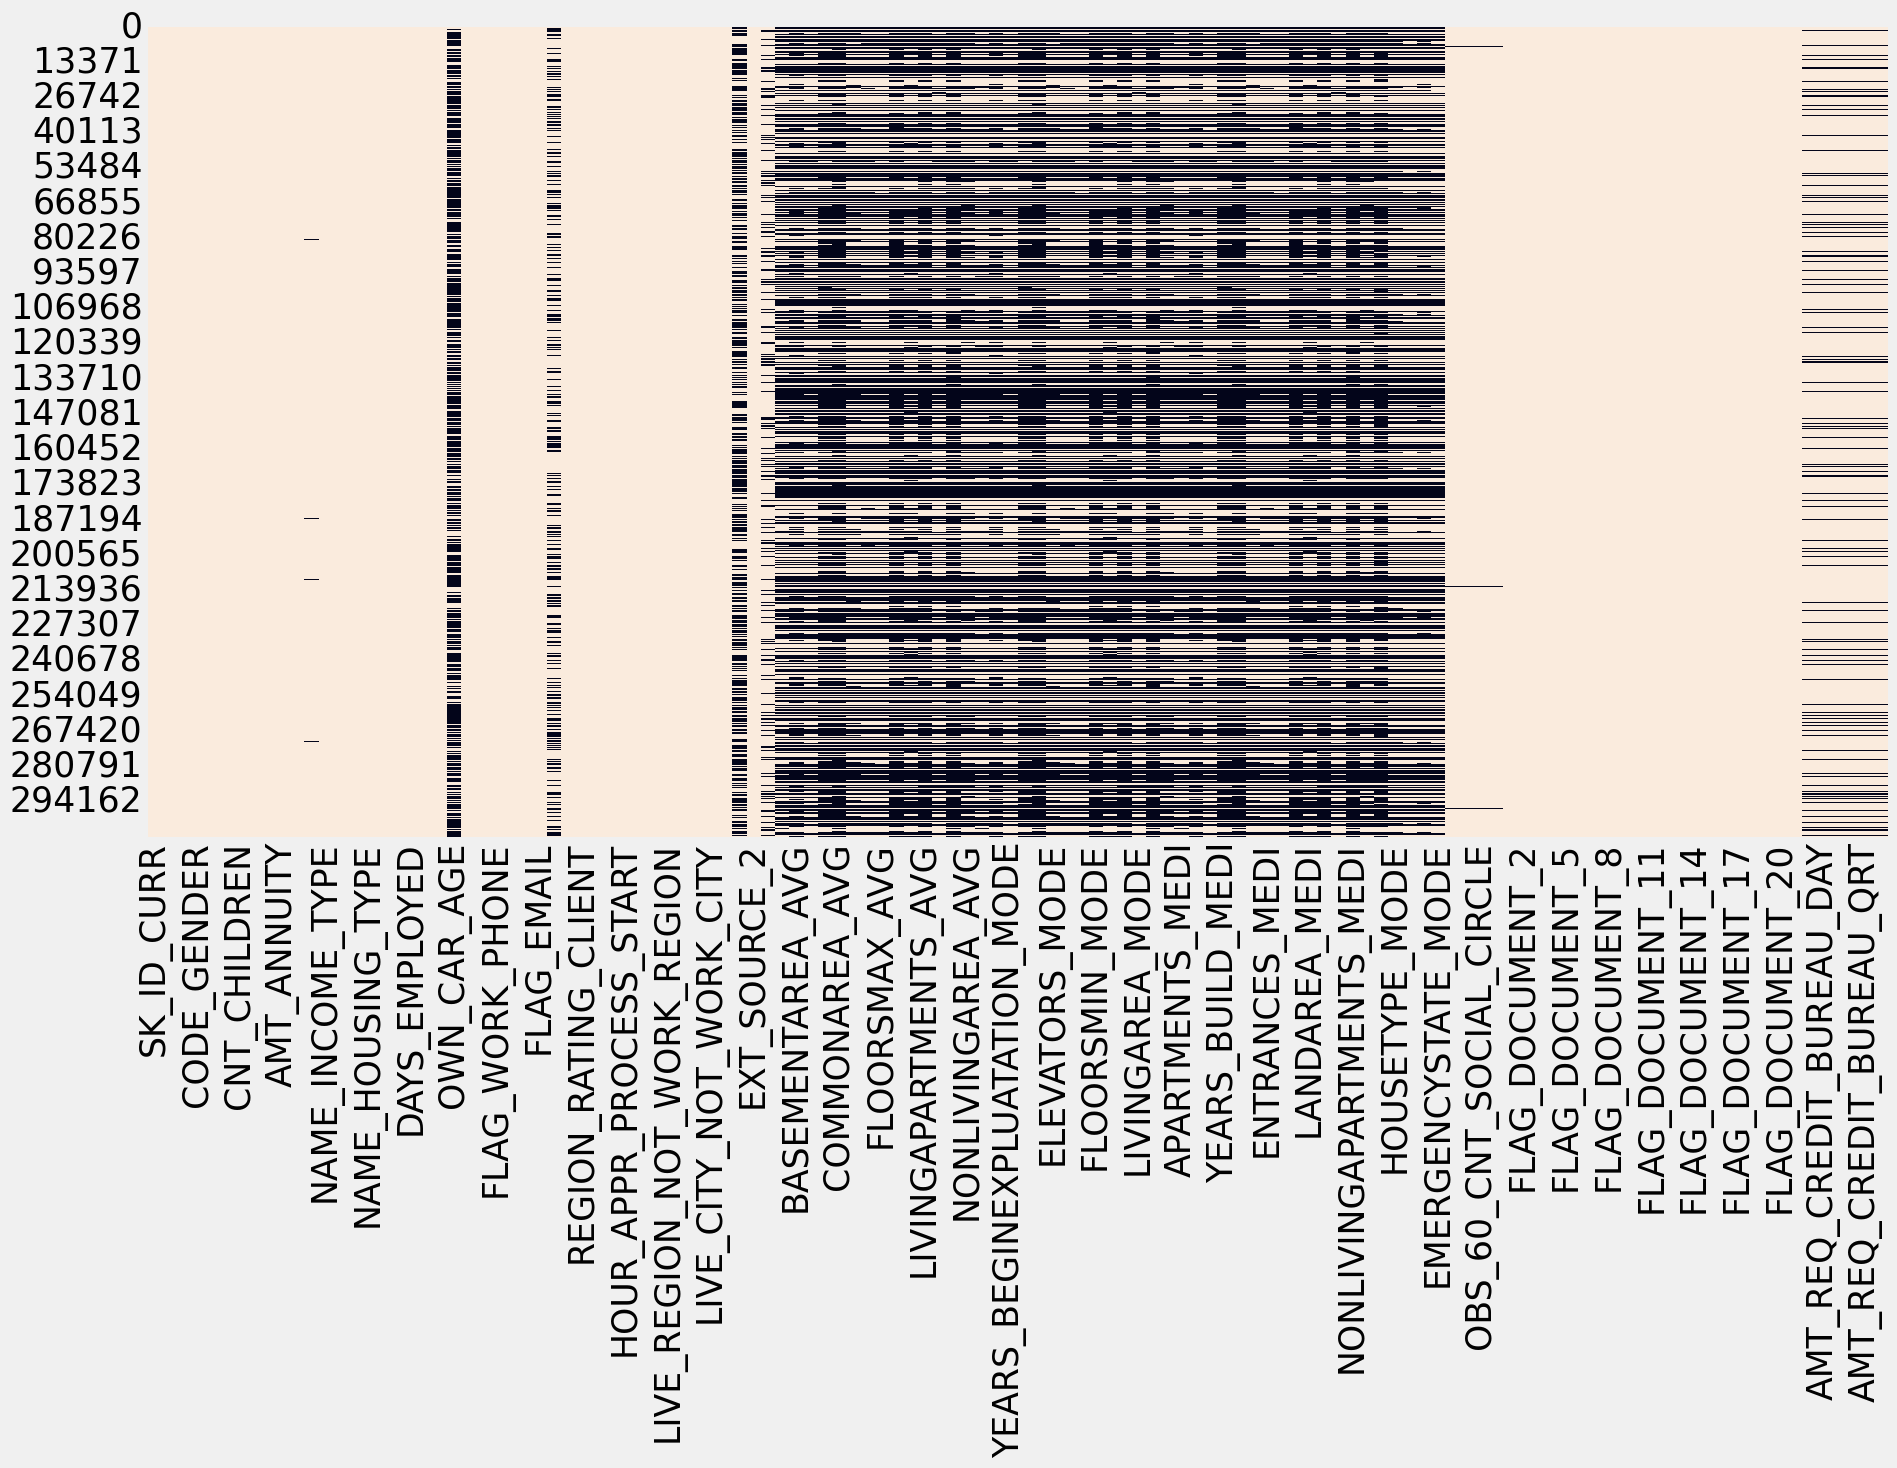

In [14]:
#Global view of the missing values (black)
plt.figure(figsize=(20,10))
sns.heatmap(application_train.notna(), cbar=False)
show()

Une synthèse des données manquantes un peu confuse du fait du grand nombre de variables, mais il se dégage un premier constat qui montre que les NaN sont plus fortement présentent sur les caractéristiques des habitats (et non sur les crédits), comme l'atteste le TOP 10 ci-après…

In [15]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('TOP 10 Missing values from Training dataset')
nan_check(application_train)[:10]

TOP 10 Missing values from Training dataset


Total      %
COMMONAREA_MEDI           214865  69.87
COMMONAREA_AVG            214865  69.87
COMMONAREA_MODE           214865  69.87
NONLIVINGAPARTMENTS_MODE  213514  69.43
NONLIVINGAPARTMENTS_AVG   213514  69.43
NONLIVINGAPARTMENTS_MEDI  213514  69.43
FONDKAPREMONT_MODE        210295  68.39
LIVINGAPARTMENTS_MODE     210199  68.35
LIVINGAPARTMENTS_AVG      210199  68.35
LIVINGAPARTMENTS_MEDI     210199  68.35

In [16]:
print("Nb of columns in the training sample: " + str(len(nan_check(application_train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(application_train)[nan_check(application_train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


### Outliers, valeurs atypiques, anormales
En préambule, le constat est simple, des variables comme 'DAYS_BIRTH' ont des valeurs négatives. Il est donc important de pouvoir analyser et si besoin rectifier ce type de données.

In [17]:
#Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Il est nécessaire de modifier cette variable pour obtenir des chiffres plus compréhensibles pour l'analyse.

In [18]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

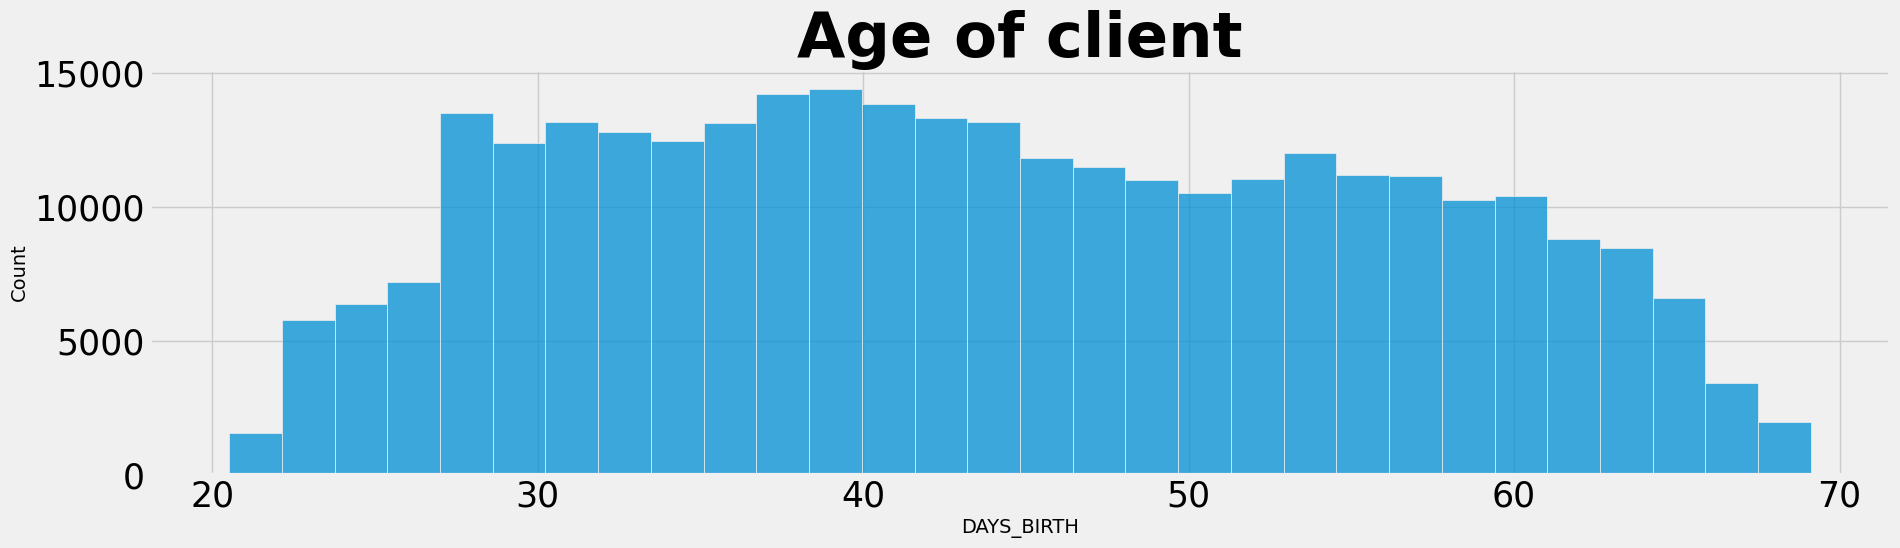

In [19]:
plt.figure(figsize=(20, 5))
sns.histplot((application_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
show()

In [20]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
application_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

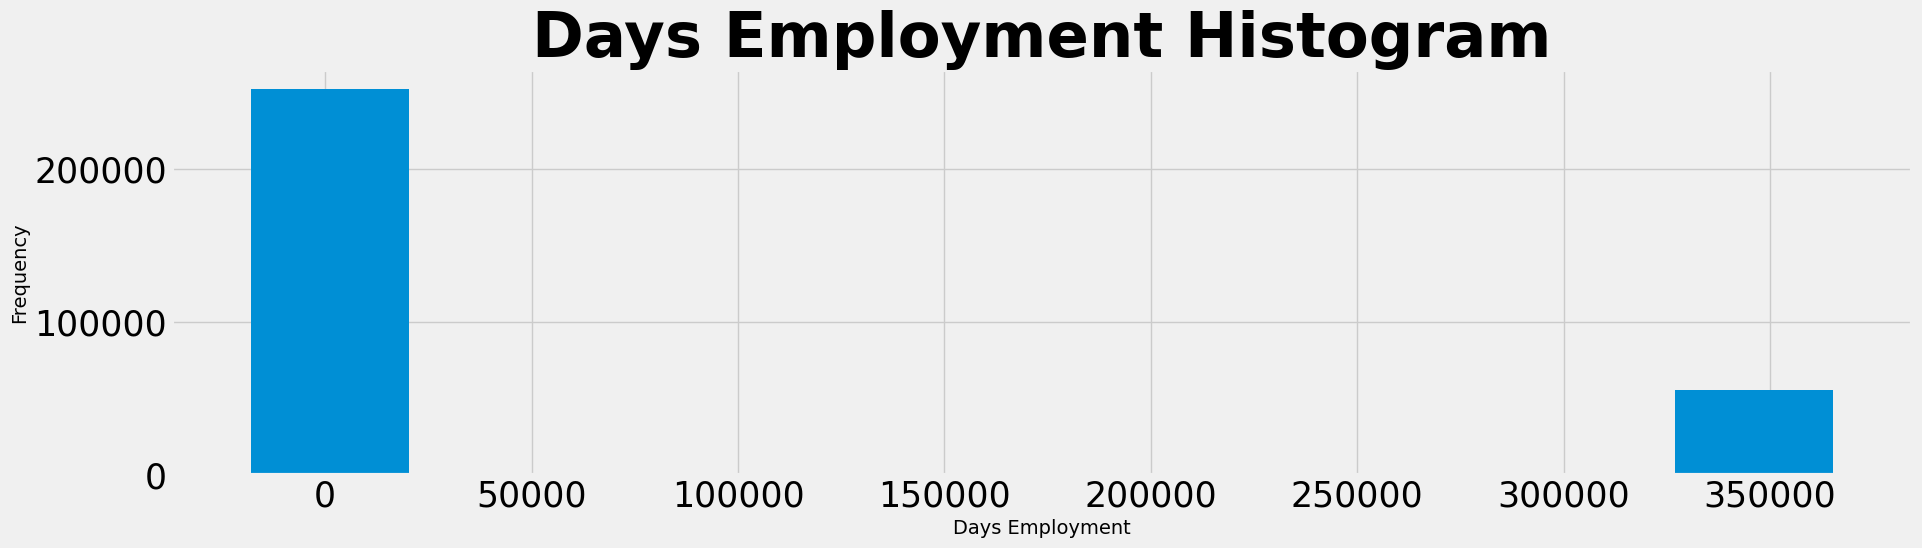

In [22]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5));
plt.xlabel('Days Employment')
show()

Idem ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j).
Est-ce un individu isolé? Plusieurs individus de l'échantillon?

In [23]:
print("%0.0f values with 365243 days employed for training data" % 
      len(application_train[application_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % application_train.shape[0])
print("***********************")
print("%0.0f values with 365243 days employed for testing data" % 
      len(application_test[application_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for testing data" % application_test.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
9274 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


In [24]:
#Create an outliers flag column
application_train['DAYS_EMPLOYED_OUTLIERS'] = application_train["DAYS_EMPLOYED"] == 365243
application_test['DAYS_EMPLOYED_OUTLIERS'] = application_test["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

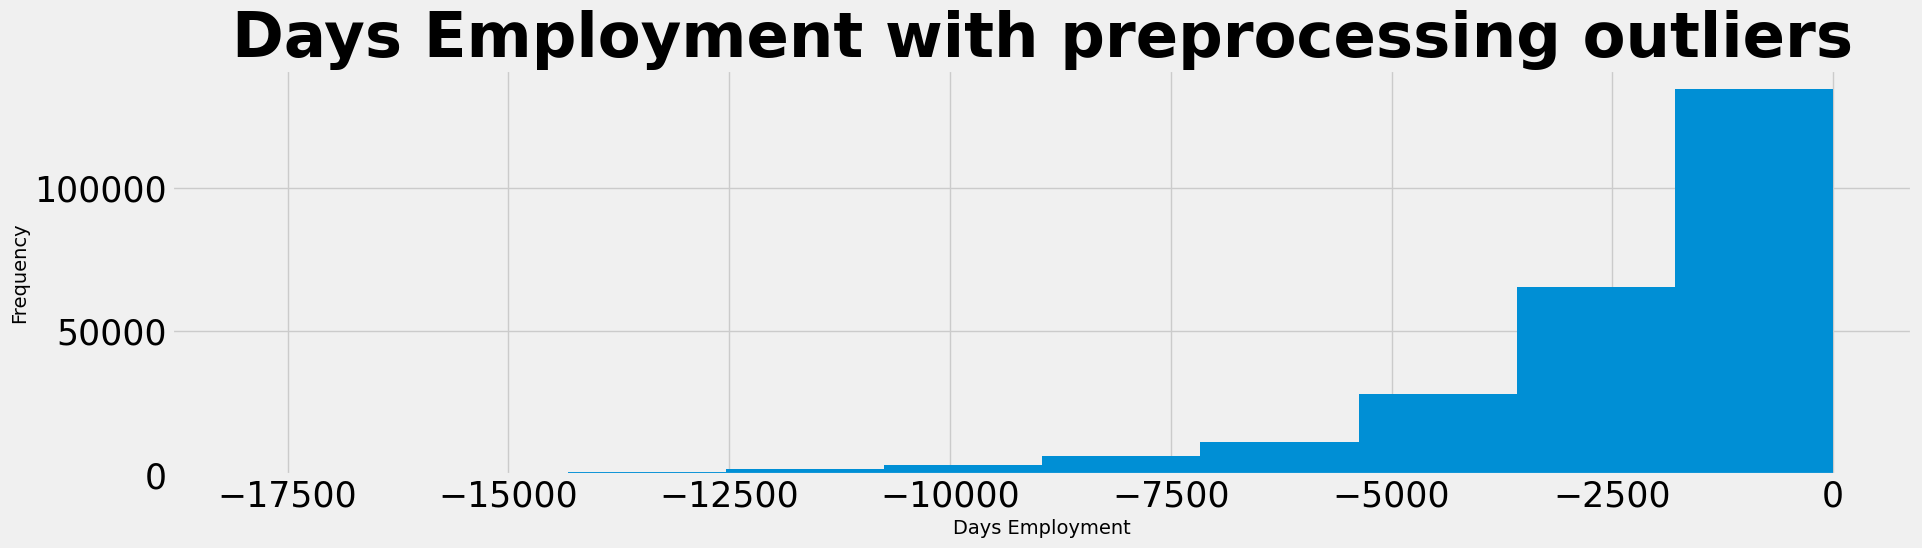

In [25]:
application_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5))
plt.xlabel('Days Employment')
show()

### Fonctions pour faciliter l'analyse des principales variables…
Il est important de se focaliser sur les principales features pouvant être explicatives. Ici l'idée n'est pas de tout analyser en univarié ou multivarié, mais simplement d'avoir une image des points métiers qui aident à orienter nos décisions dans la "prise de risque" à l'attribution d'un crédit.

In [26]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()

In [27]:
def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    show()

**Loan types -** Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

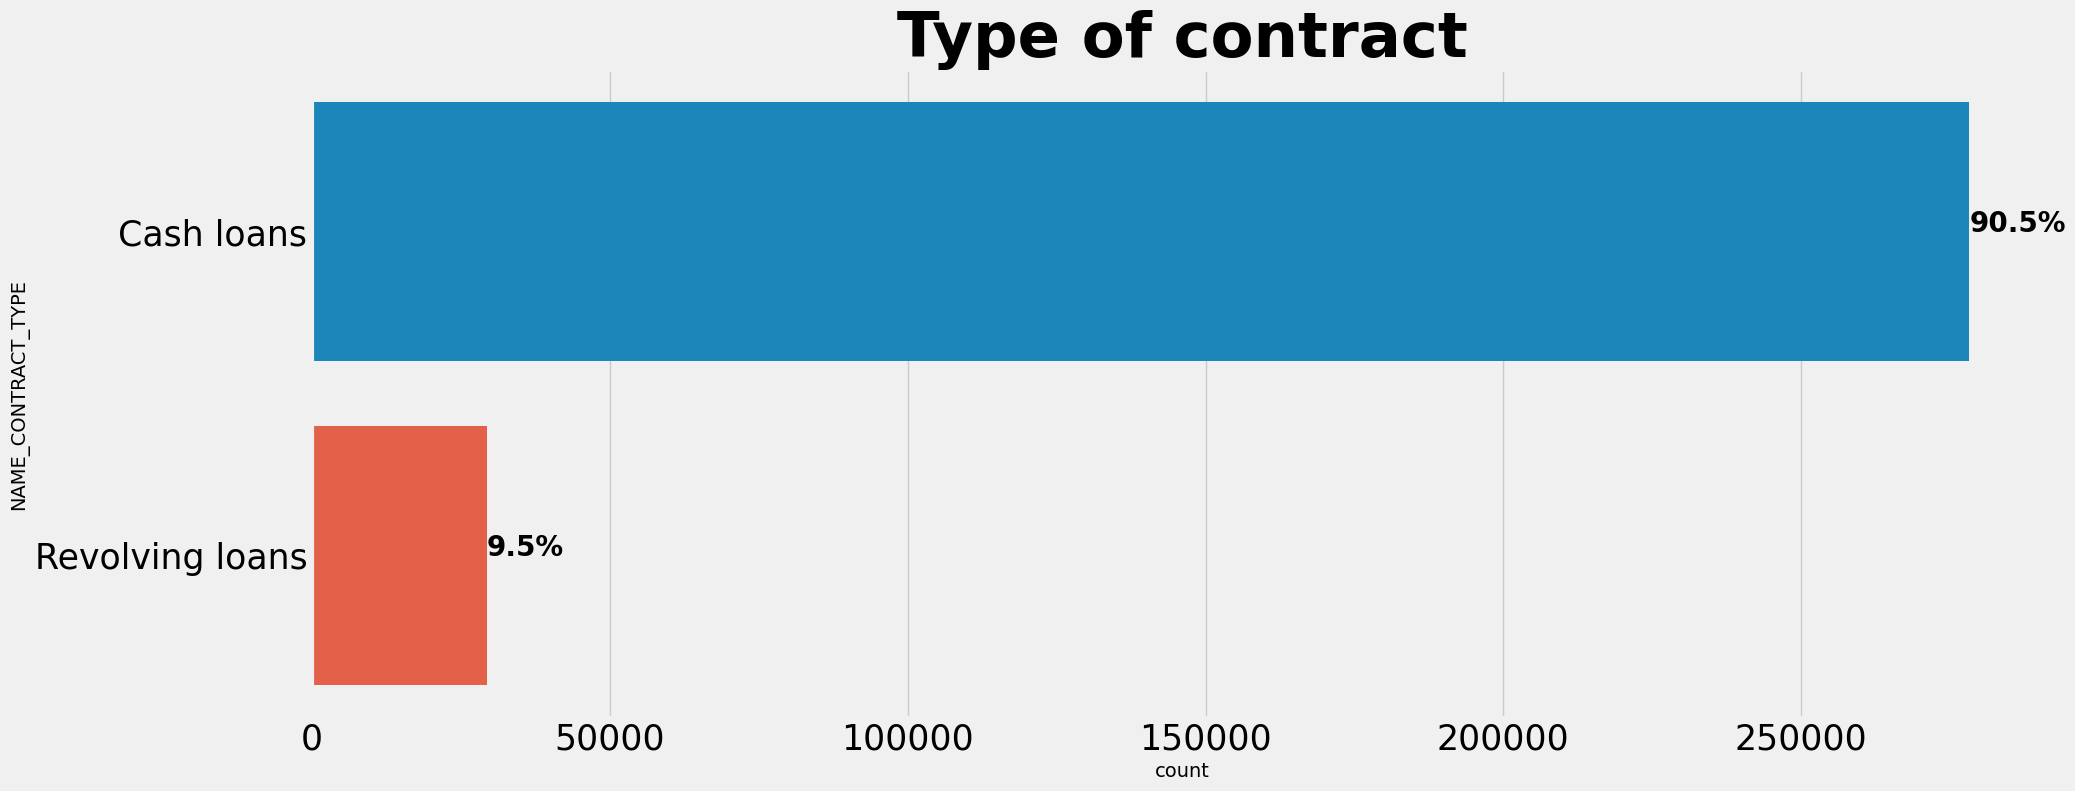

                                   -------------------------------------------------------


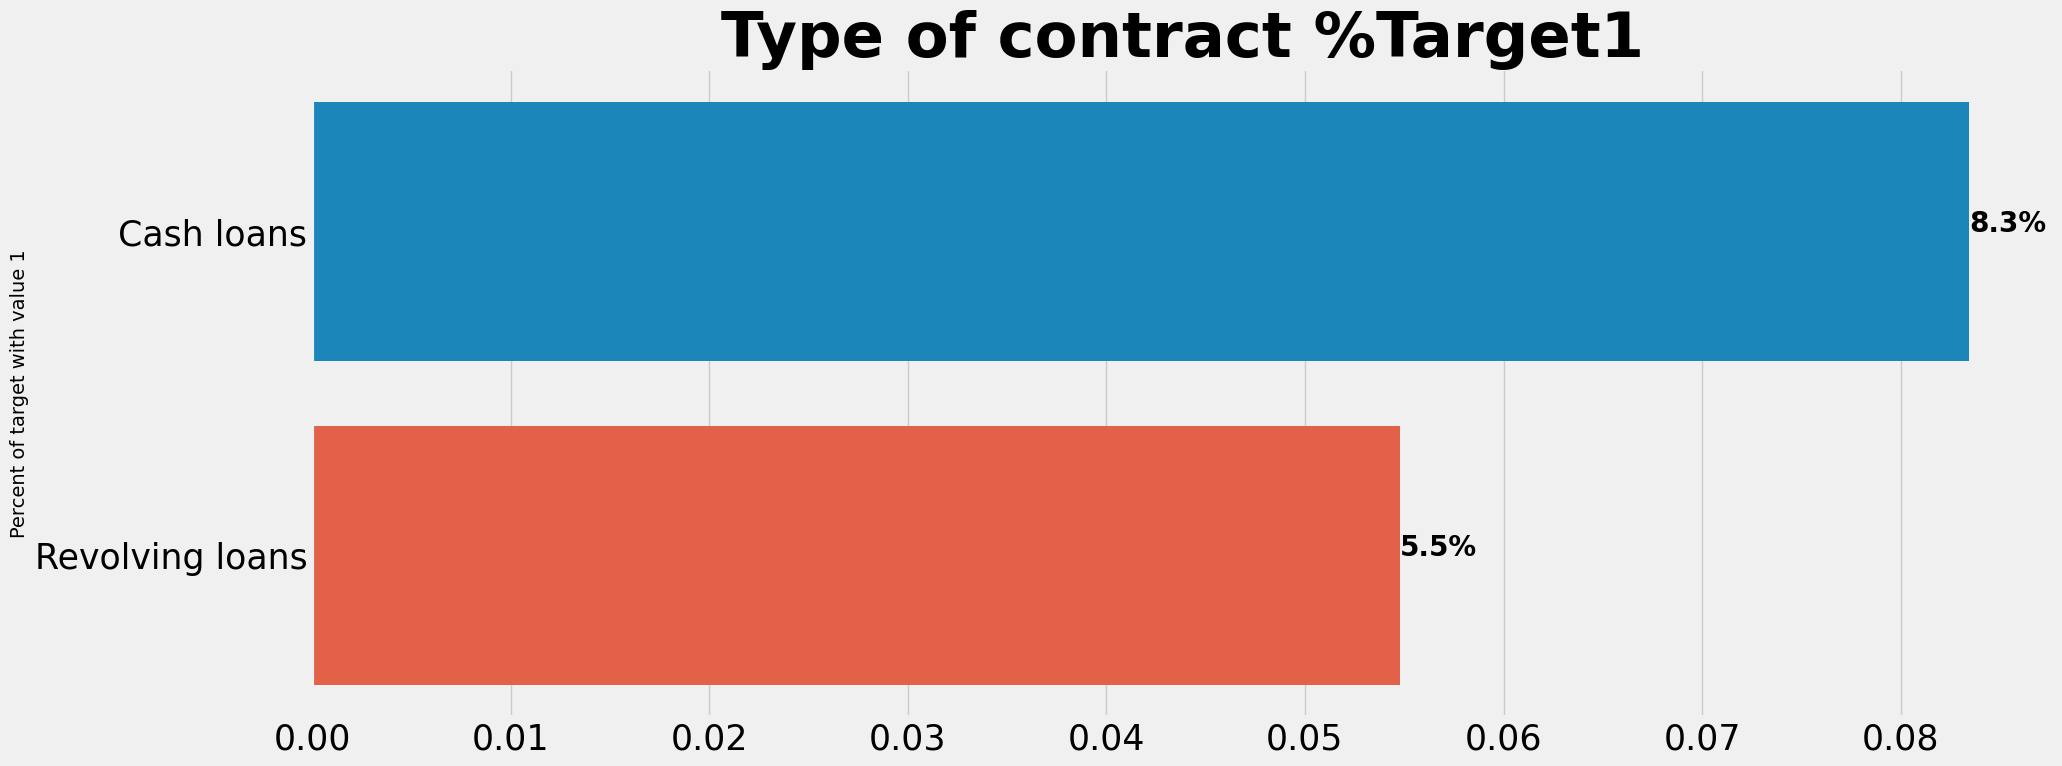

In [28]:
#NAME_CONTRACT_TYPE
plot_stat(application_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

**Client gender -** Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

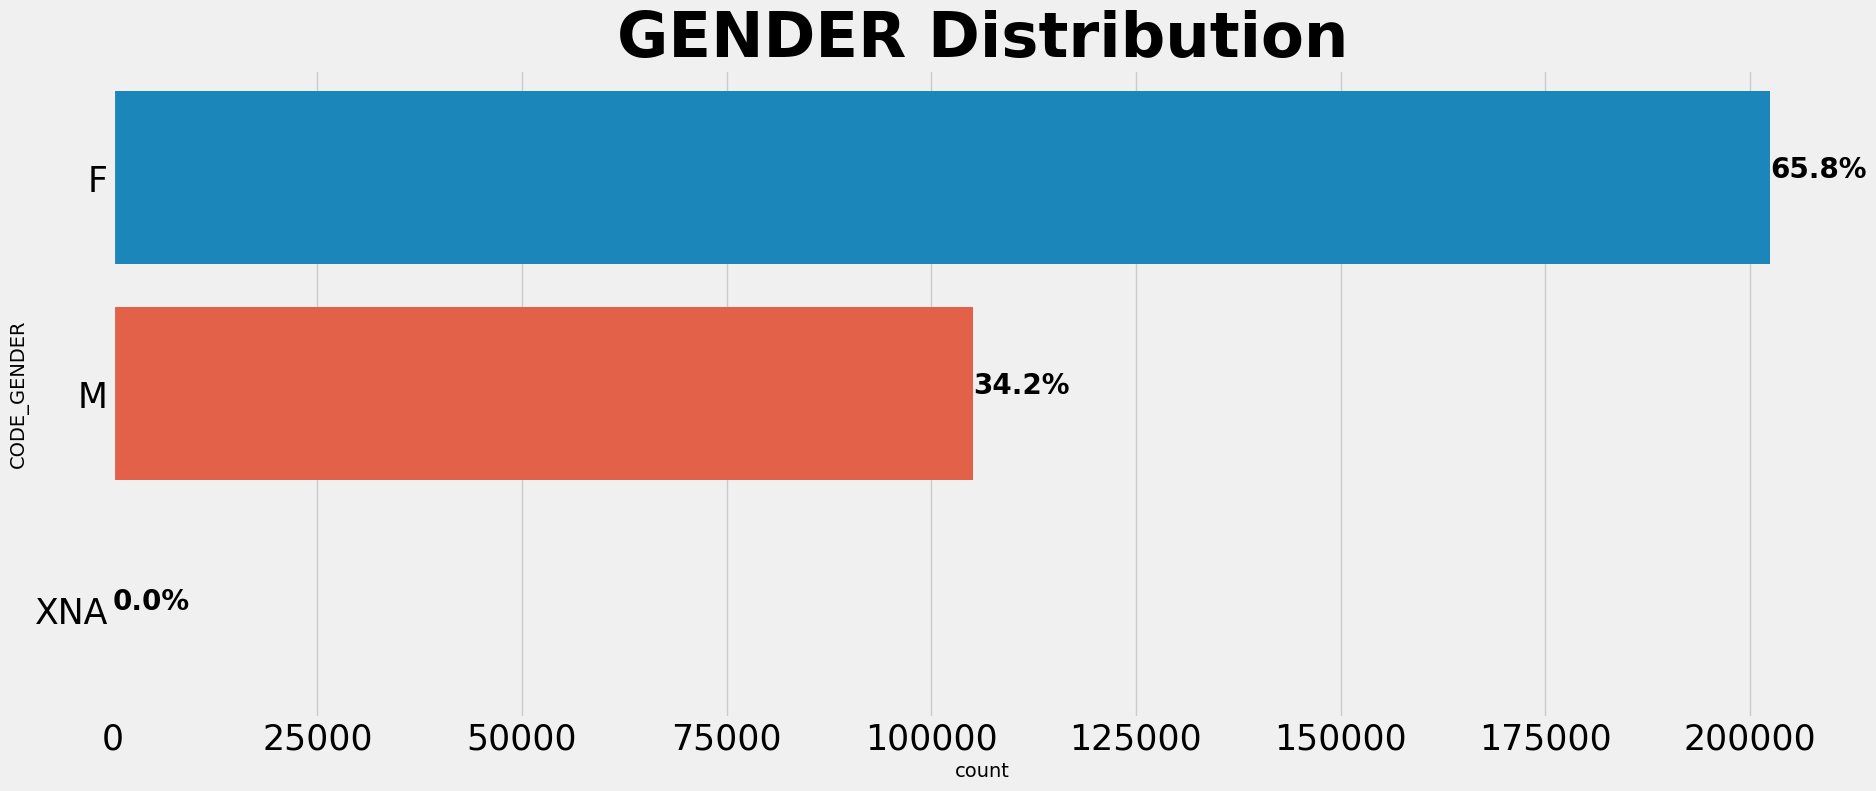

                                   -------------------------------------------------------


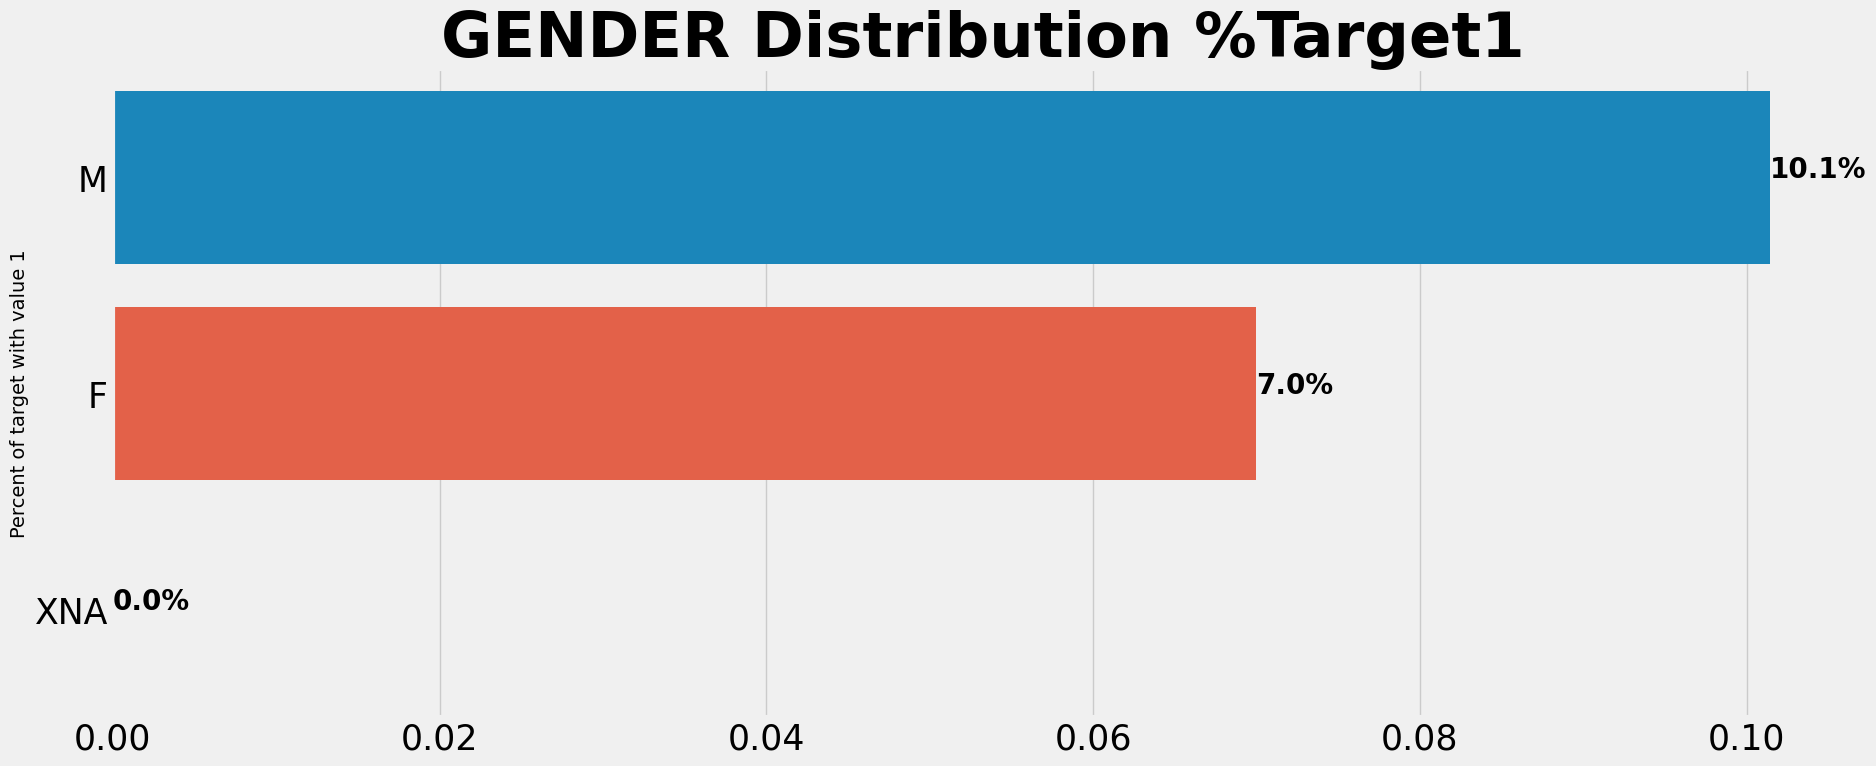

In [29]:
#CODE_GENDER
plot_stat(application_train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

**Flag own car -** Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…

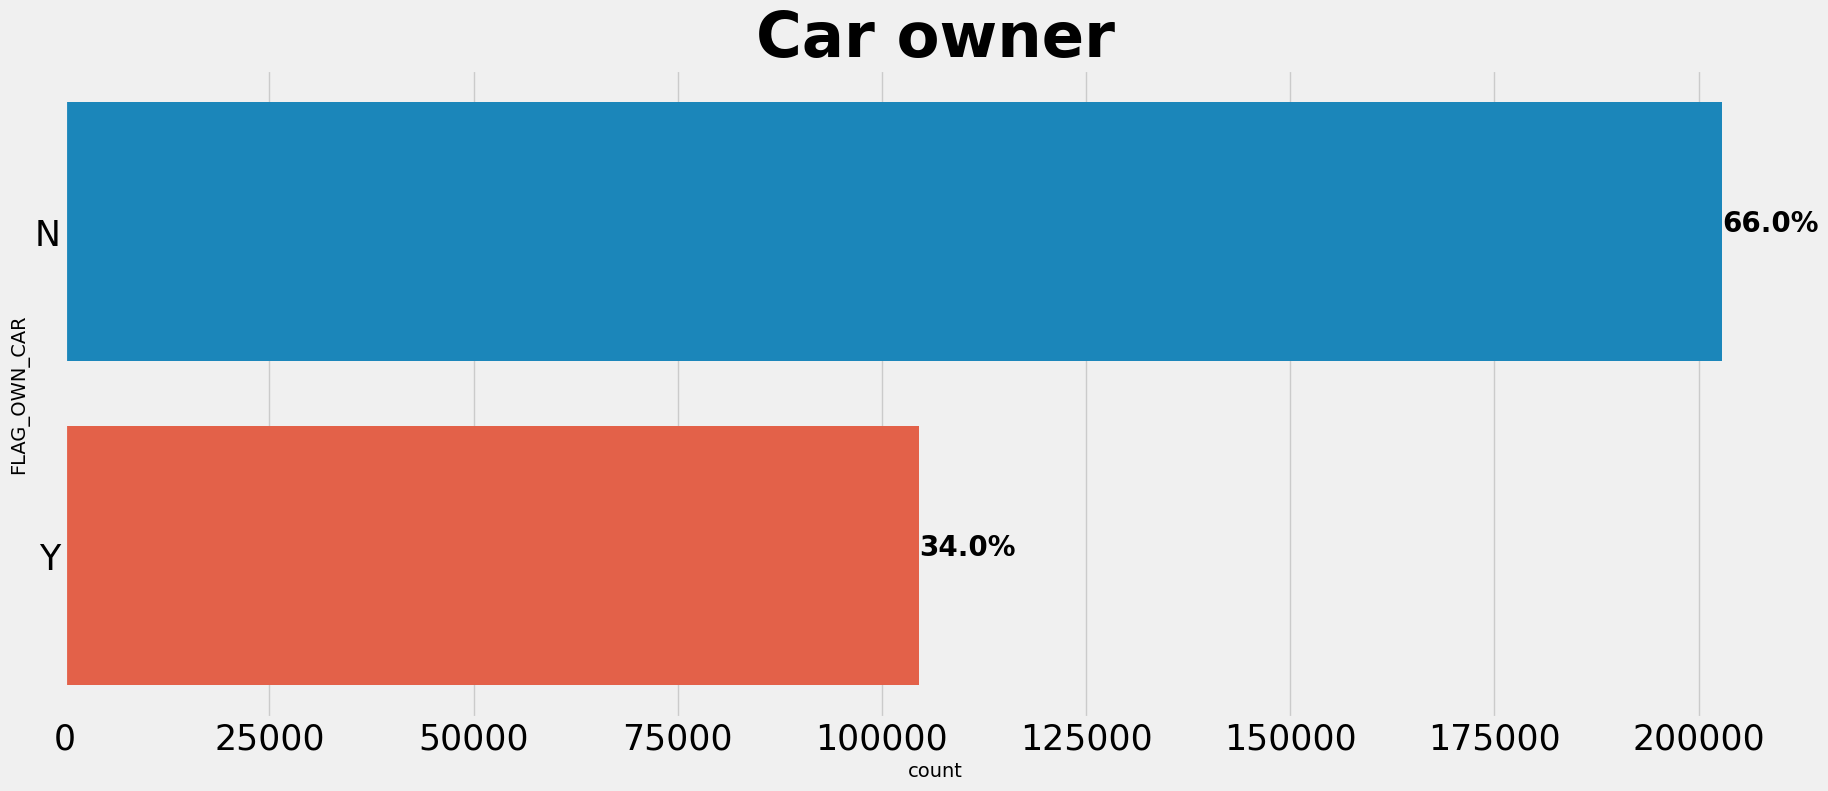

                                   -------------------------------------------------------


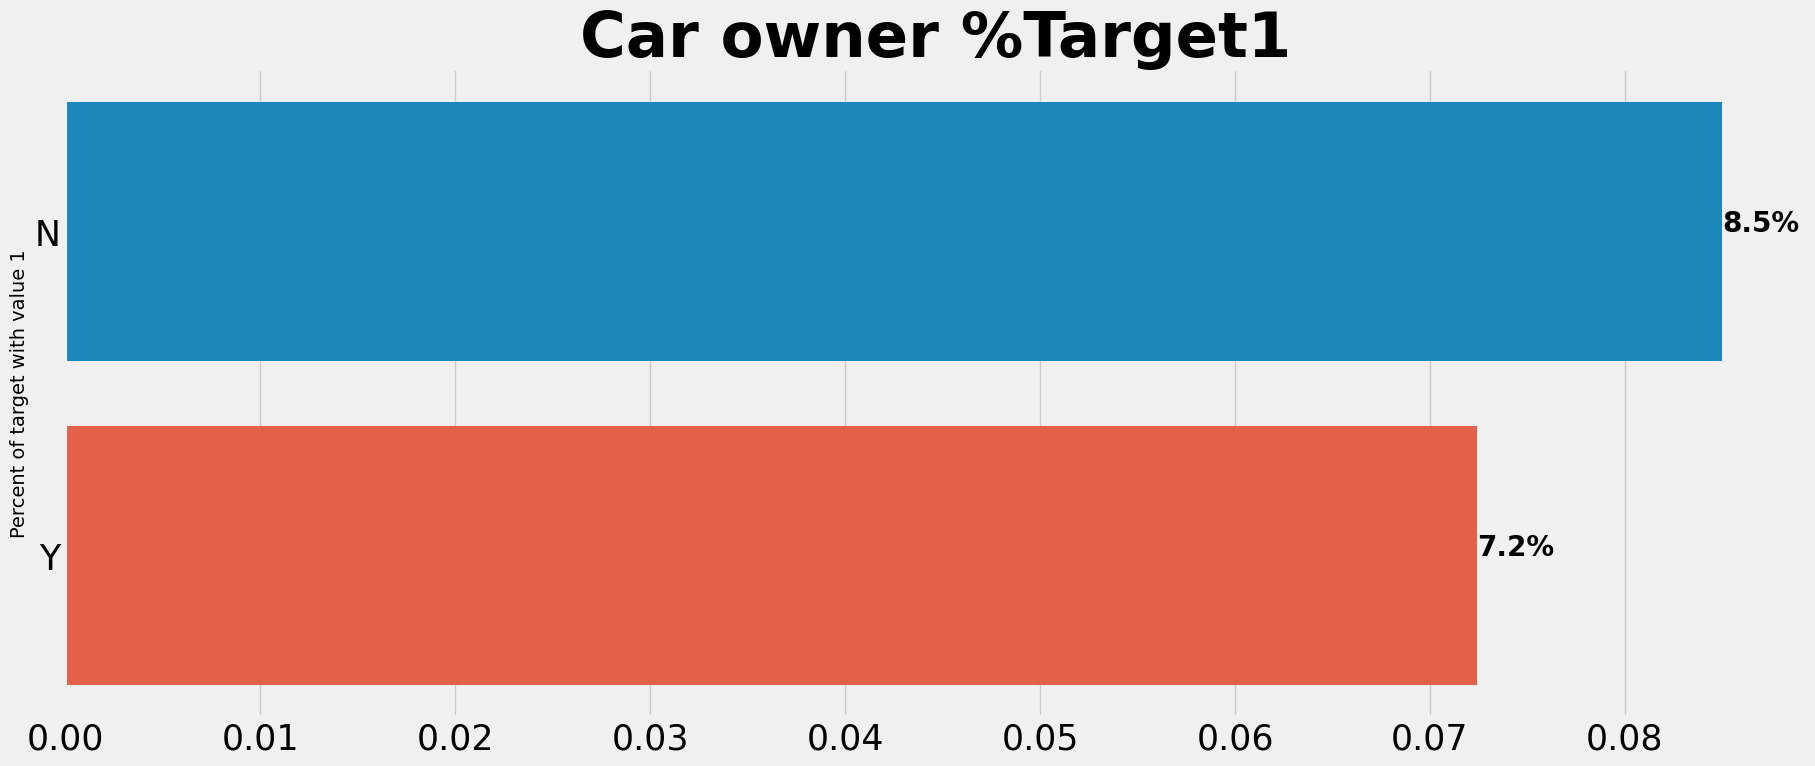

In [30]:
#FLAG_OWN_CAR
plot_stat(application_train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

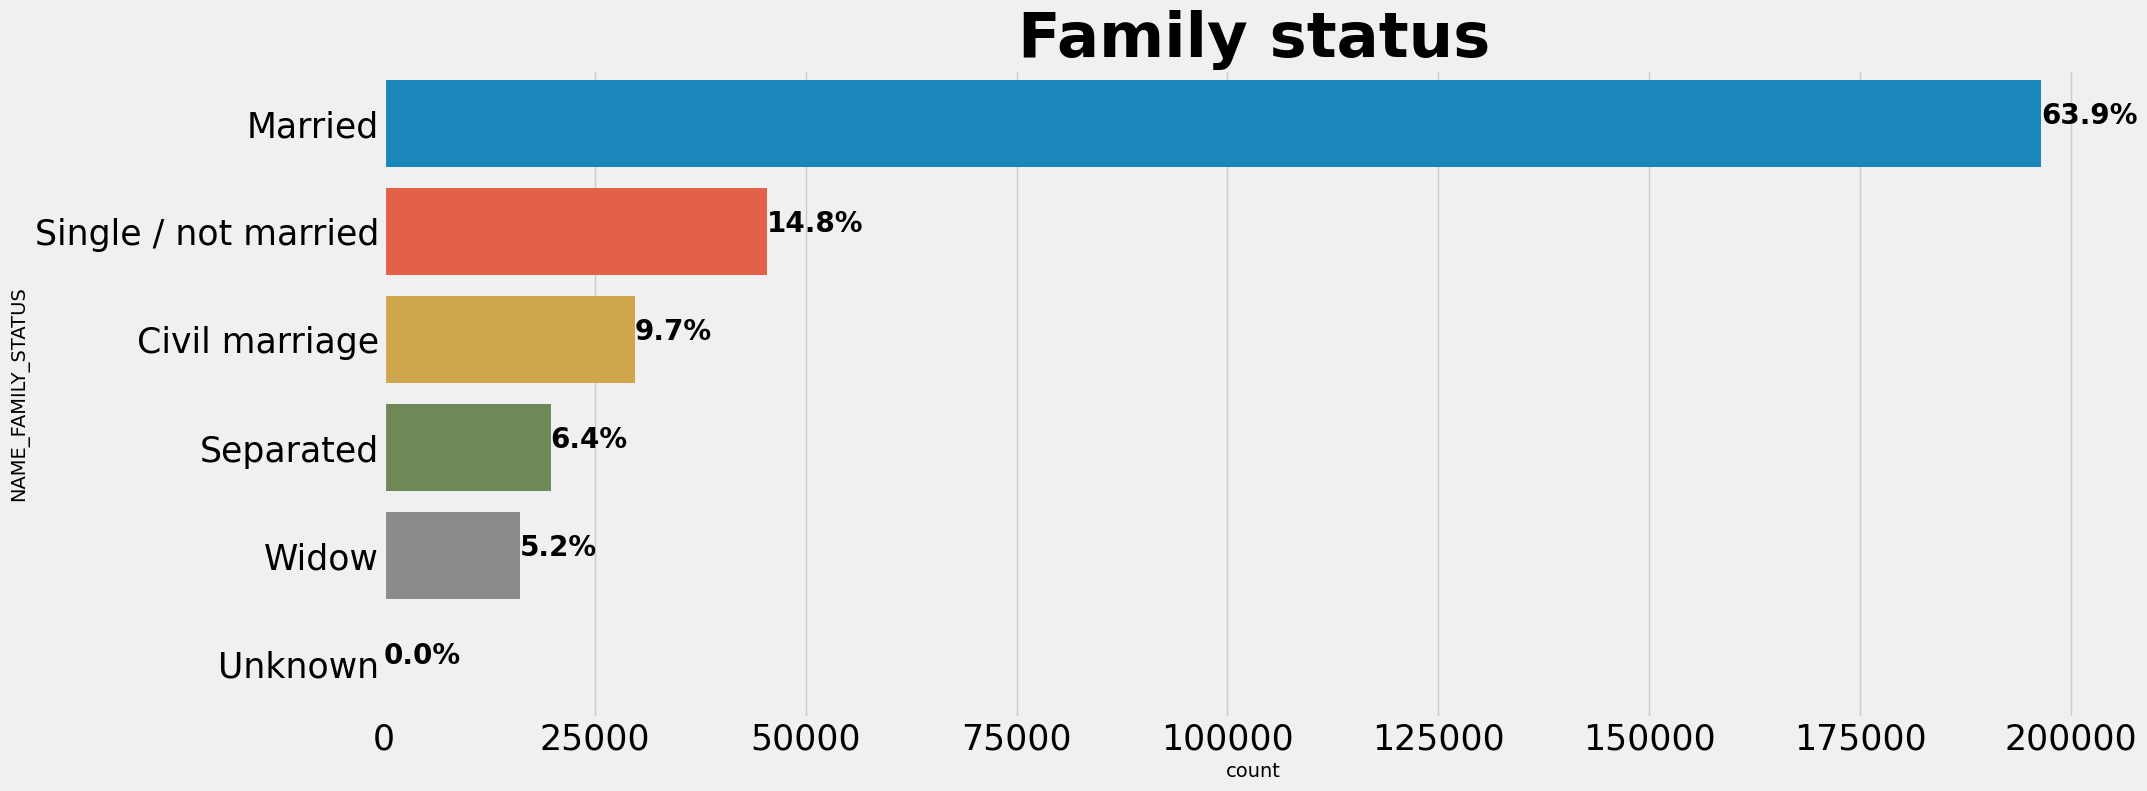

                                   -------------------------------------------------------


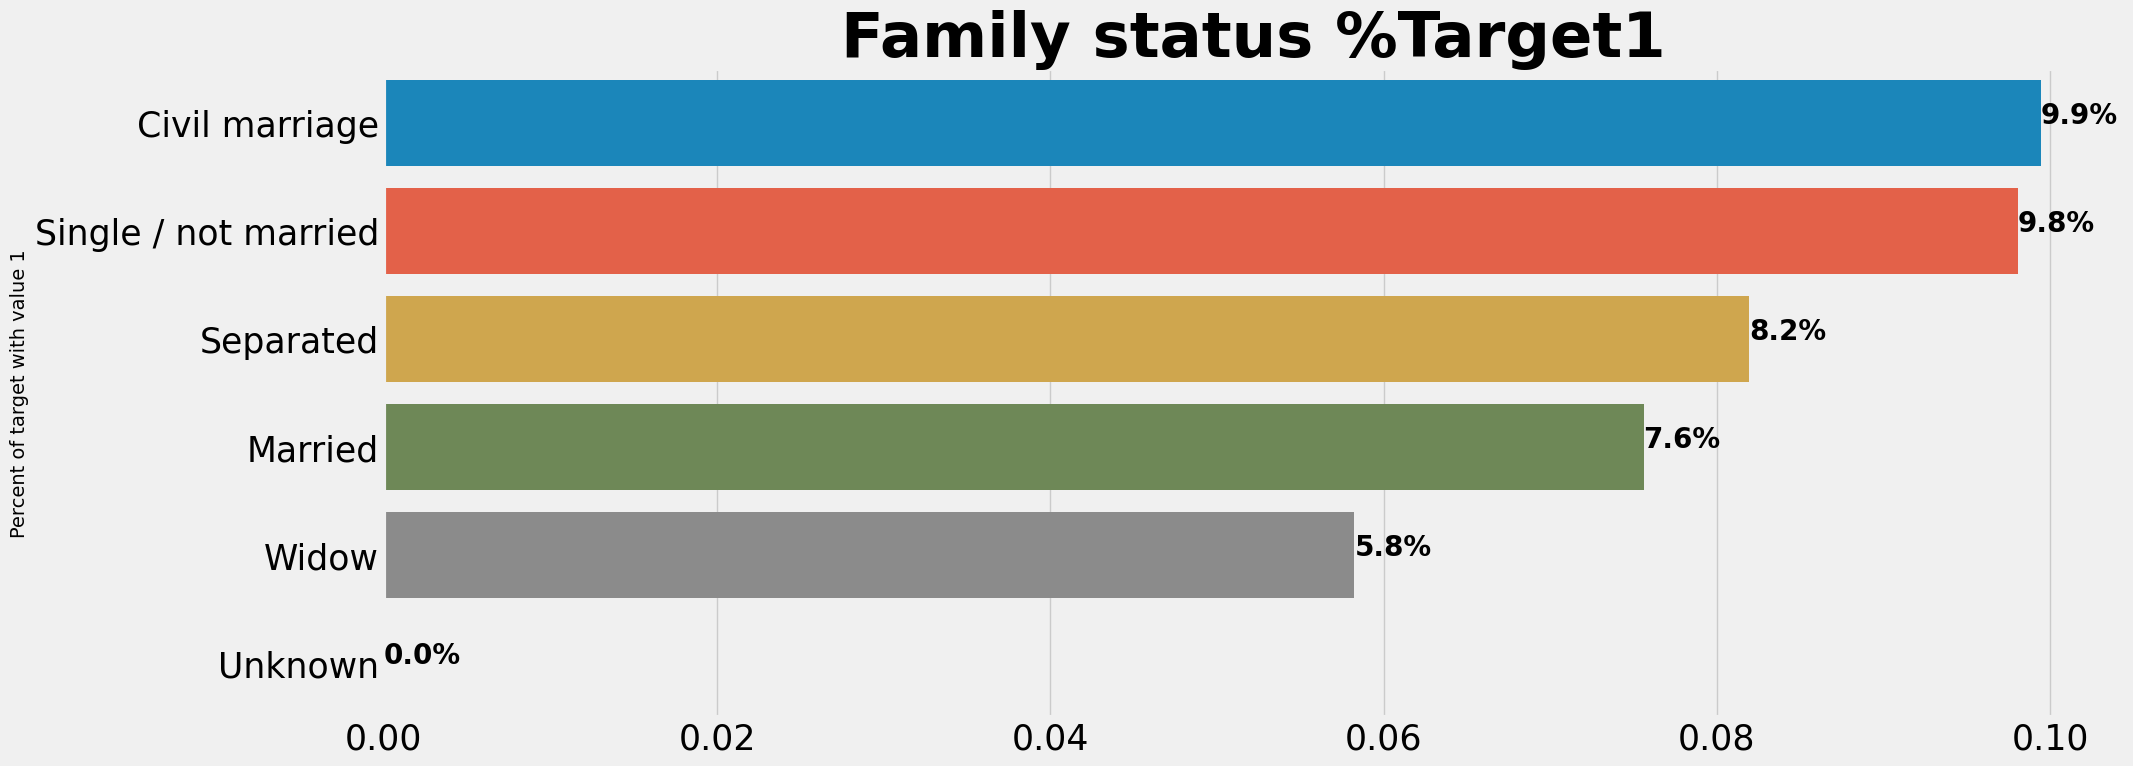

In [31]:
#NAME_FAMILY_STATUS
plot_stat(application_train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

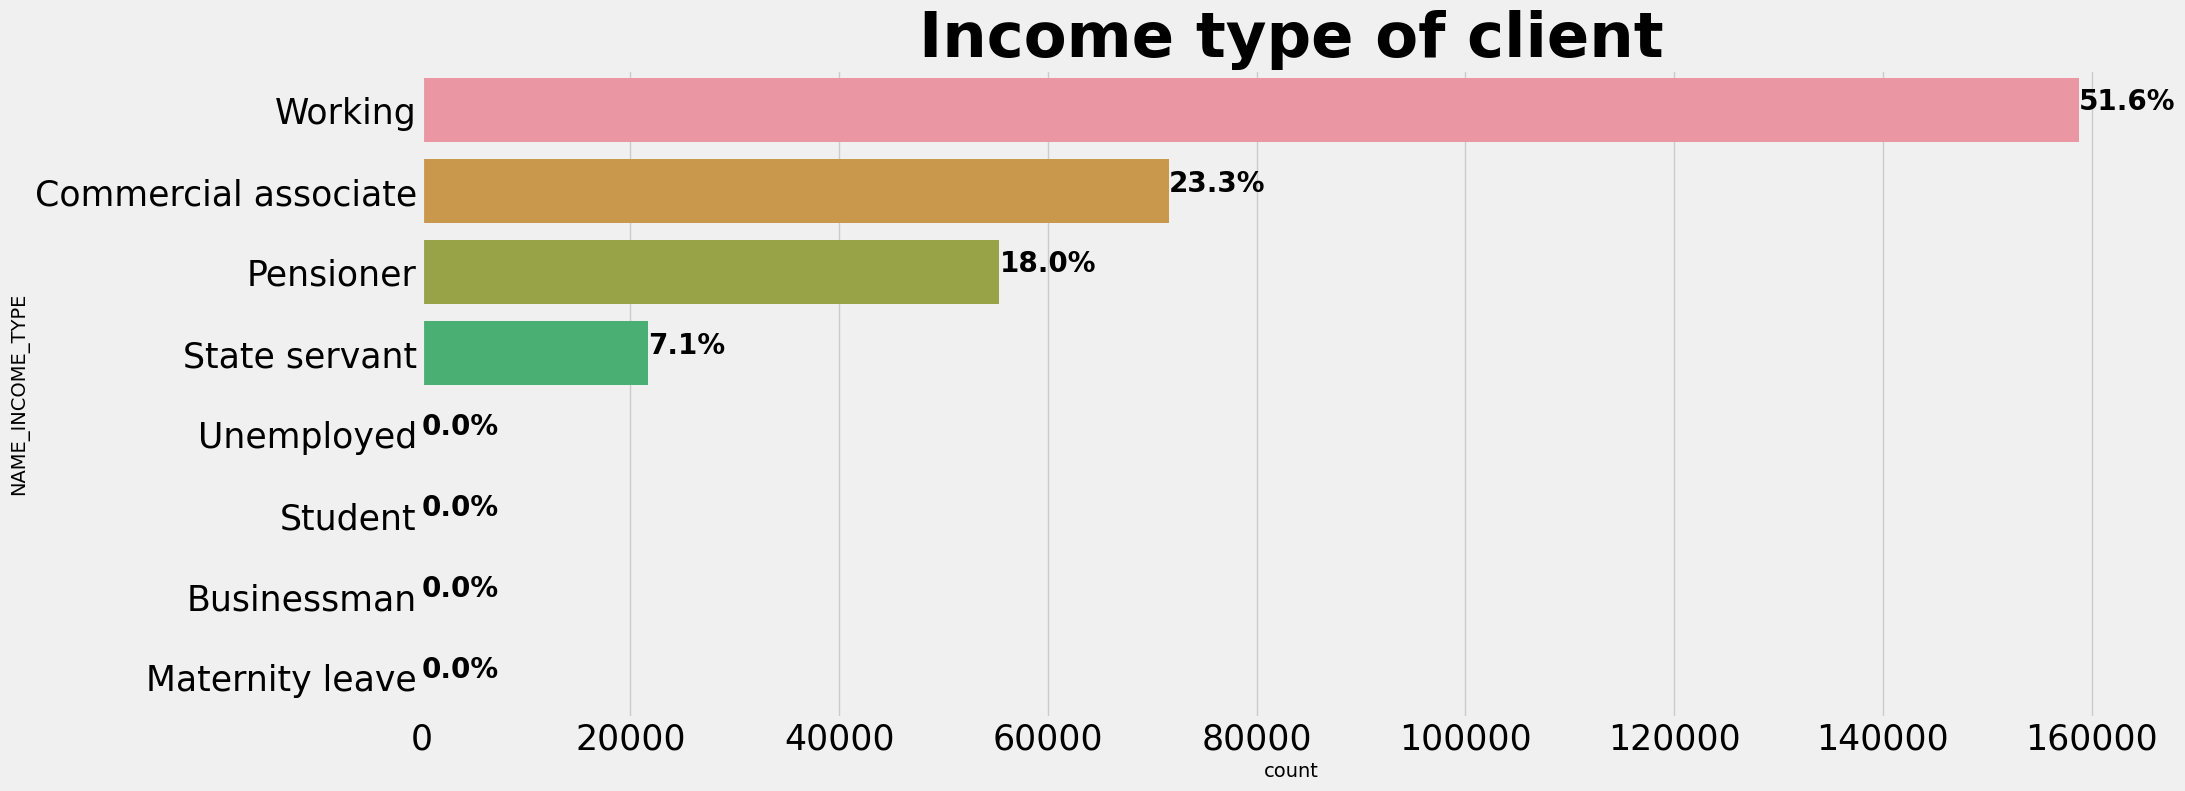

                                   -------------------------------------------------------


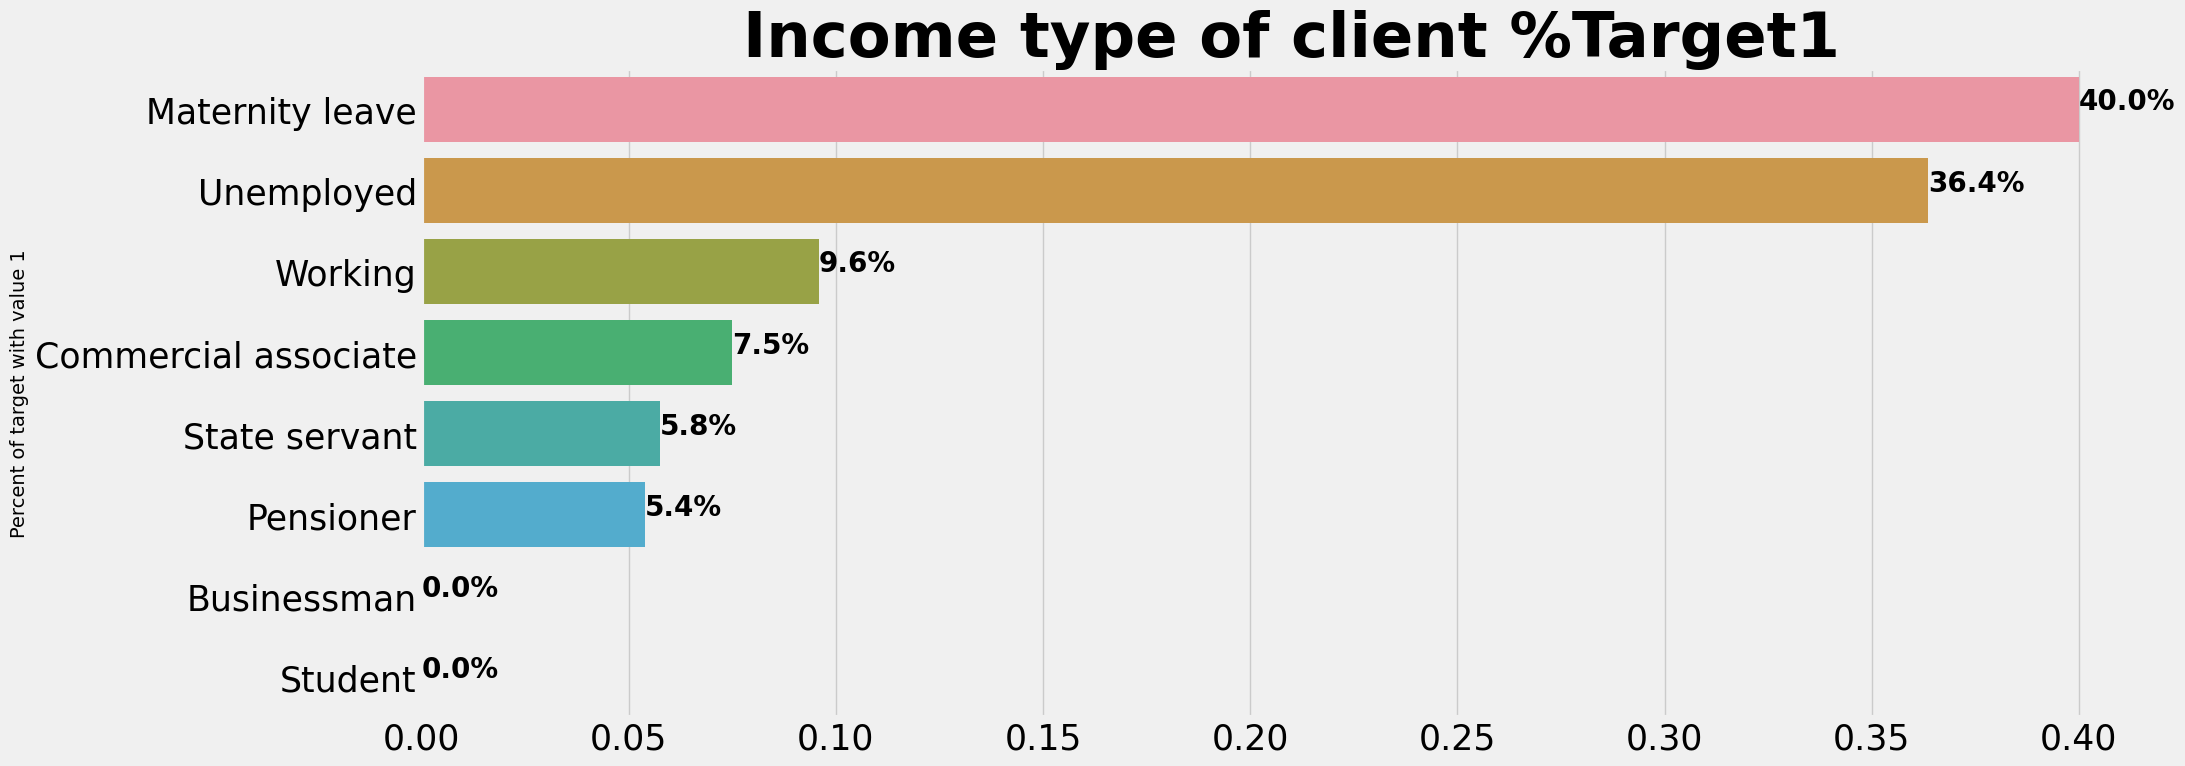

In [32]:
#NAME_INCOME_TYPE
plot_stat(application_train, 'NAME_INCOME_TYPE',"Income type of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

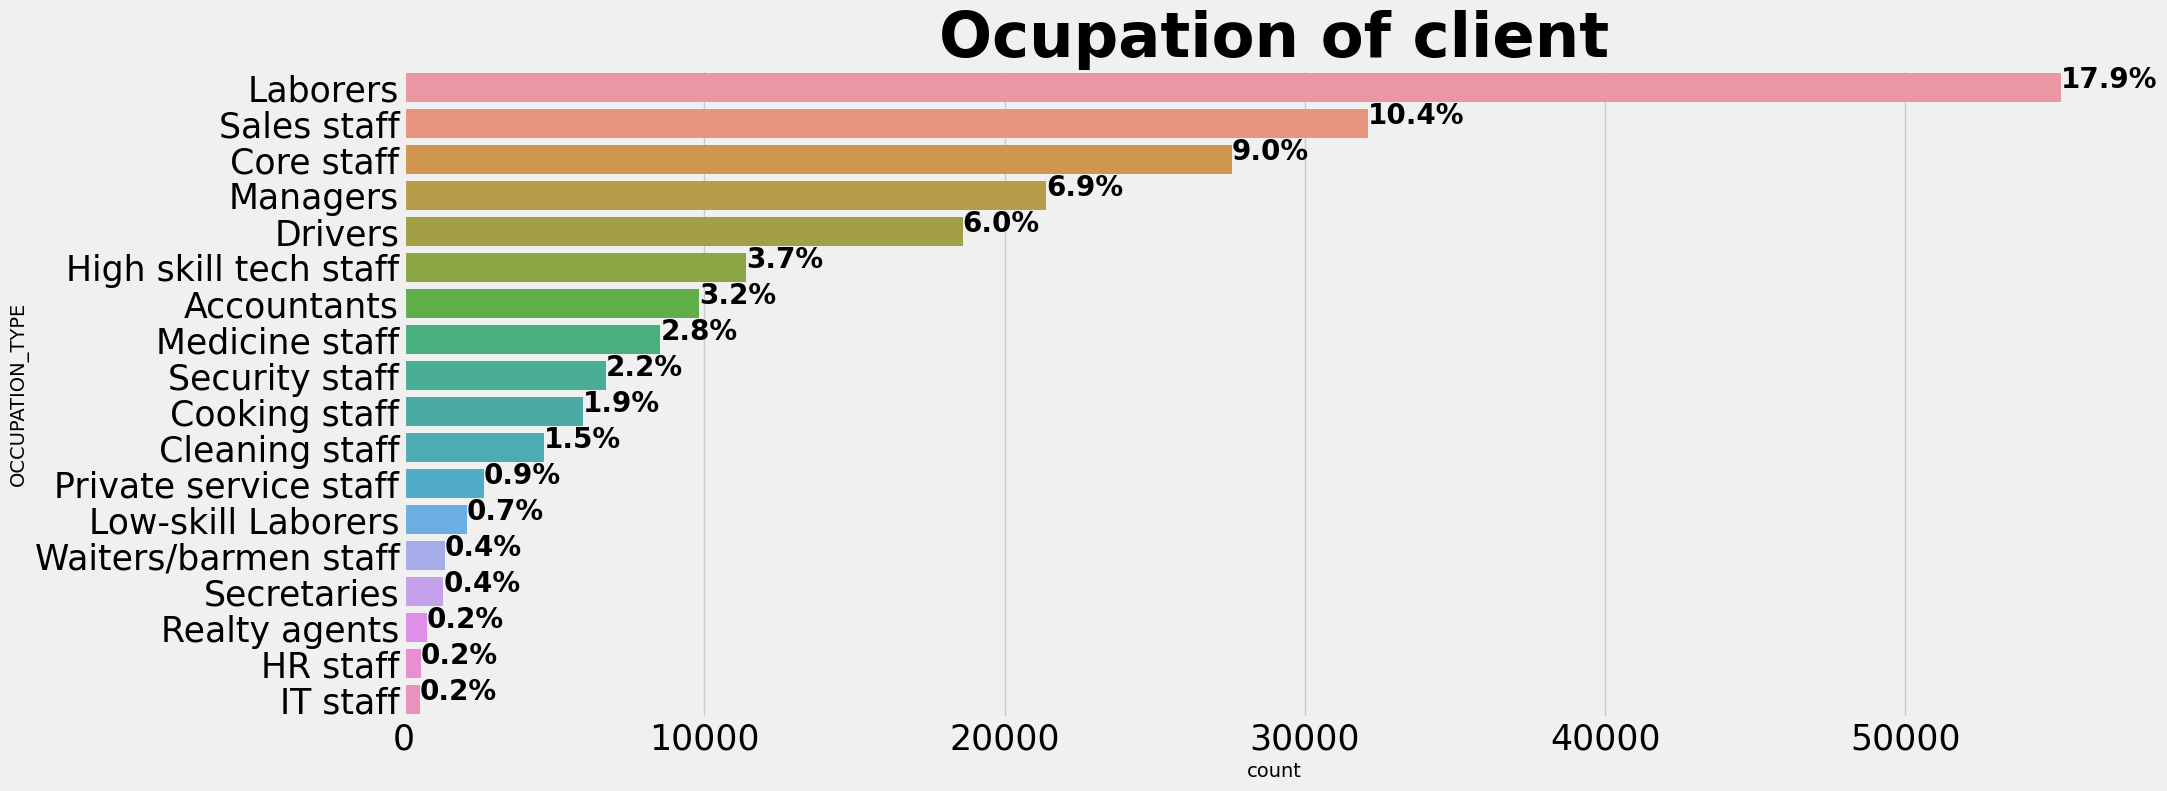

                                   -------------------------------------------------------


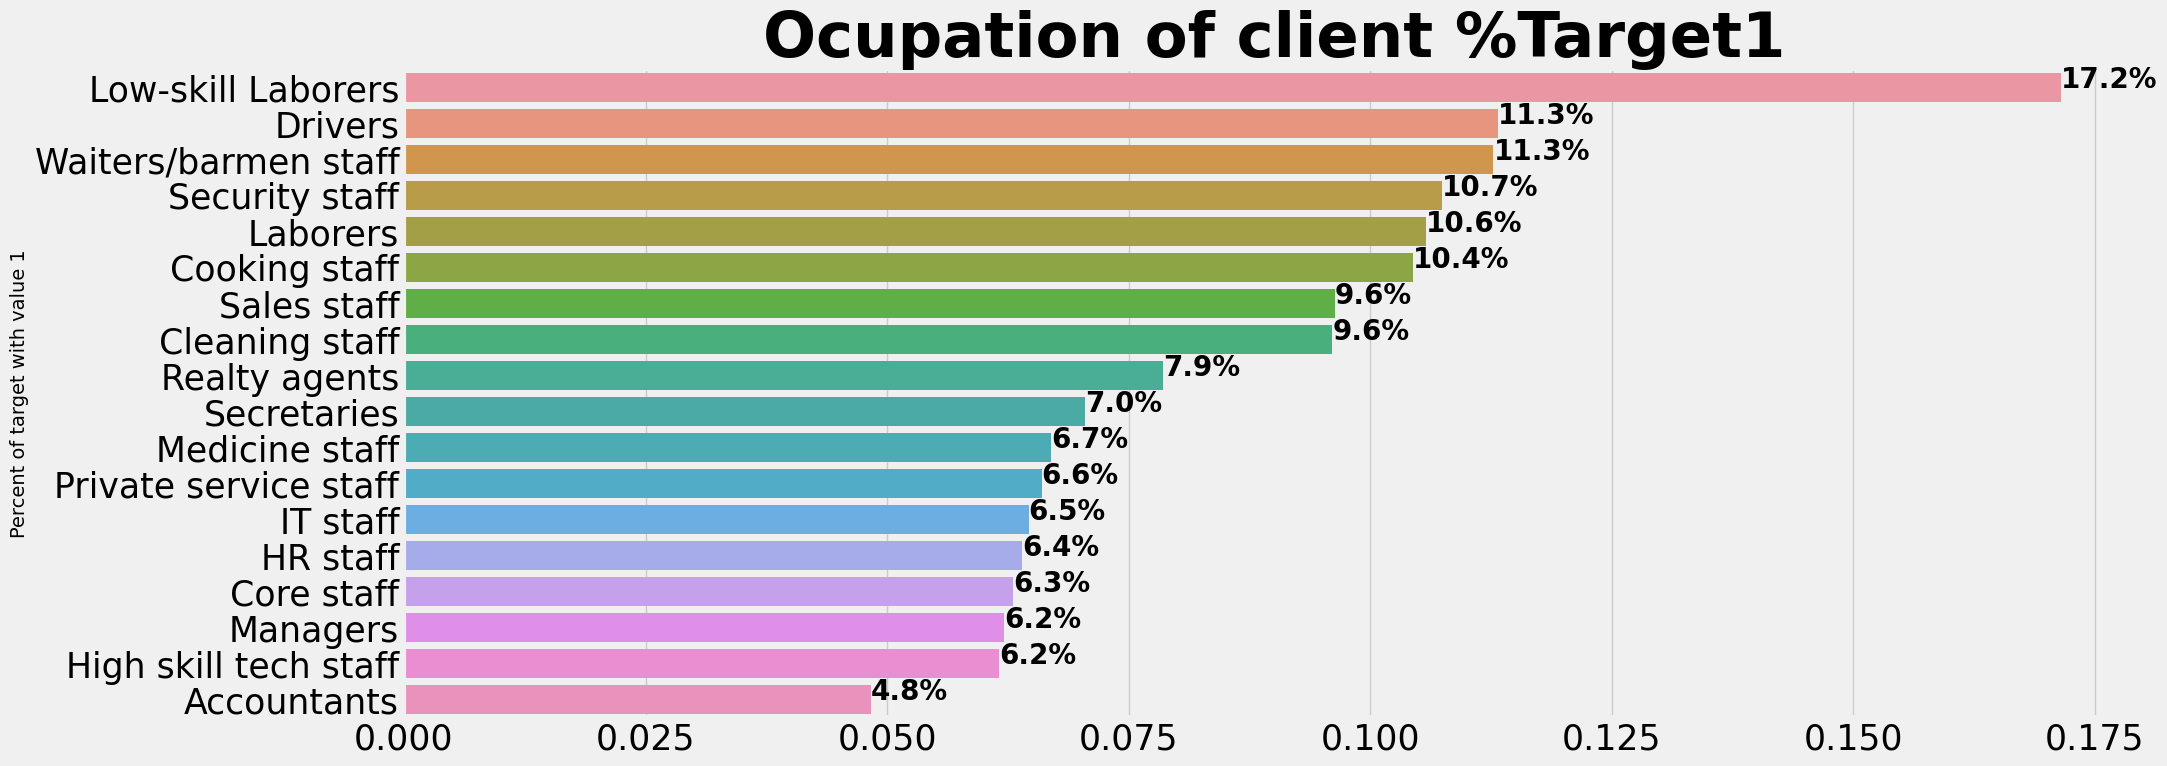

In [33]:
#OCCUPATION_TYPE
plot_stat(application_train, 'OCCUPATION_TYPE',"Ocupation of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

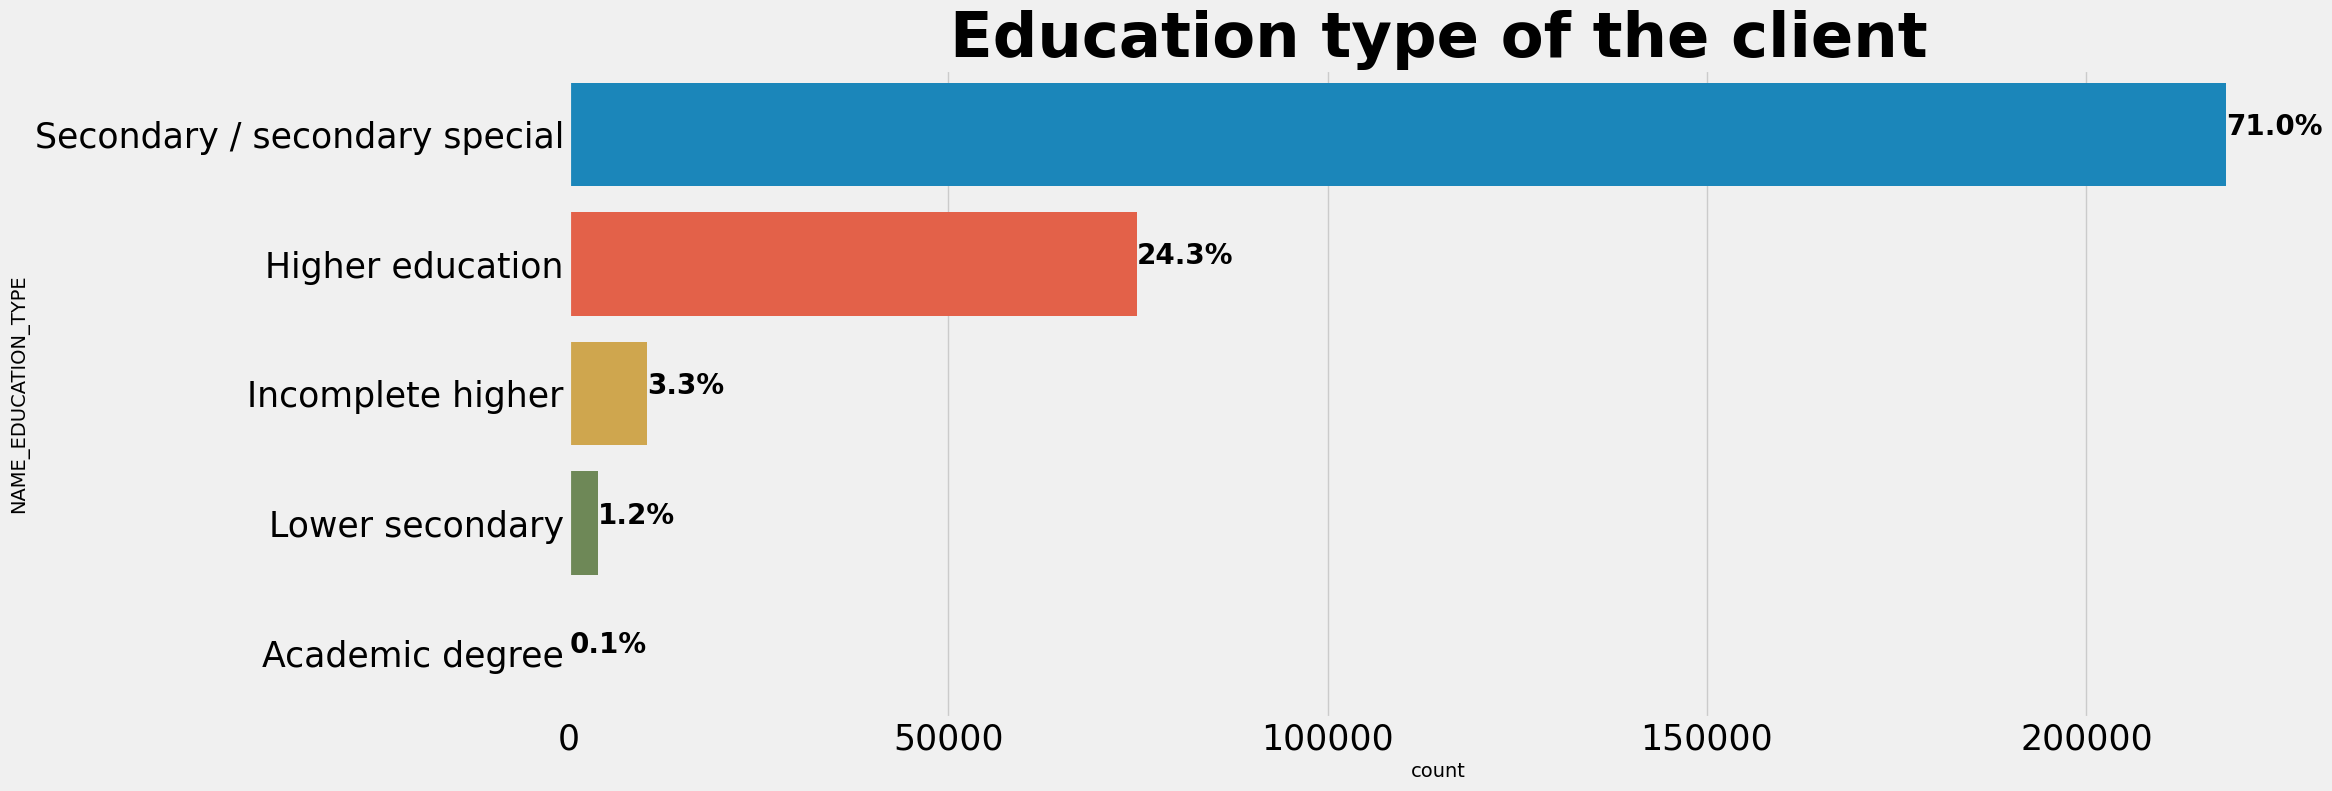

                                   -------------------------------------------------------


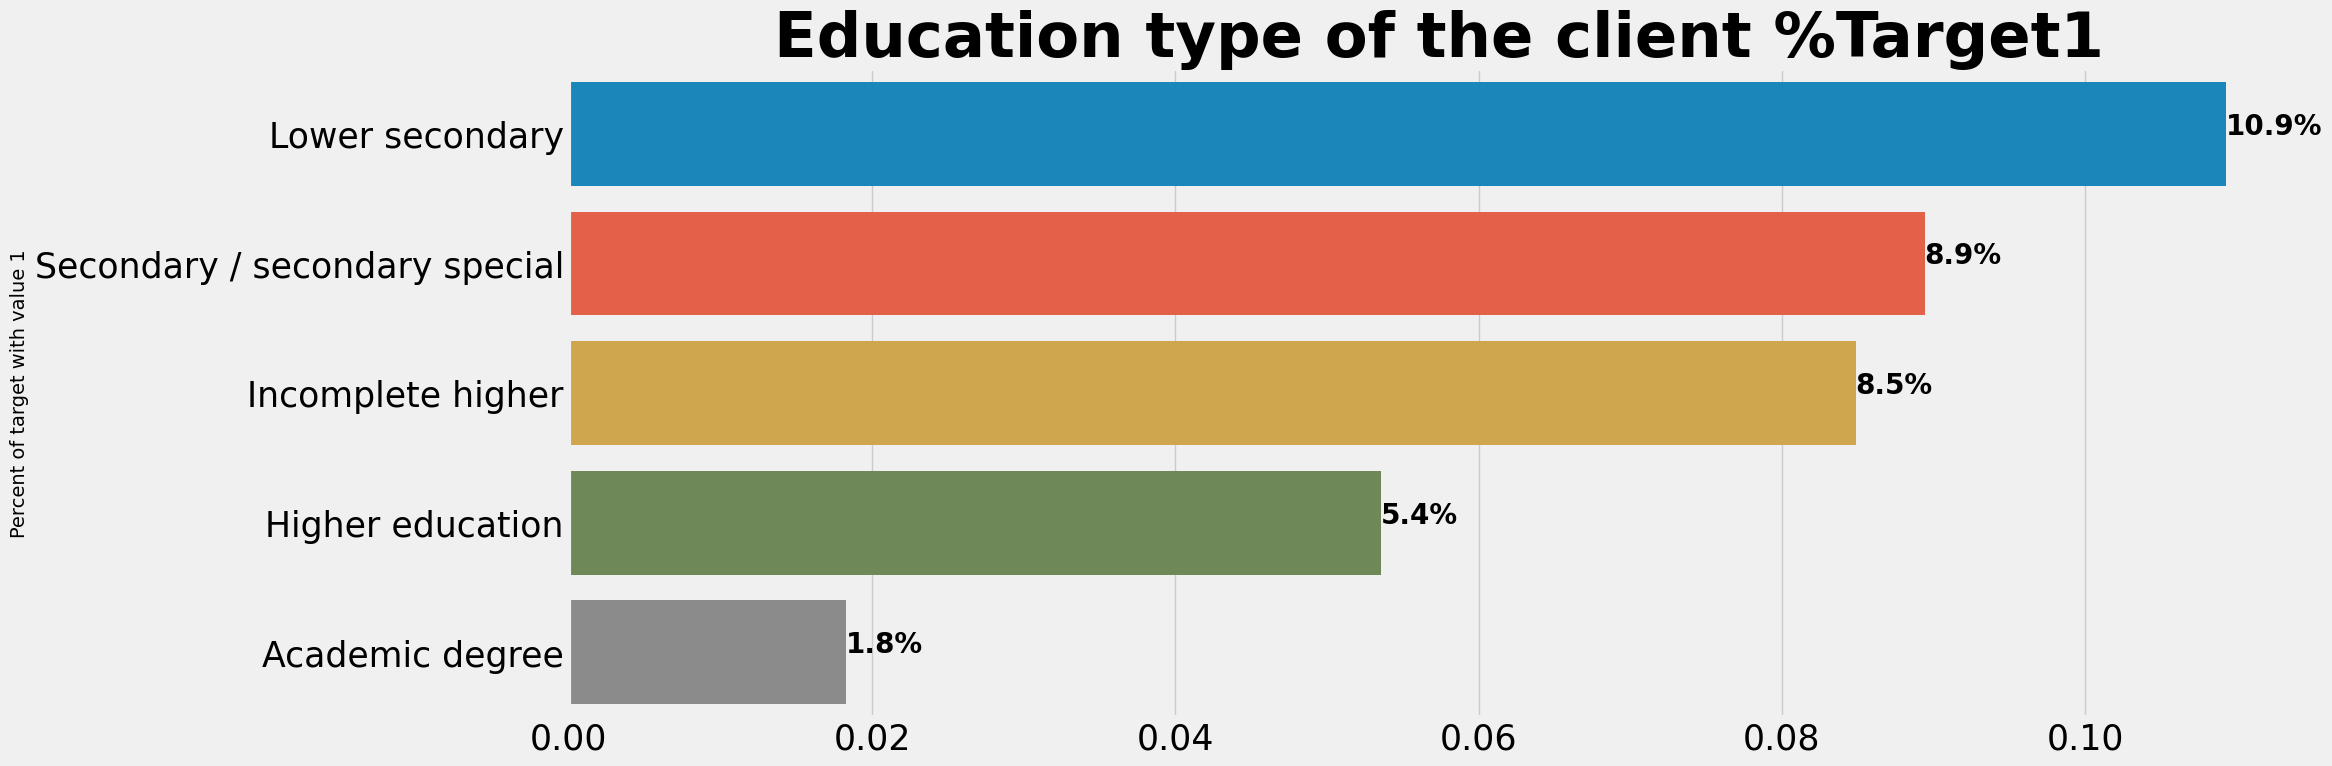

In [34]:
#NAME_EDUCATION_TYPE
plot_stat(application_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

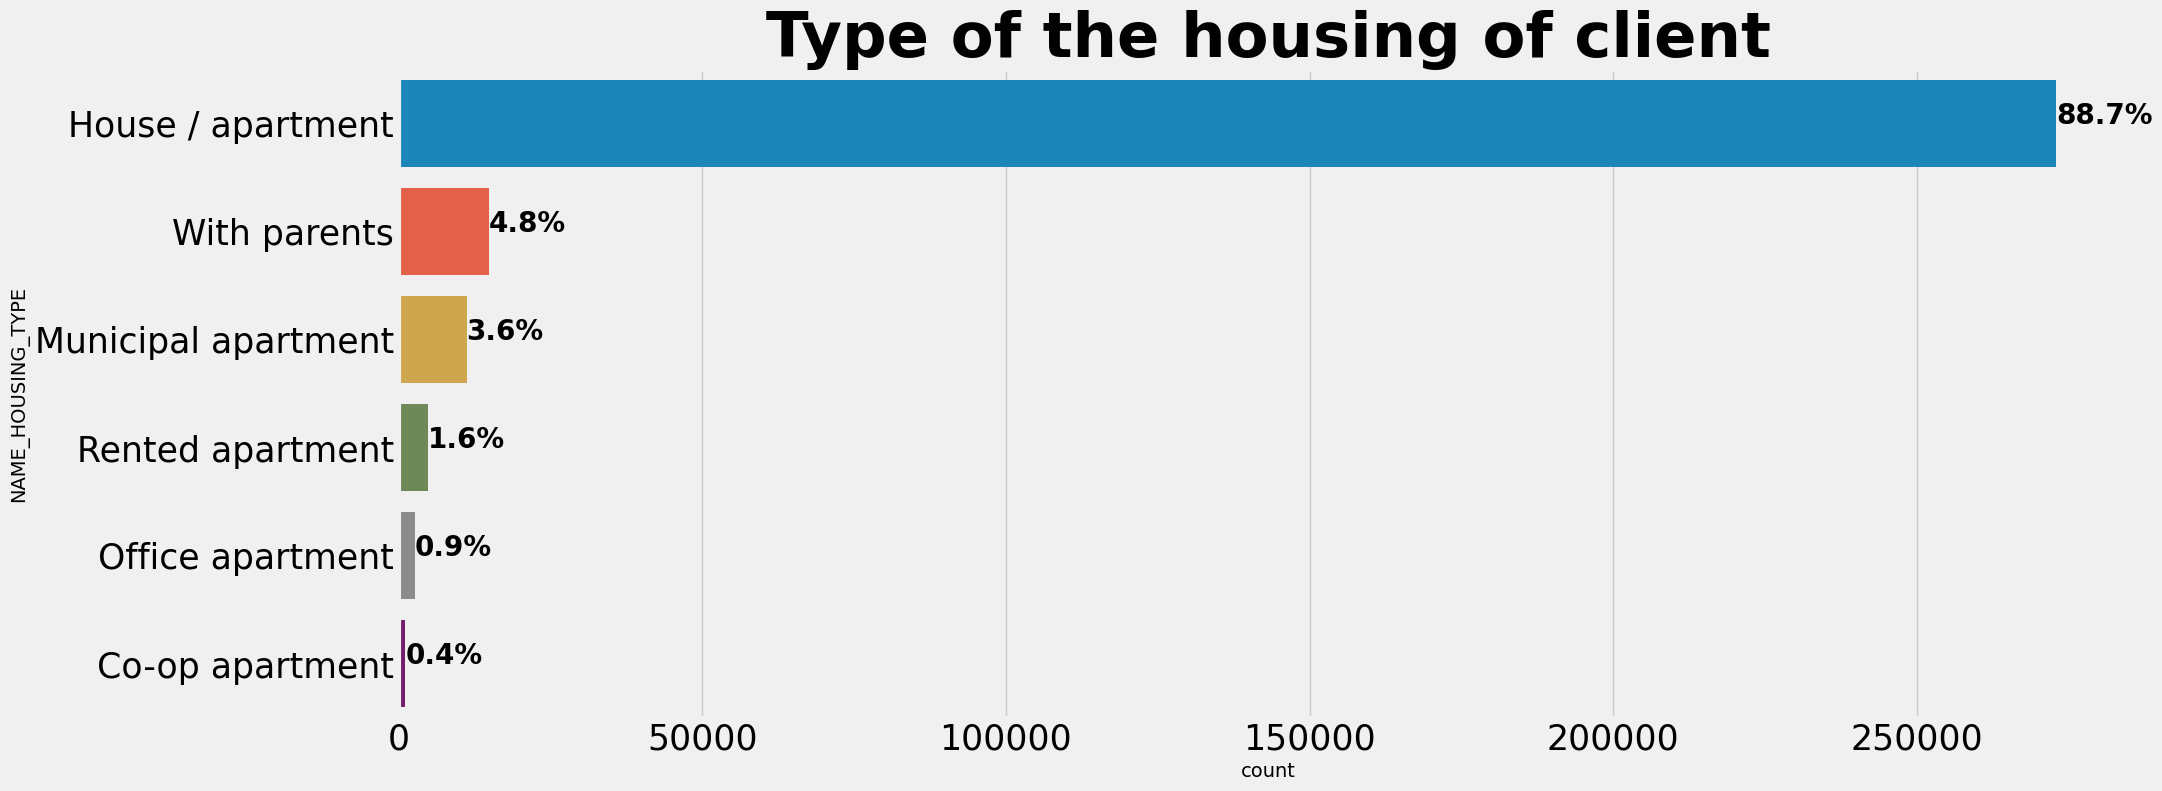

                                   -------------------------------------------------------


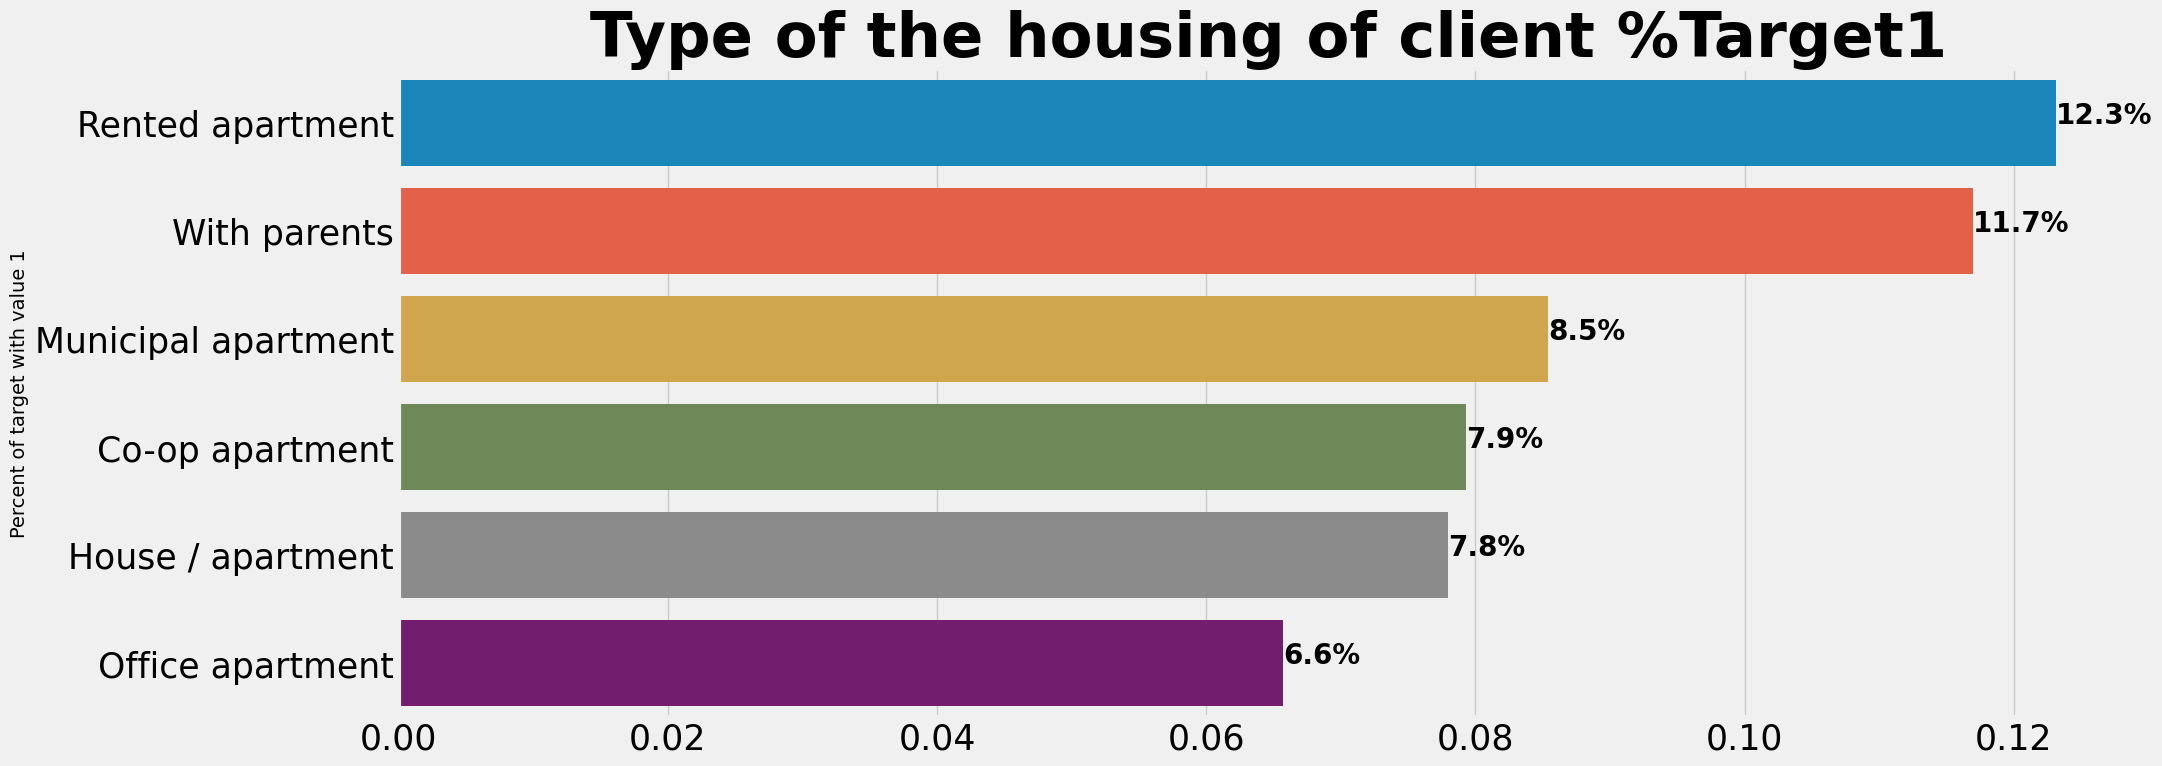

In [35]:
#NAME_HOUSING_TYPE
plot_stat(application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

### Corrélations
L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [36]:
#Display correlations
print('Most Positive Correlations:\n', application_train.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', application_train.corr()['TARGET'].sort_values().head(15))

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/1406195233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Most Positive Correlations:\n', application_train.corr()['TARGET'].sort_values().tail(15))


Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------


/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/1406195233.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Most Negative Correlations:\n', application_train.corr()['TARGET'].sort_values().head(15))


Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_OUTLIERS       -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
Name: TARGET, dtype: float64


Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).

In [37]:
#Find the correlation of the positive days since birth and target
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982709

En termes de distribution des âges elle peut uniquement servir à visualiser la non présence d'outliers, suite à ce qui a été fait en amont sur les valeurs négatives de départ. Pour visualiser l'effet de l'âge sur la Target, nous pouvons faire un graphique (KDE) coloré par la valeur TARGET 0 et 1.

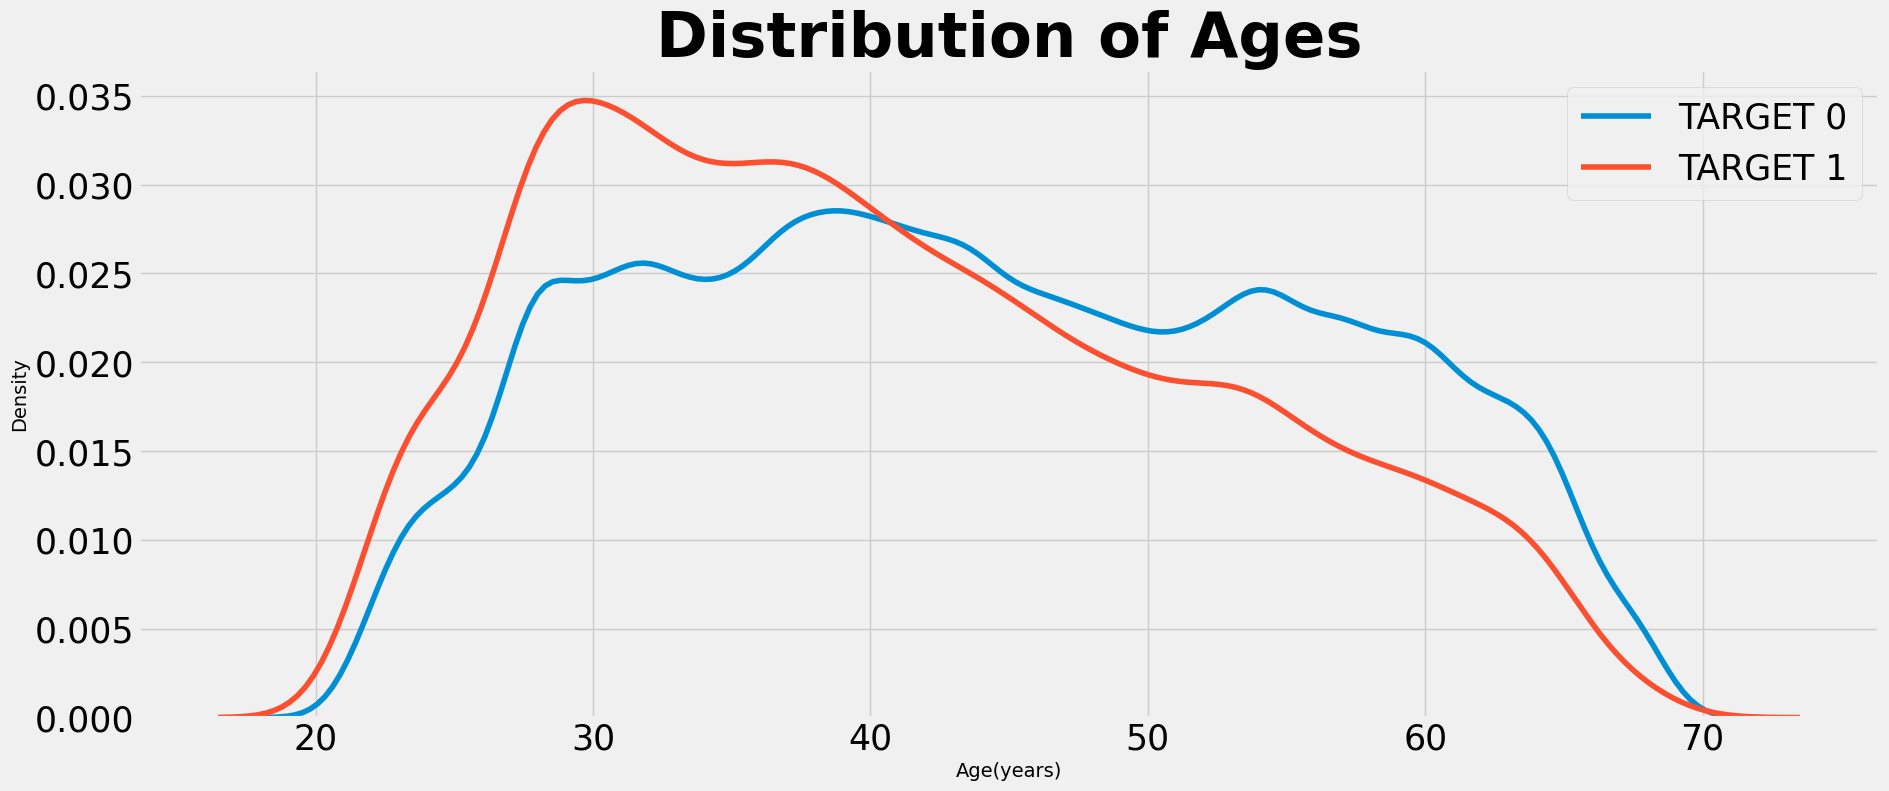

In [38]:
plt.figure(figsize = (20, 8))
sns.kdeplot(application_train[application_train['TARGET'] == 0]['DAYS_BIRTH'] / 365, label = 'TARGET 0')
sns.kdeplot(application_train[application_train['TARGET'] == 1]['DAYS_BIRTH'] / 365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
show()

La courbe cible TARGET 1 s'incline vers l'extrémité la plus jeune de la plage. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient Pearson -0,07), cette variable sera probablement utile dans un modèle d'apprentissage car elle affecte la Target.

#### Sources extérieures, les plus fortes corrélations linéaires…
Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. Selon la documentation, ces fonctionnalités représentent un «score normalisé à partir d'une source de données externe». 
Difficile de comprendre le sens exact, nous pouvons émettre l'hypothèse d'une cote de crédit cumulative établie à l'aide de différentes sources de données.

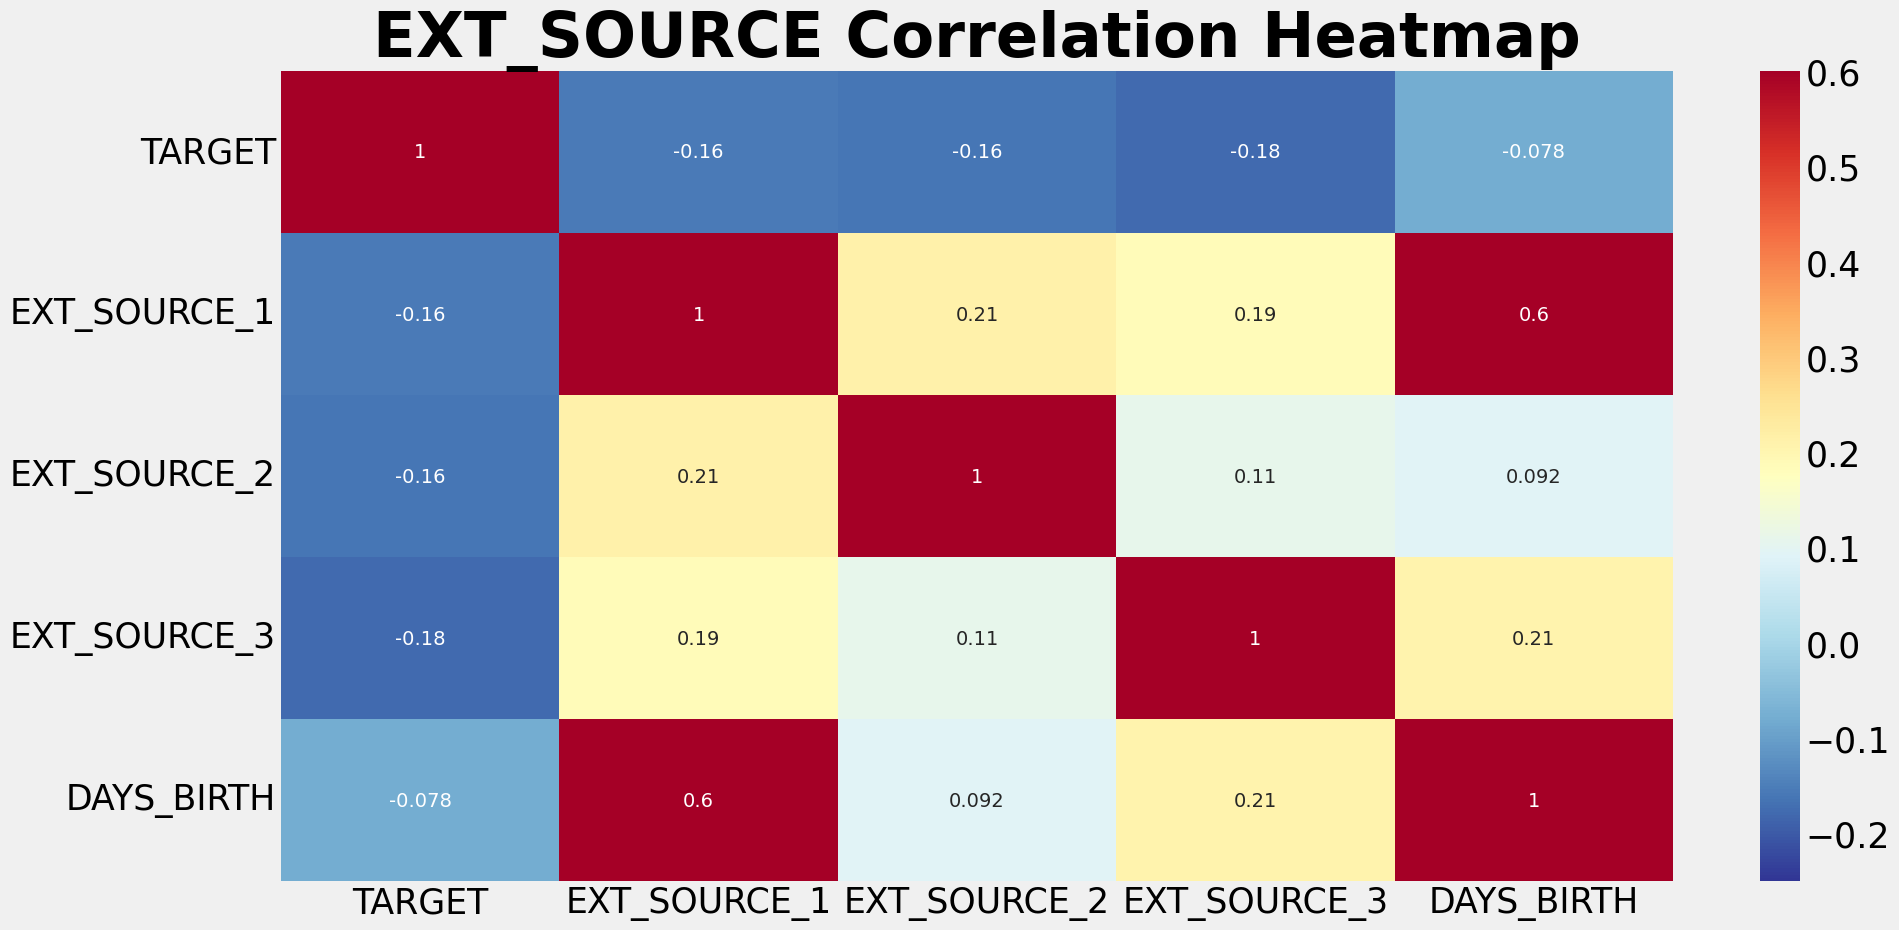

In [39]:
#Heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
show()

Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

In [40]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = application_train.loc[application_train['TARGET'] == 0]
    t1 = application_train.loc[application_train['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    show()   

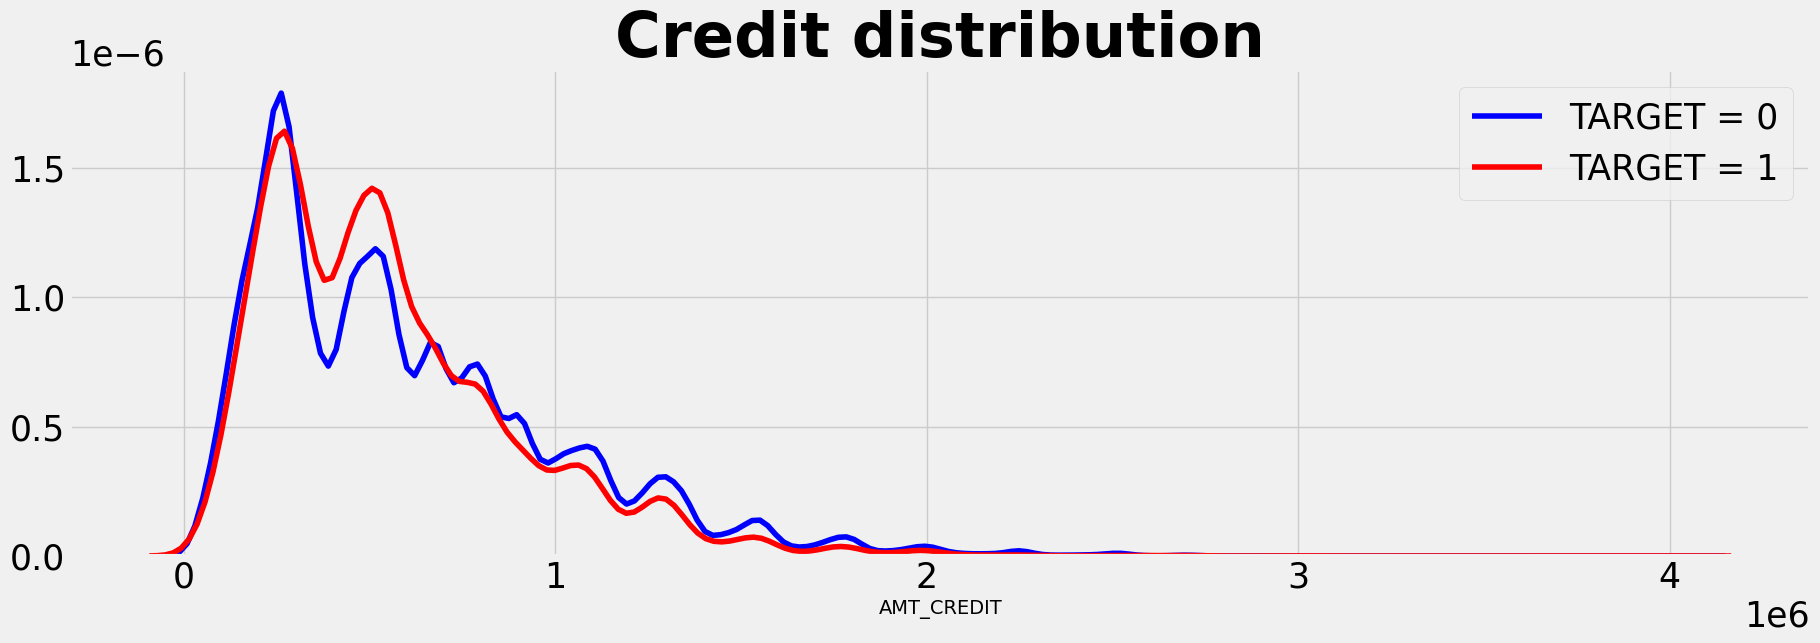

                                   -------------------------------------------------------


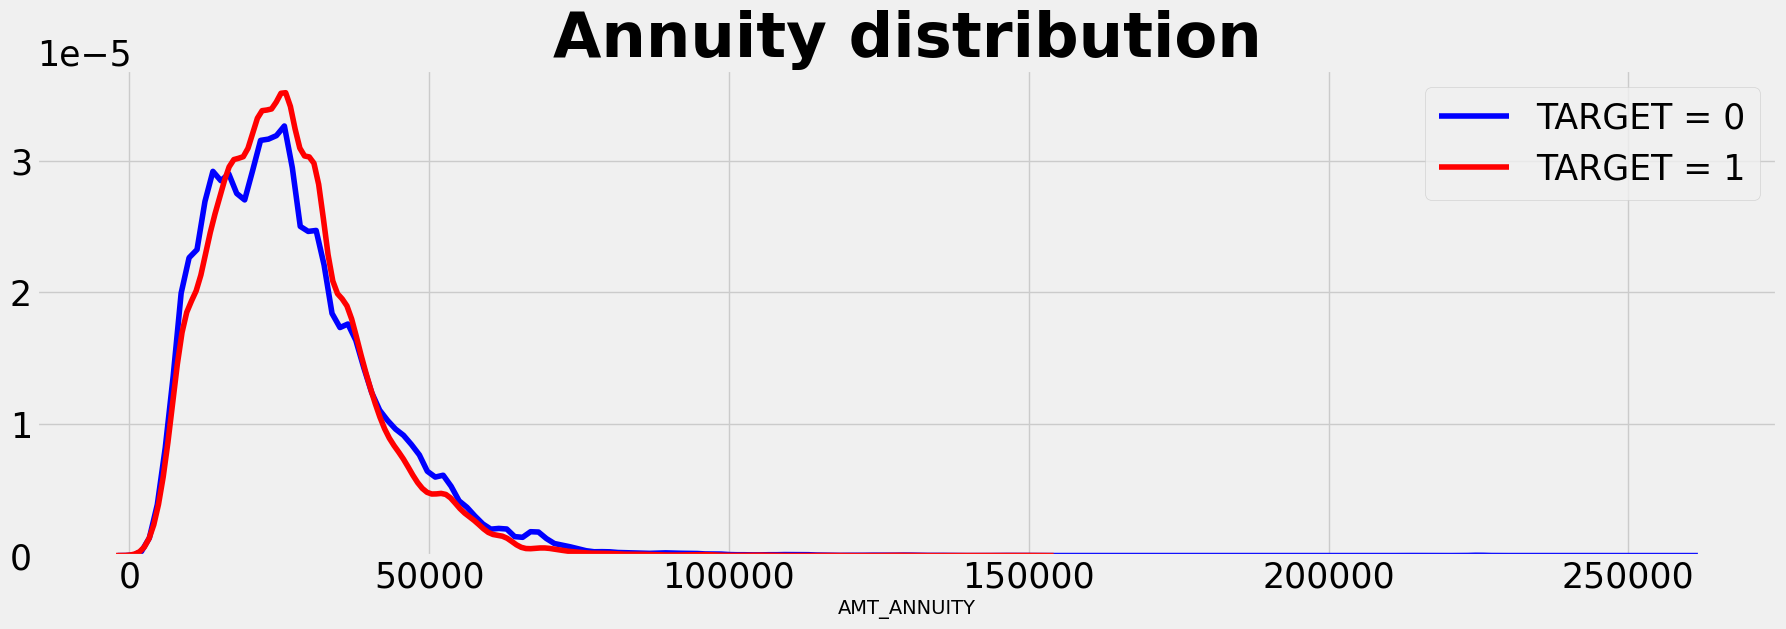

                                   -------------------------------------------------------


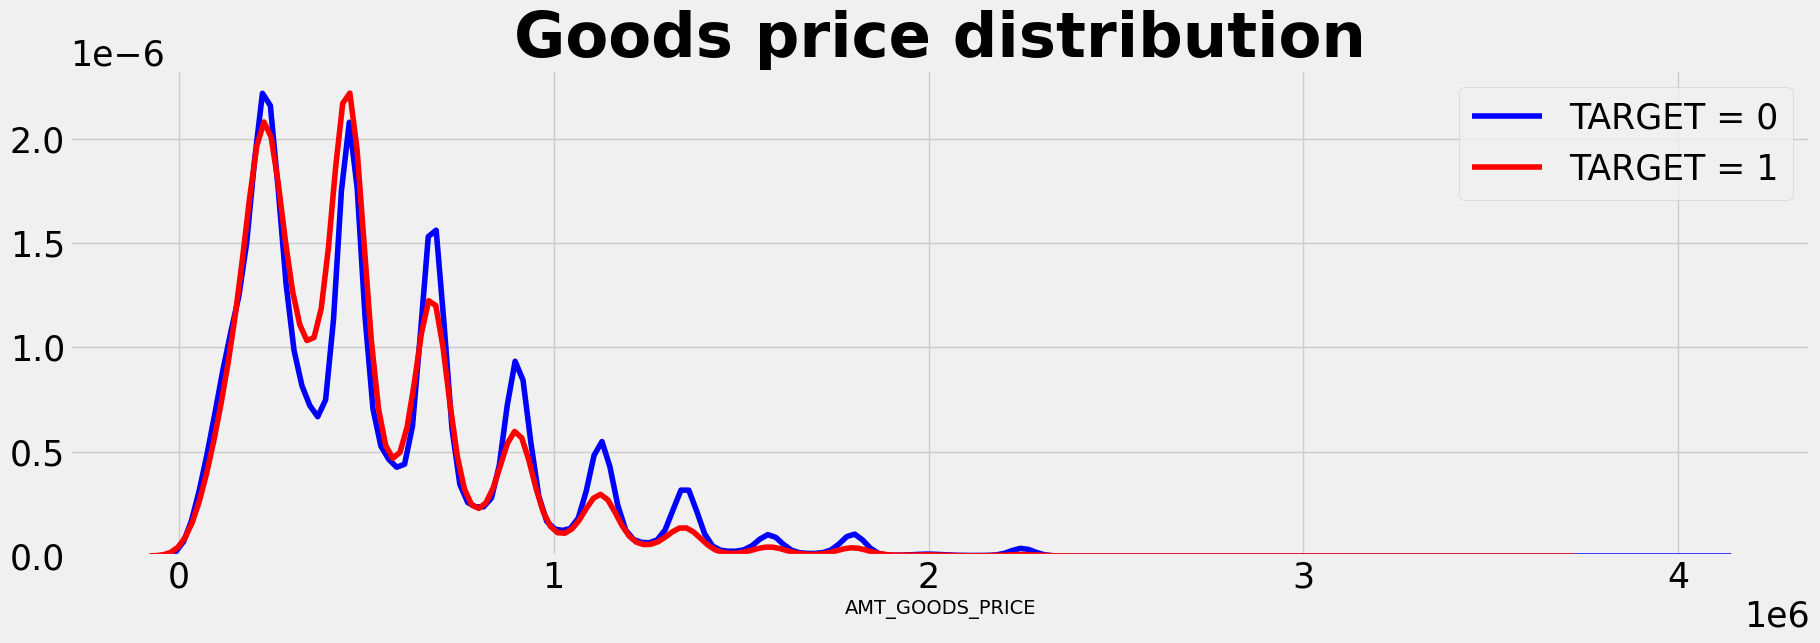

                                   -------------------------------------------------------


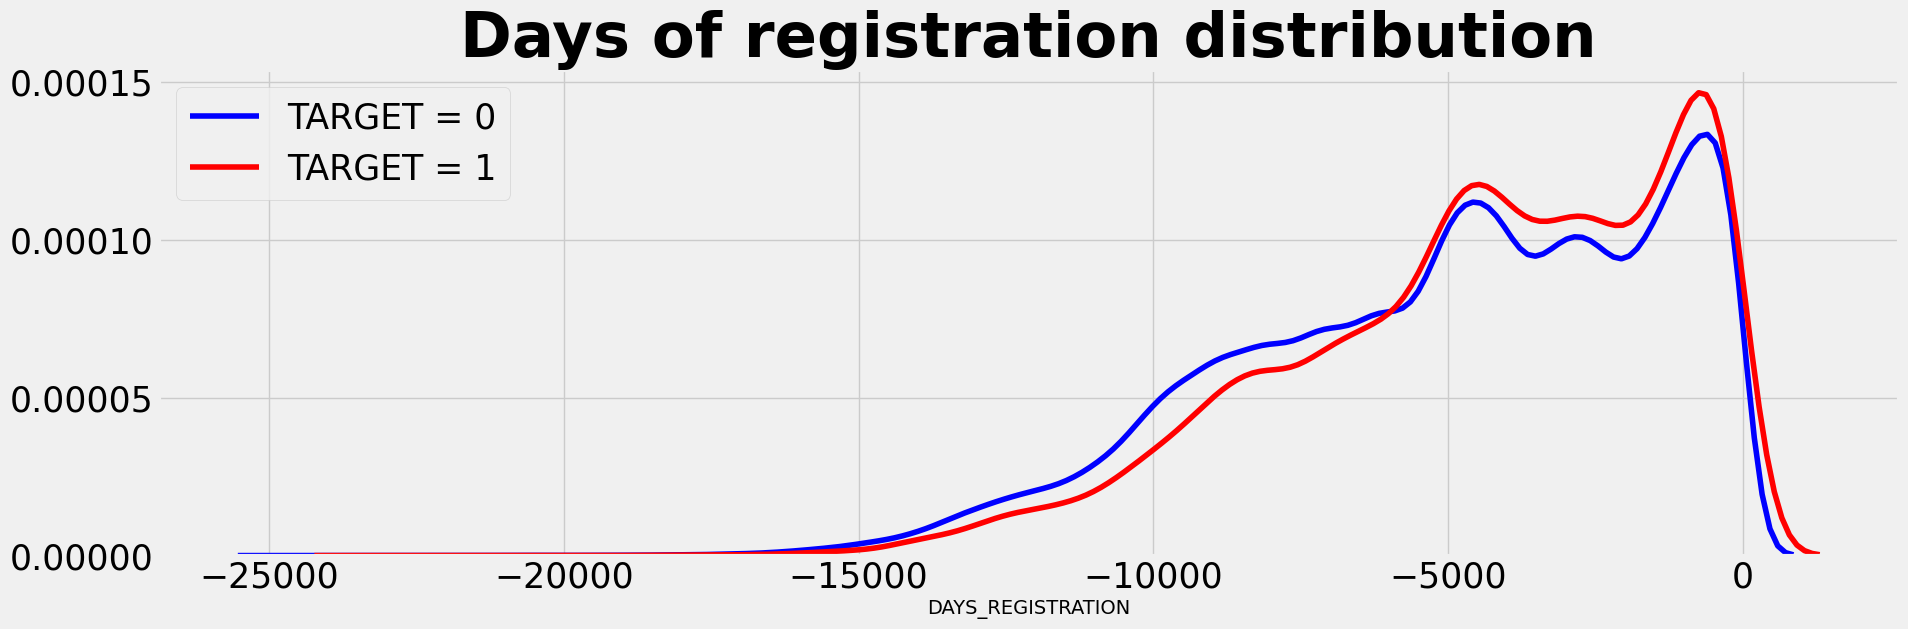

                                   -------------------------------------------------------


In [41]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

### EDA bureau.csv

``Bureau data``

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [42]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

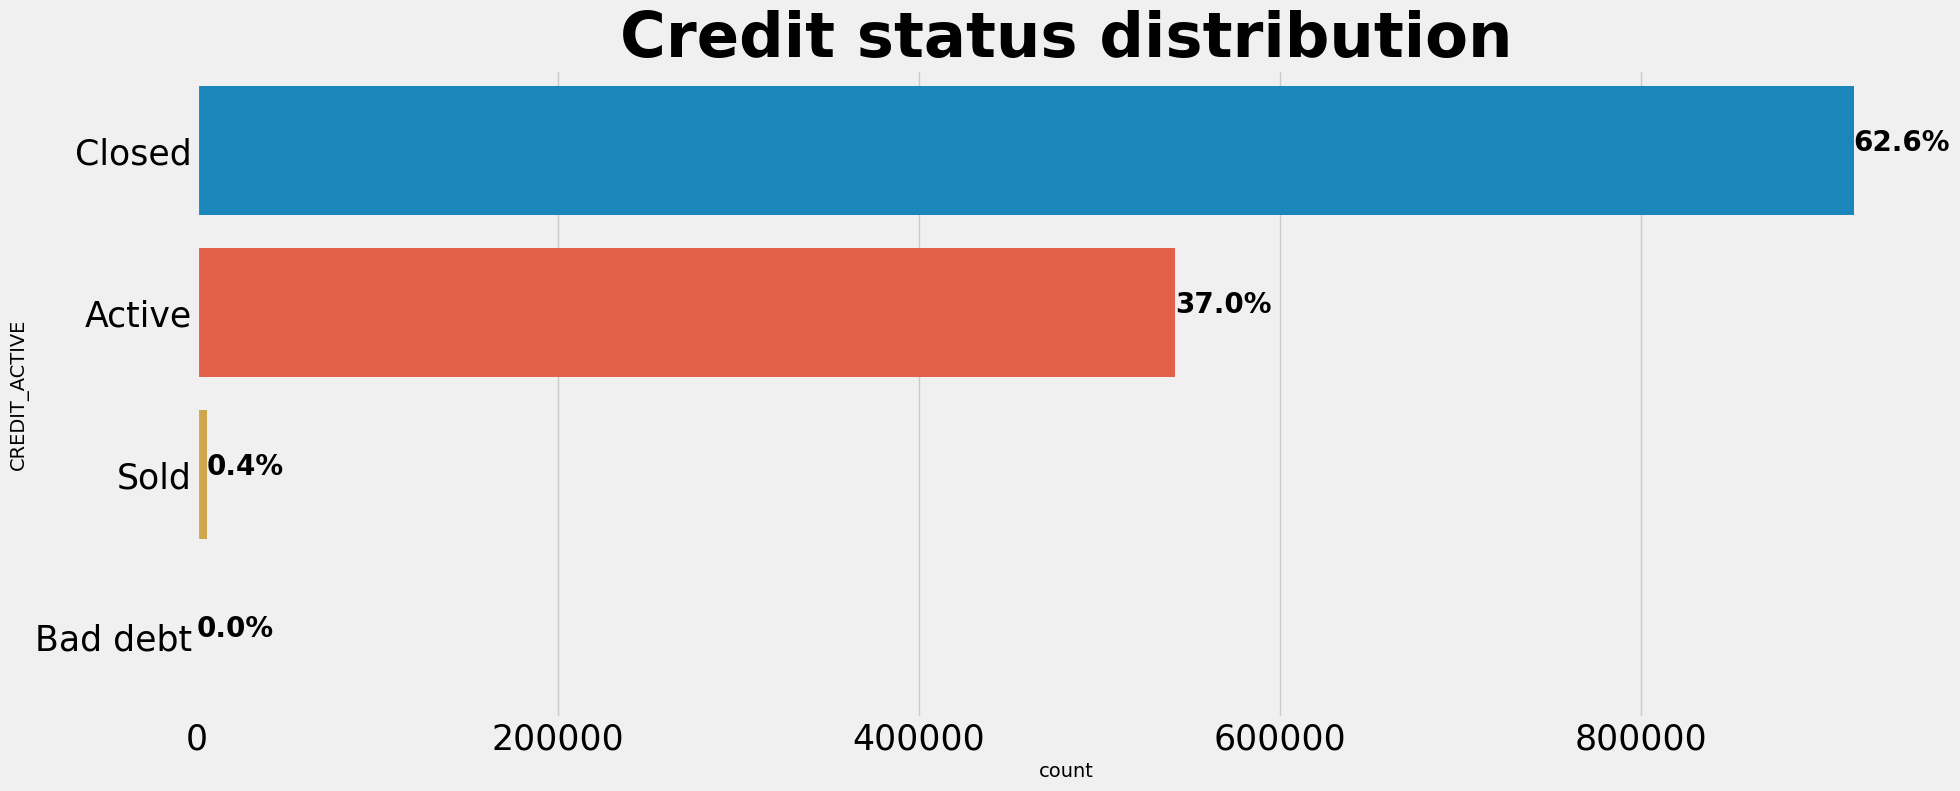

                                   -------------------------------------------------------


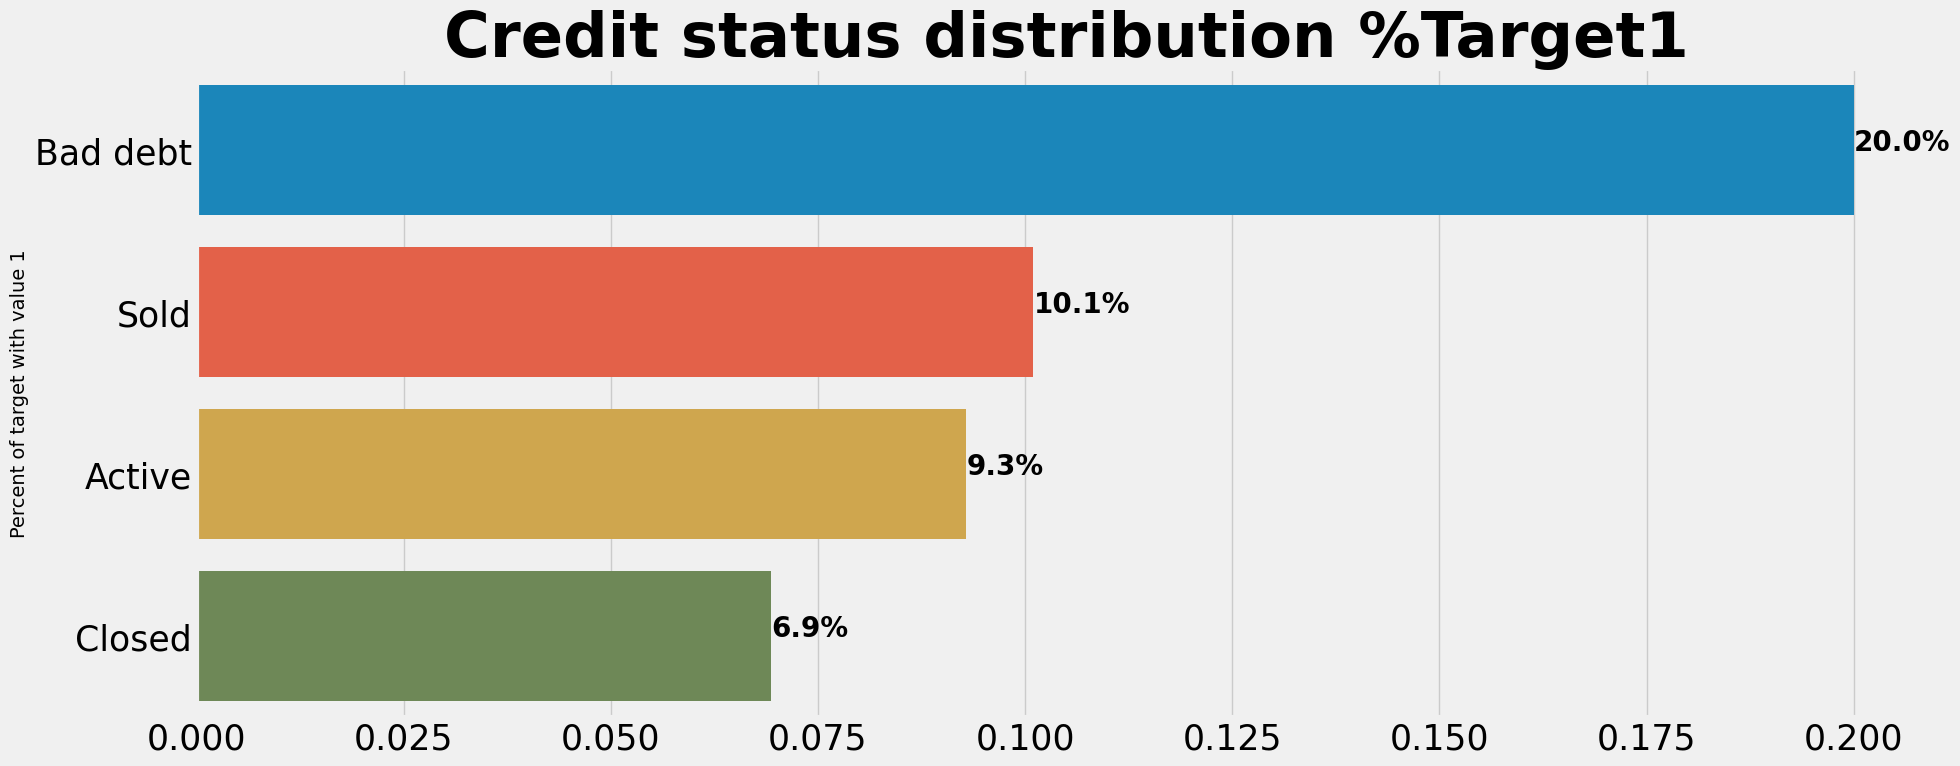

In [43]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution %Target1")

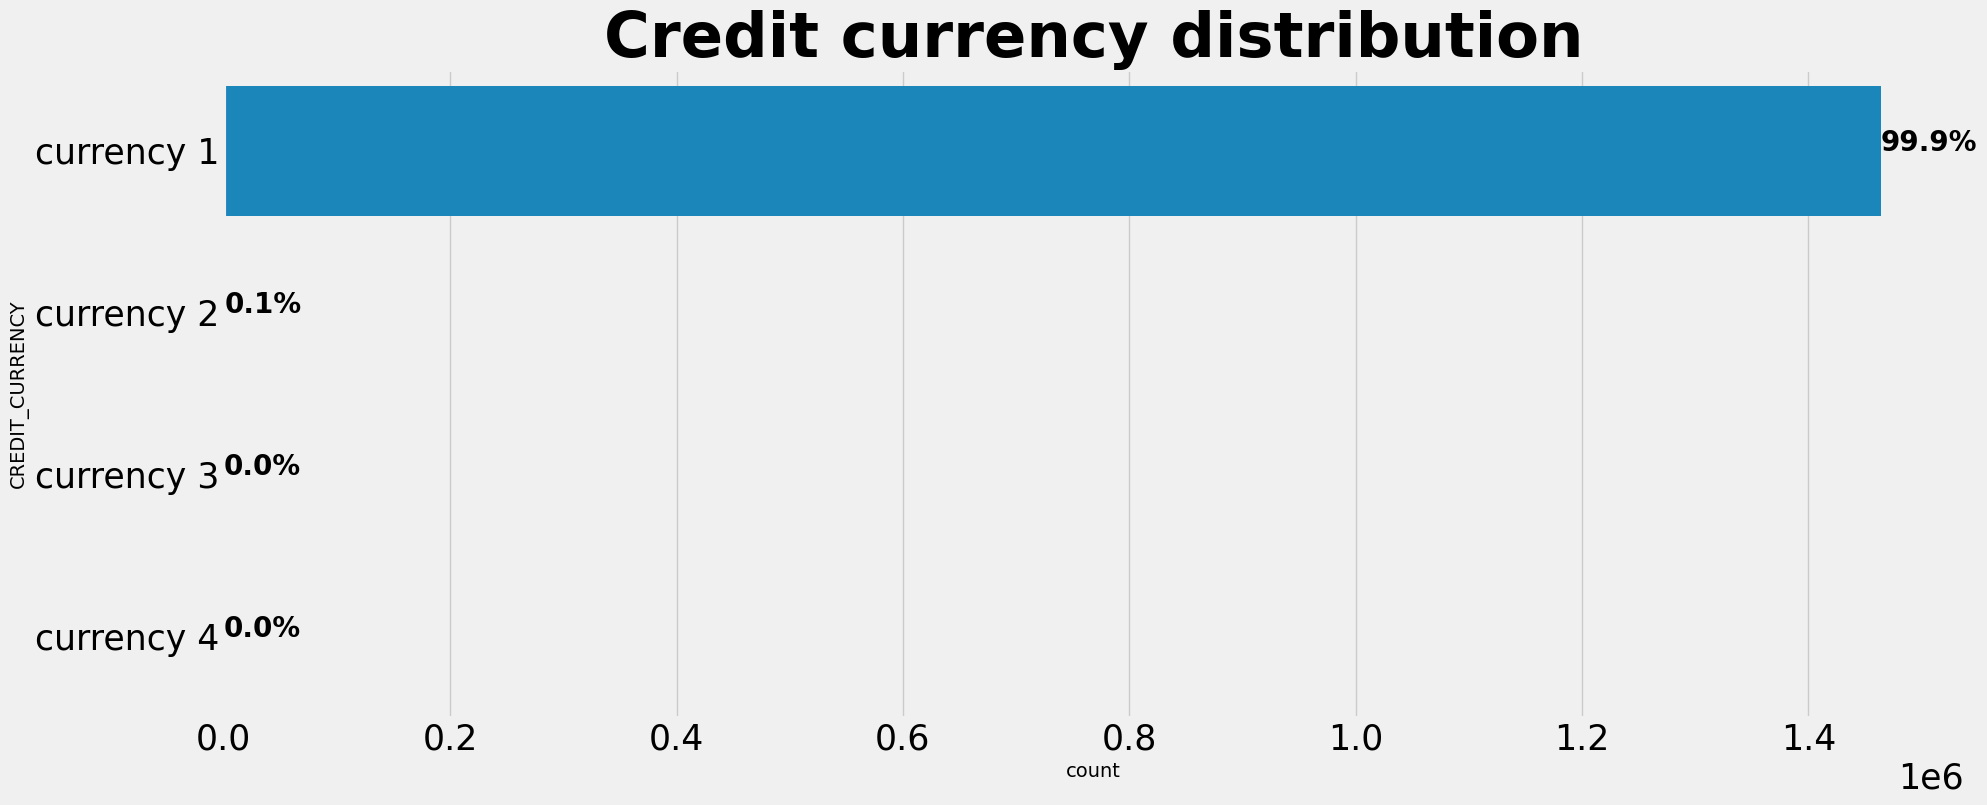

                                   -------------------------------------------------------


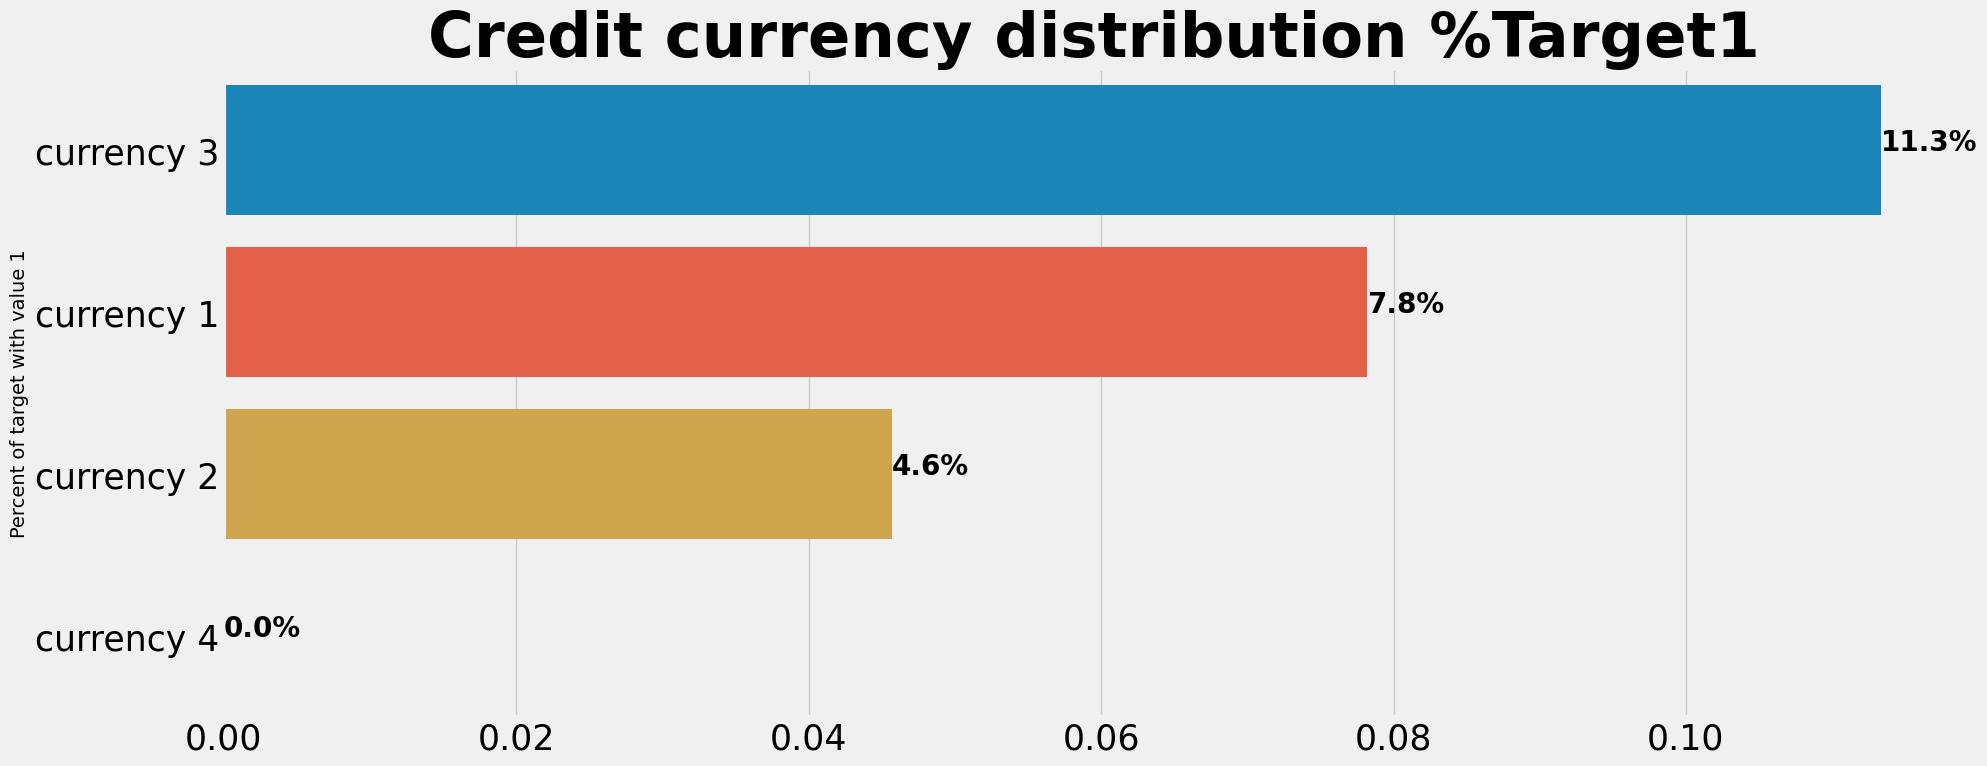

In [44]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution %Target1")

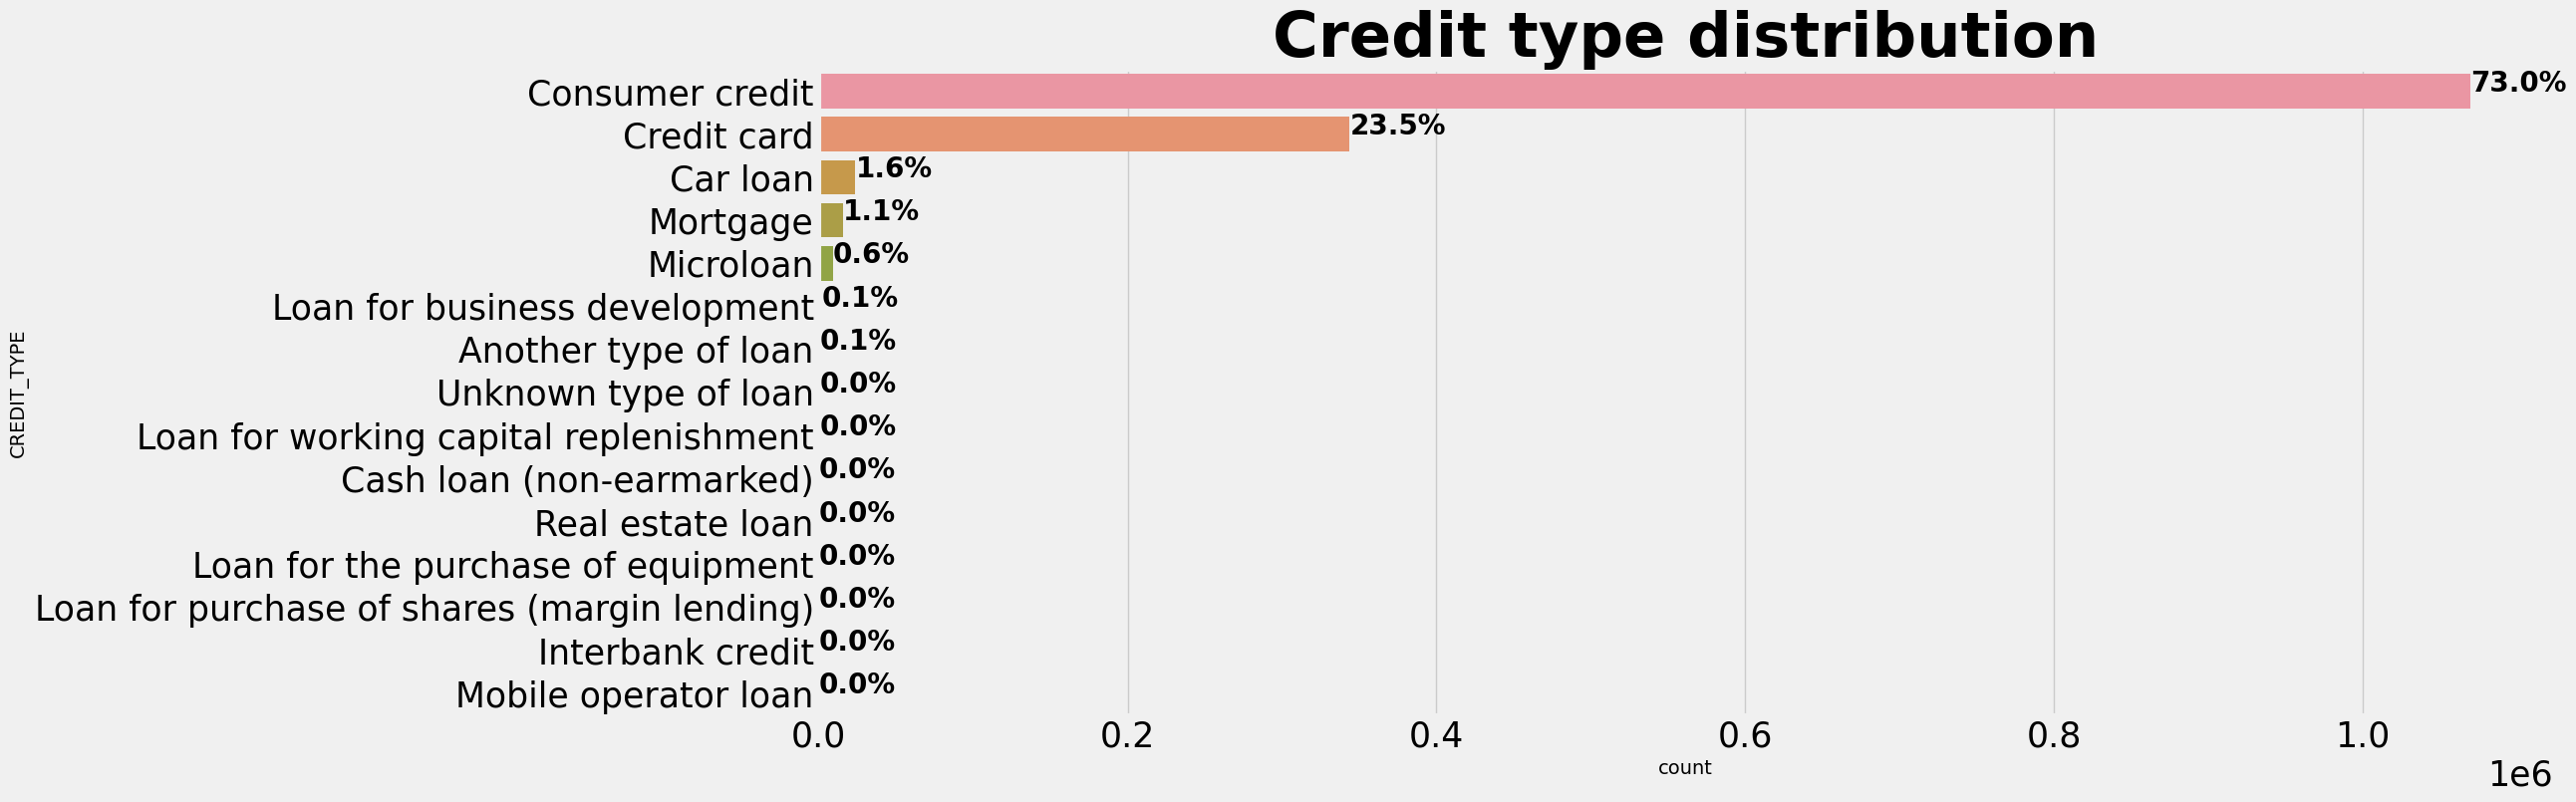

                                   -------------------------------------------------------


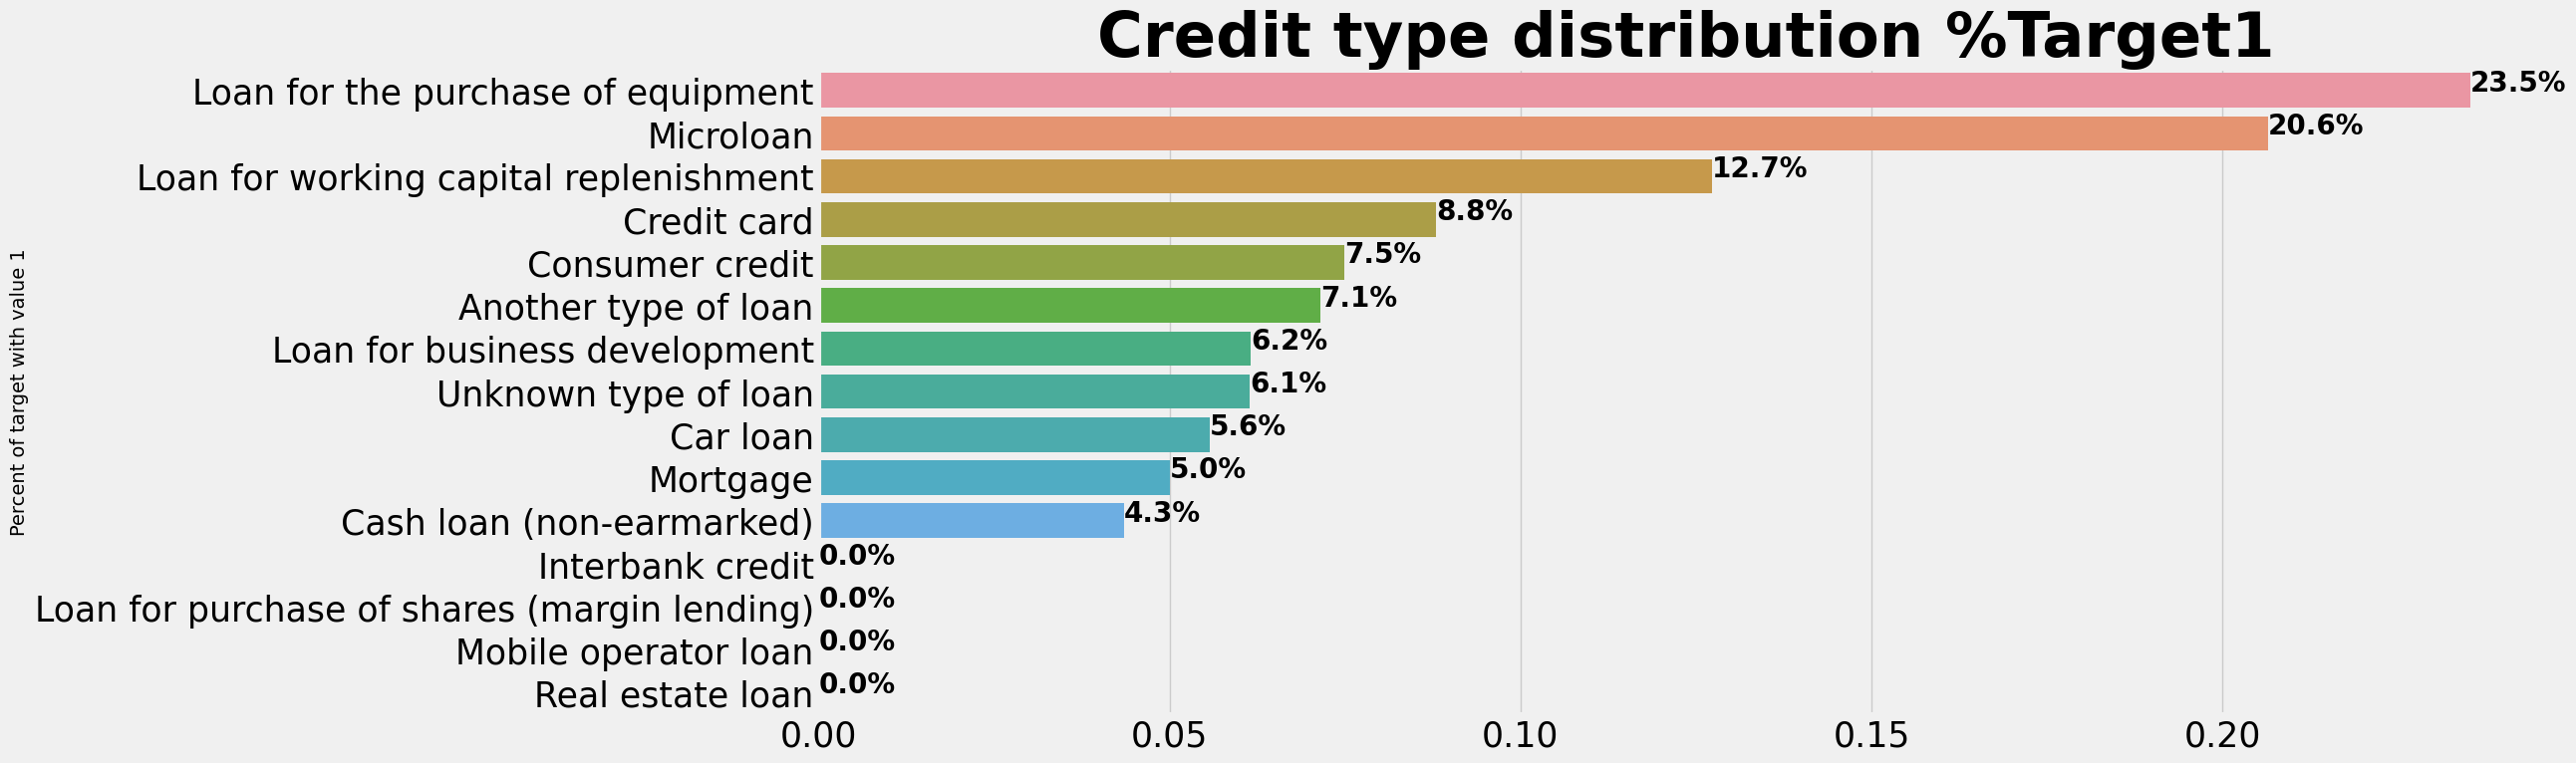

In [45]:
#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution %Target1")

### EDA previous_application.csv

``Previous application data``

"previous_application" contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.


Il est nécessaire de fusionner "application_train" avec "previous_application" pour pour pouvoir extraire la part de TARGET == 1.

In [46]:
application_prev_train = application_train.merge(previous_application, 
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

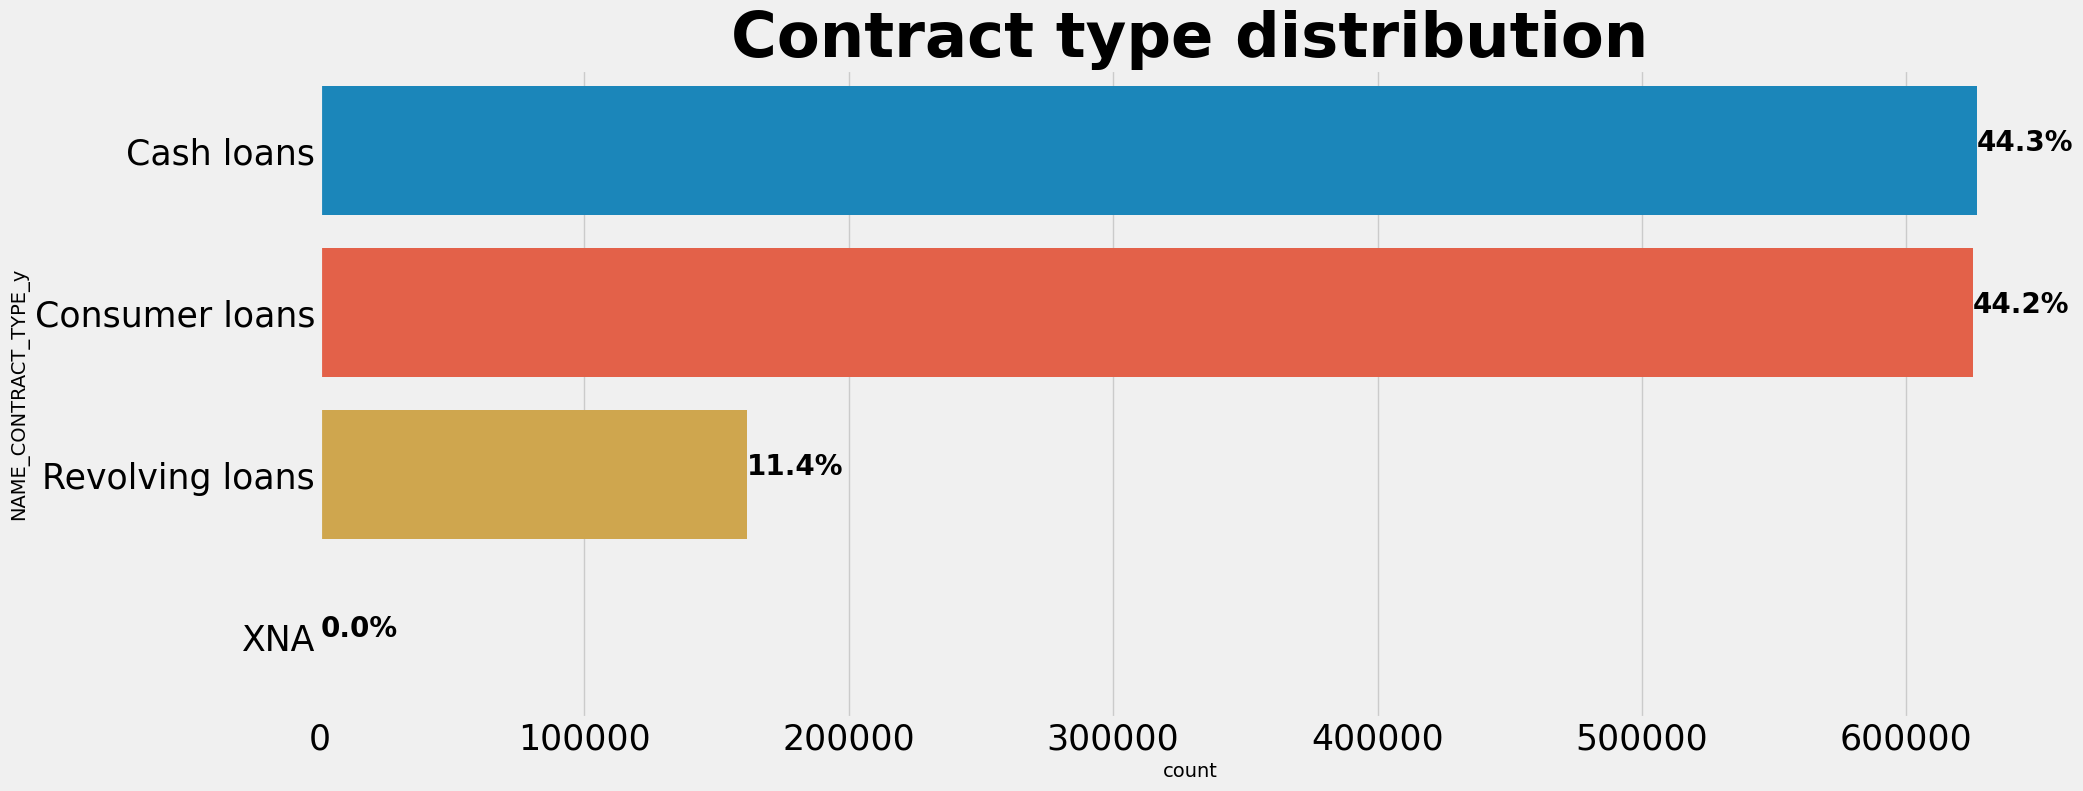

                                   -------------------------------------------------------


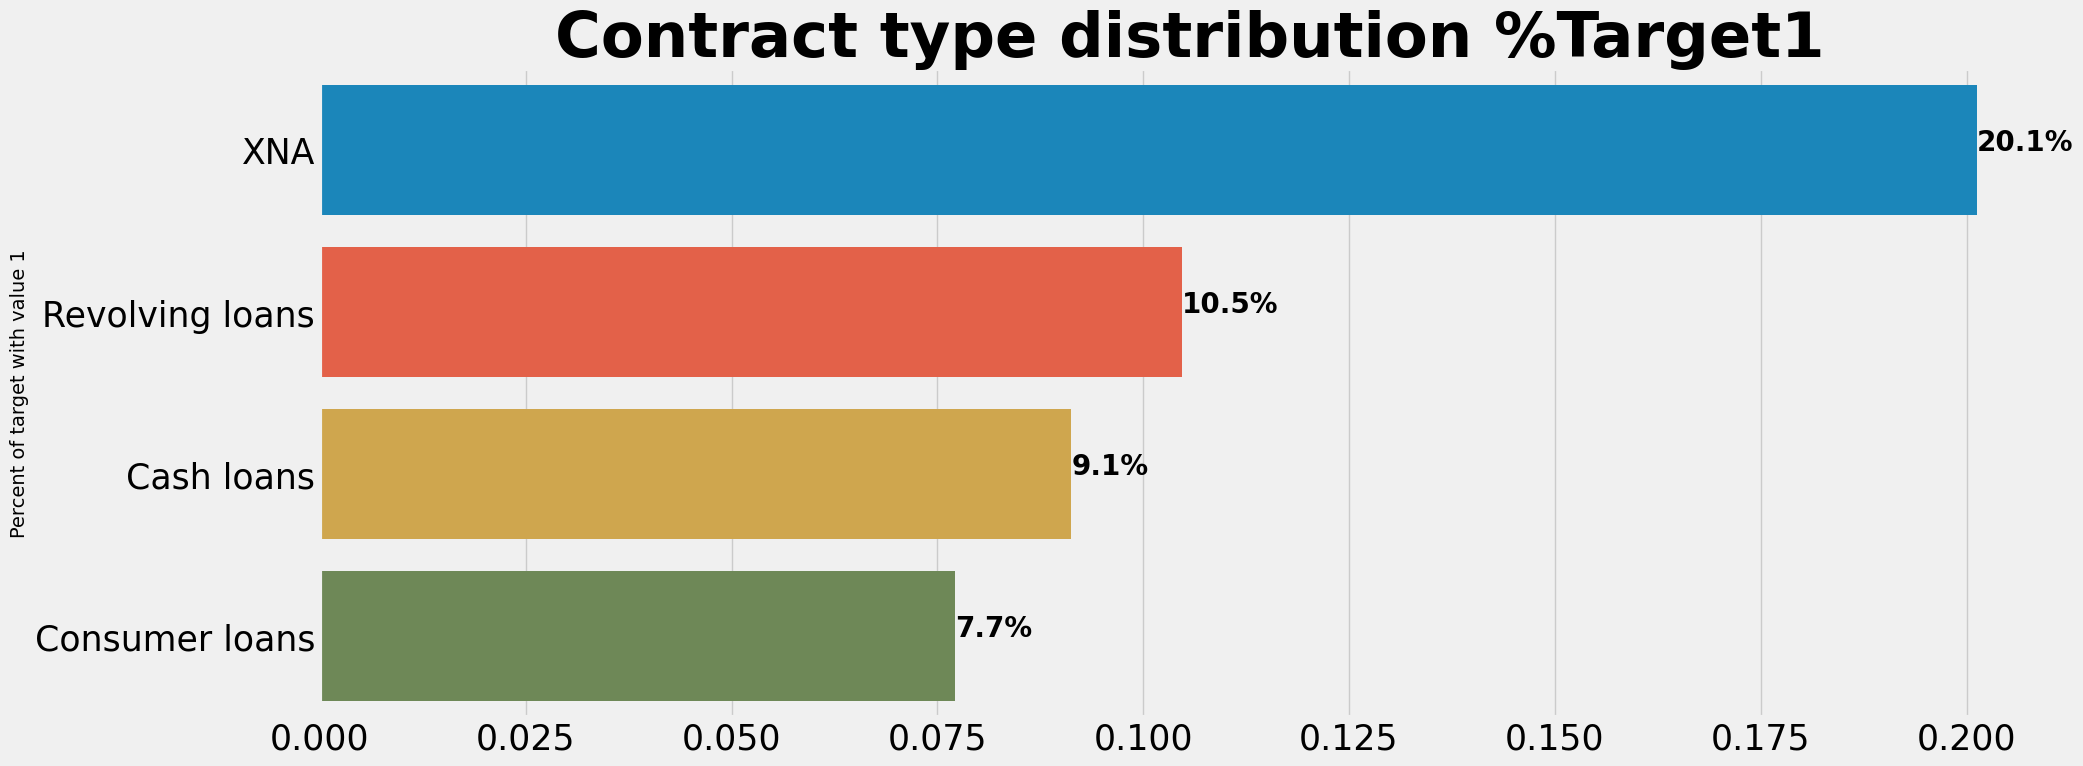

In [47]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")

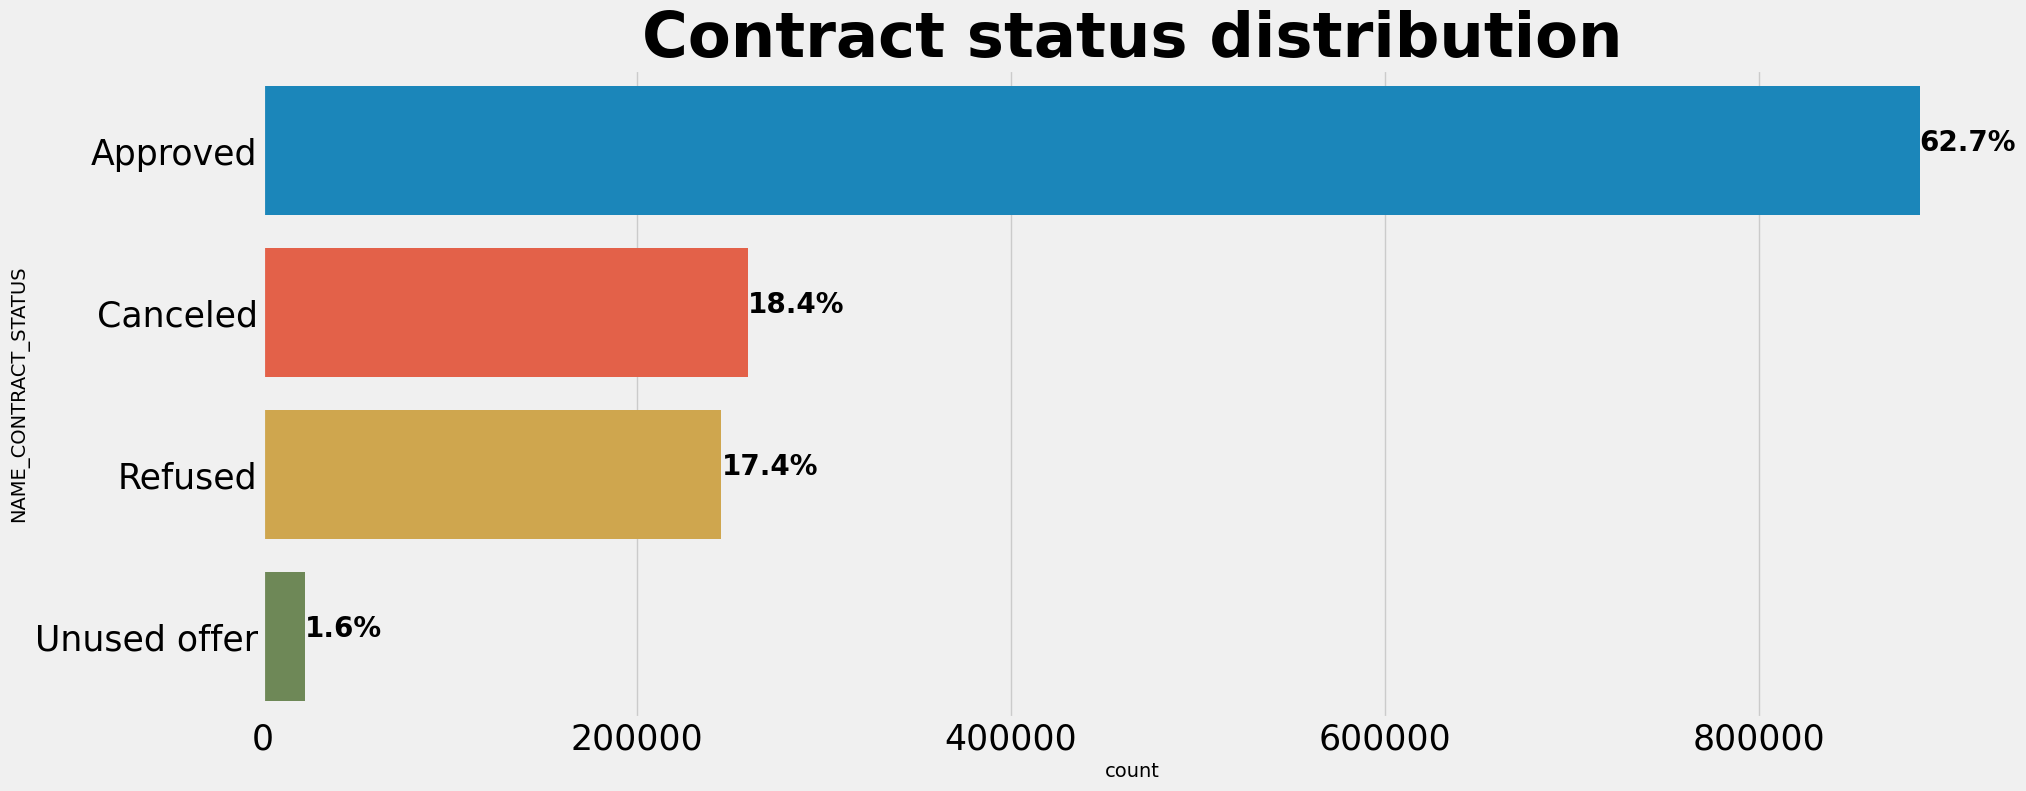

                                   -------------------------------------------------------


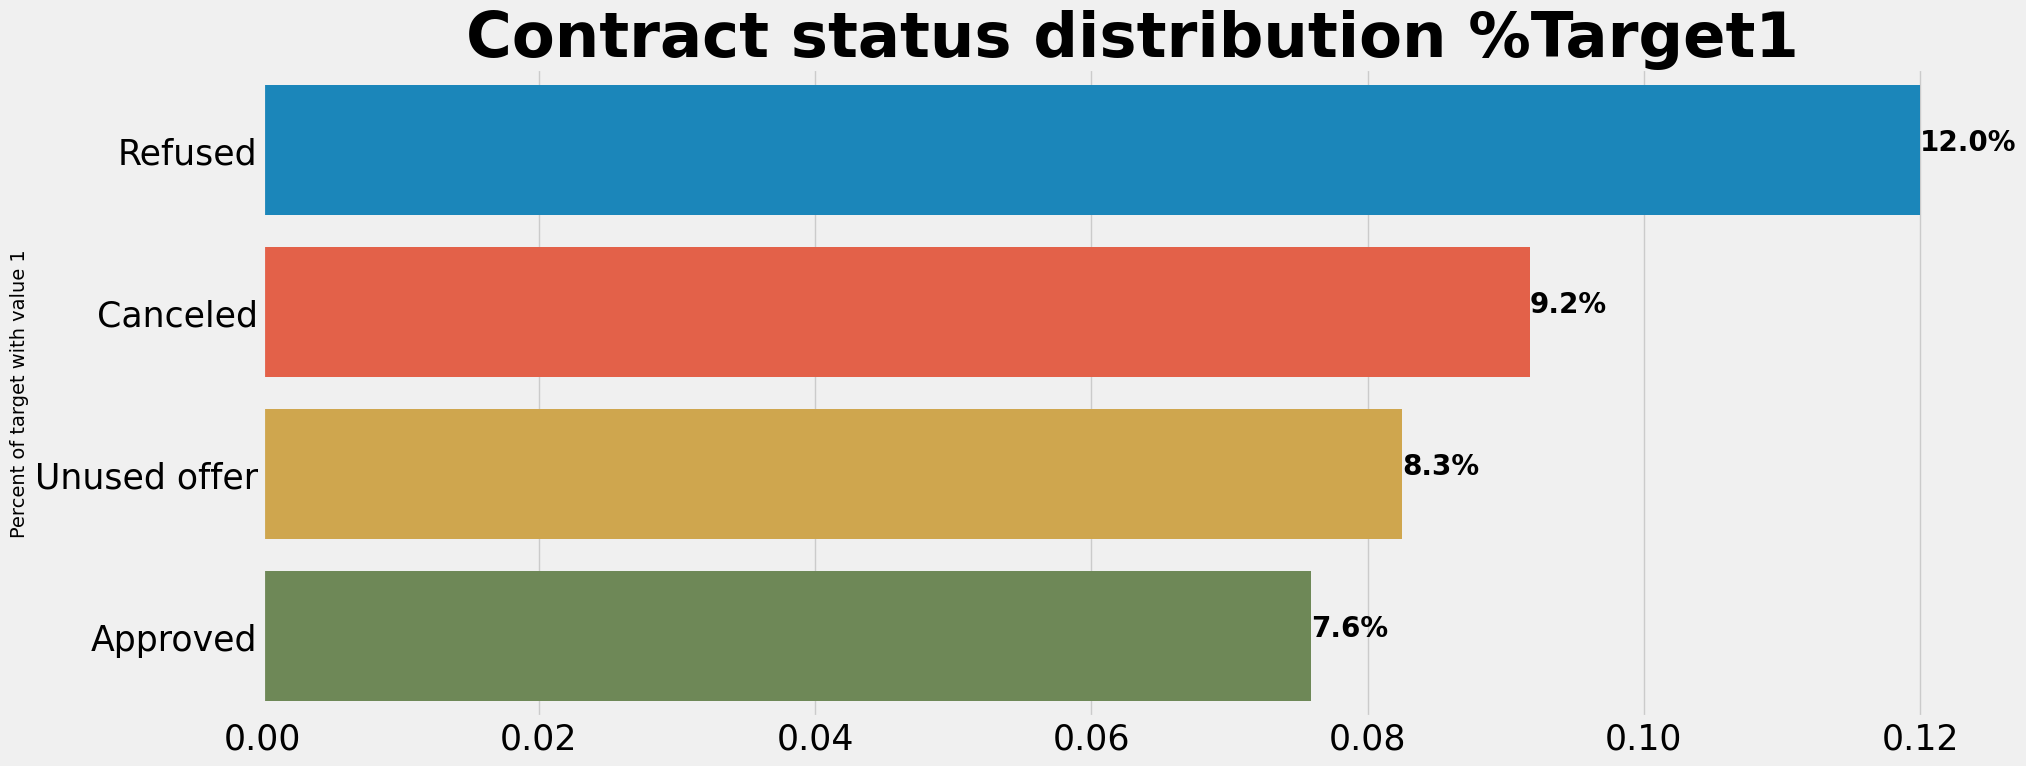

In [48]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution %Target1")

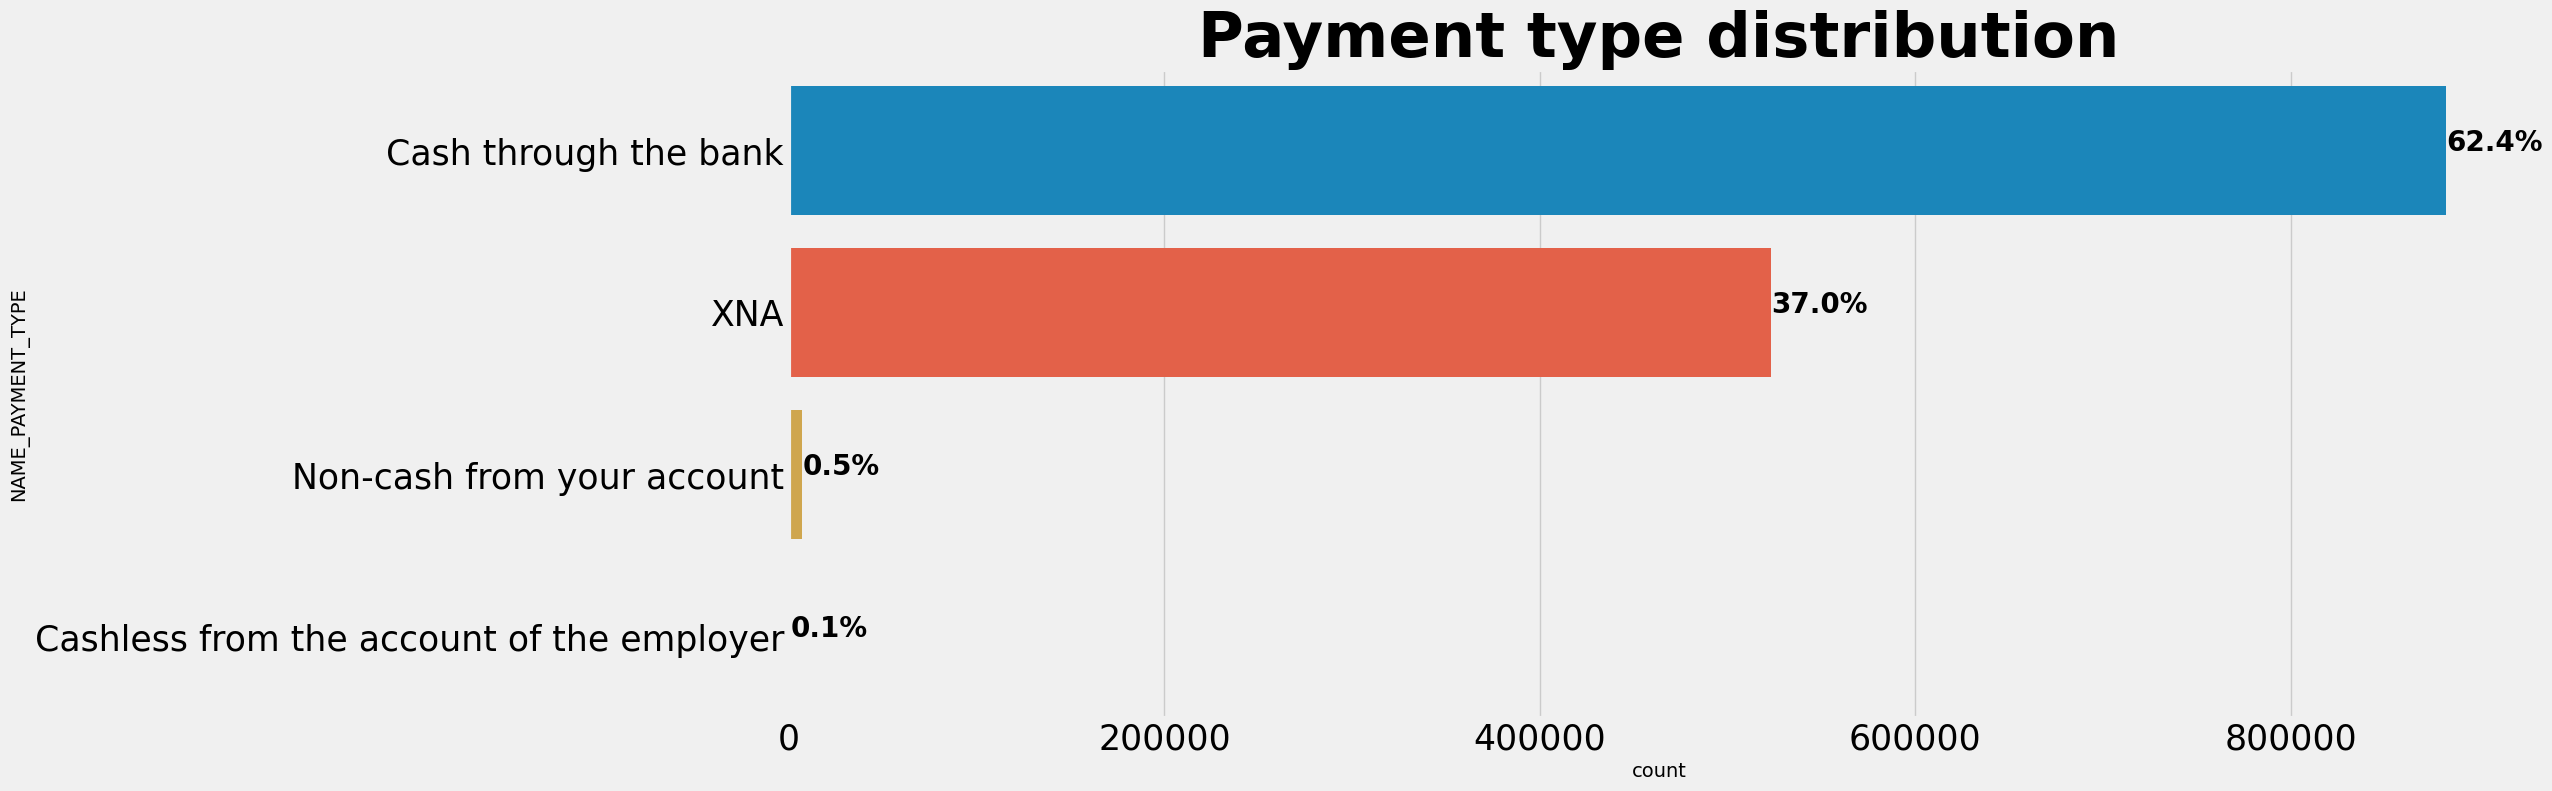

                                   -------------------------------------------------------


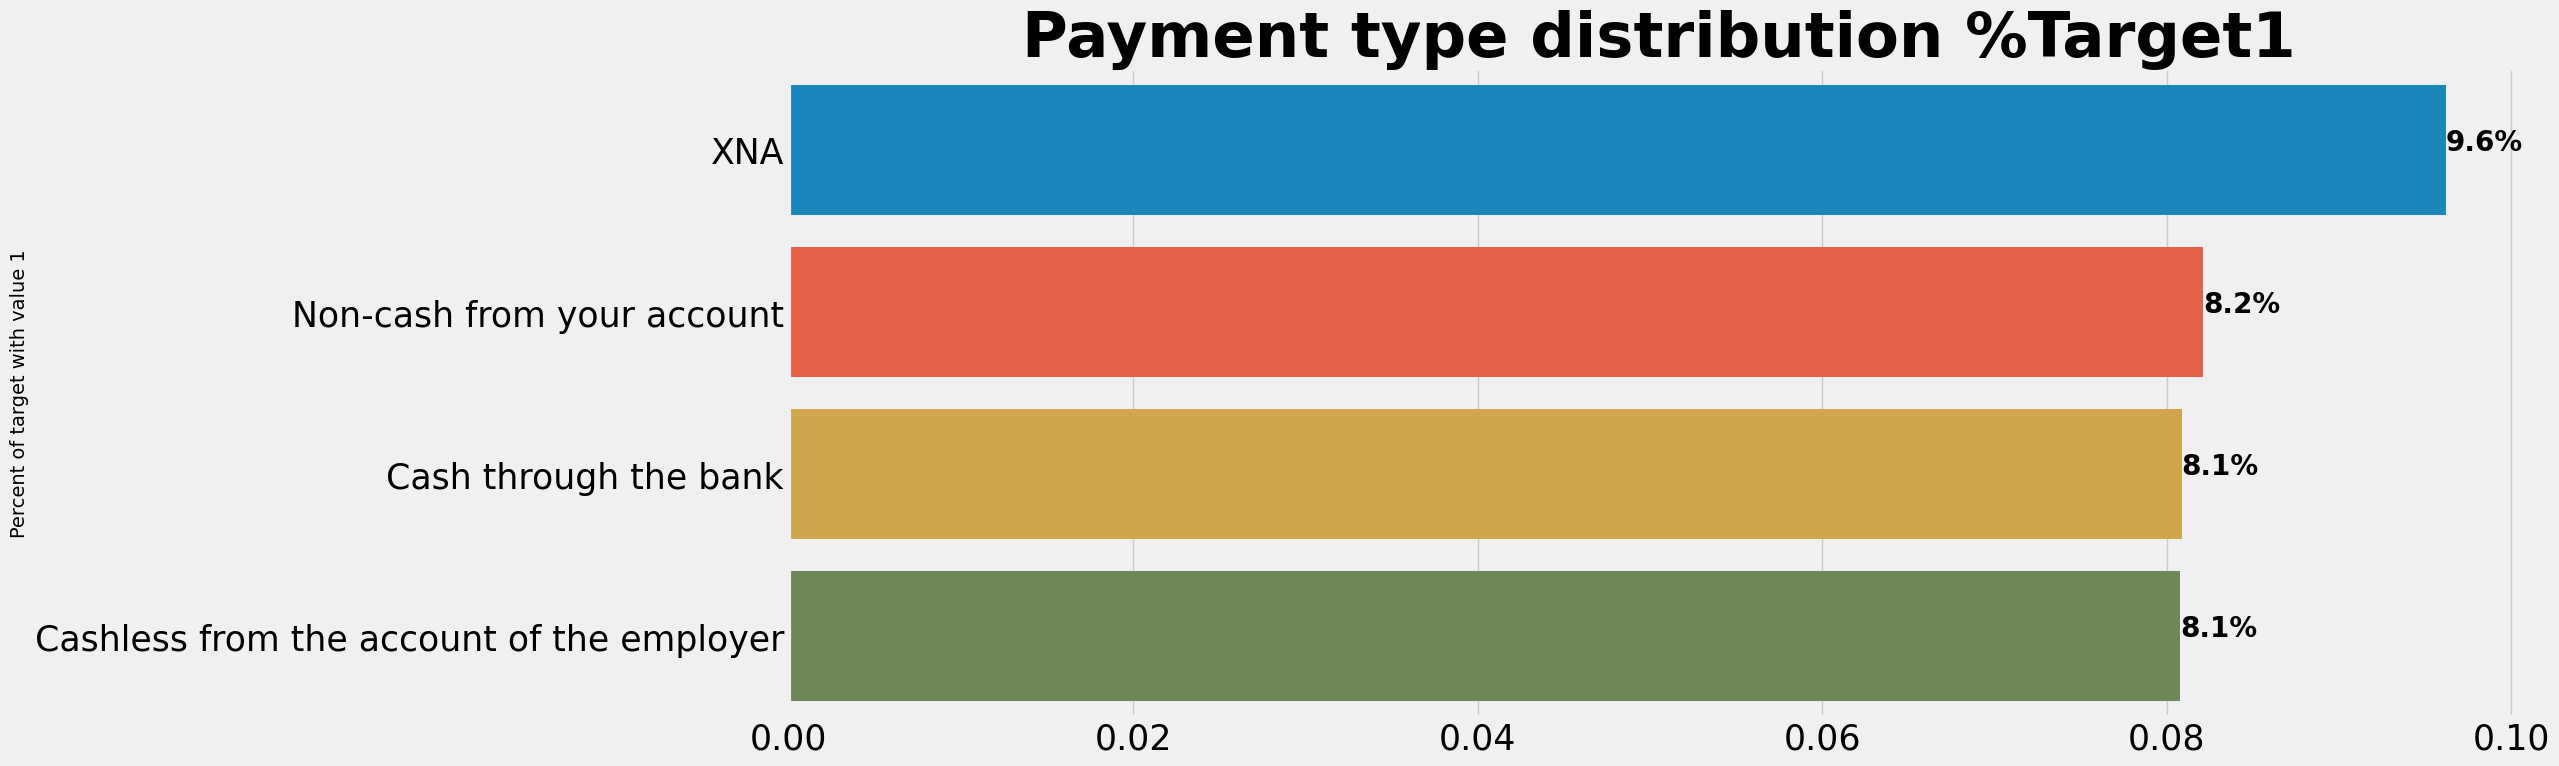

In [49]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution %Target1")

Le mode de paiement se fait majoritairement en Cash via la banque. Le remboursement du crédit en cas de défaillance (Target 1) ne se dintingue sur aucun type de paiement, l'égalité est quasi parfaite.

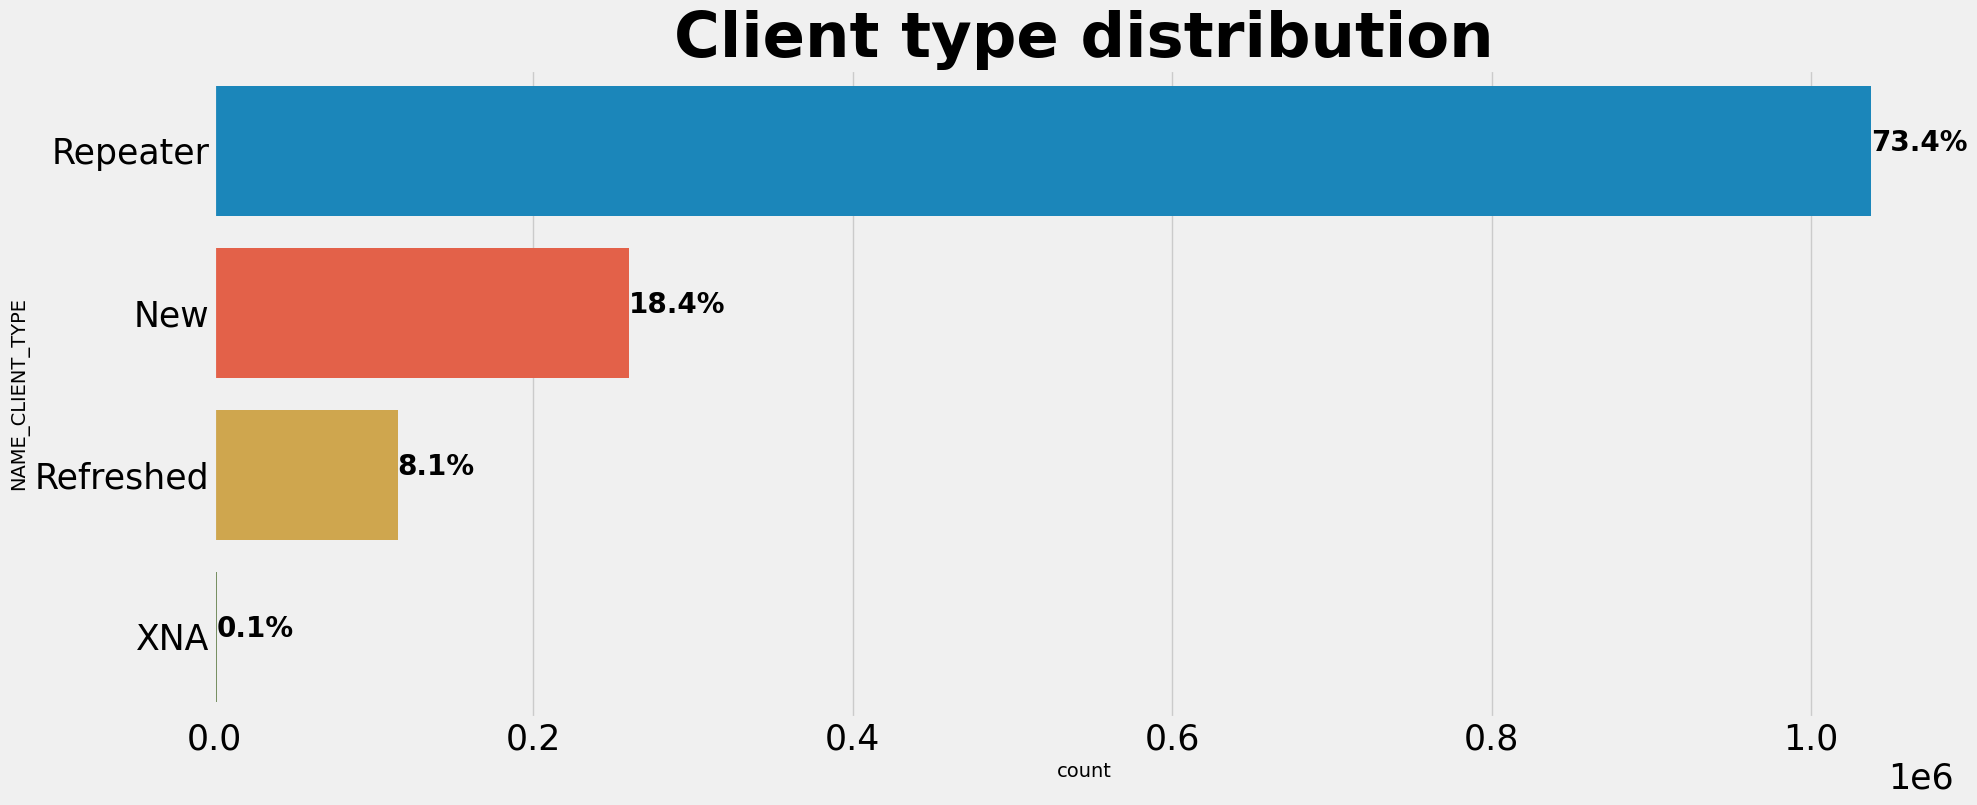

                                   -------------------------------------------------------


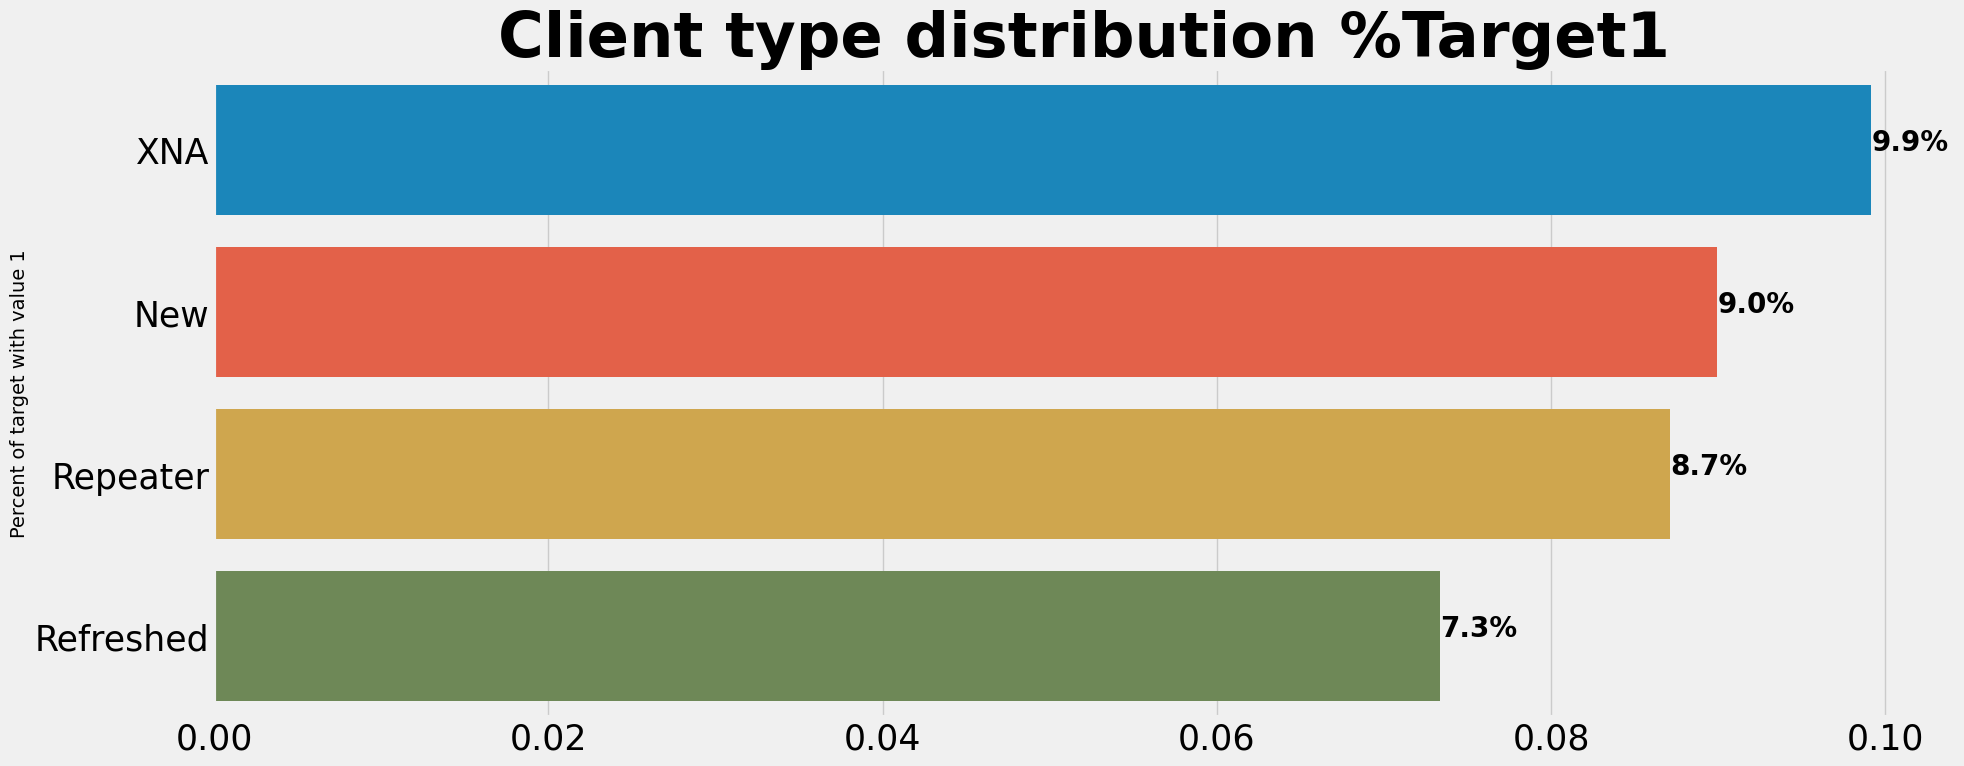

In [50]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution %Target1")

## Merging et agrégations des données
Indispensable d'avoir une réflexion et une étape d'agrégation des données. Des informations complémentaires aux principaux fichiers peuvent en effet avoir un impact dans nos modélisations. Voyons comment traiter l'ensemble des jeux de données…

In [51]:
#Create a simple dataset with the train / test merge app
data = application_train.append(application_test)

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/1925109627.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = application_train.append(application_test)


Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [52]:
print('Train:' + str(application_train.shape))
print('Test:' + str(application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 122)
>>> Data:(356255, 123)


In [53]:
#Now just in case, let's check if we've got it right
data.TARGET.isna().sum()

48744

In [54]:
sum(data.SK_ID_CURR[data.TARGET.isna()] == application_test.SK_ID_CURR) #all is good

48744

In [55]:
sum(data.SK_ID_CURR.isin(application_test.SK_ID_CURR)) == len(application_test) #nothing else to prove

True

A partir du fichier ``bureau.csv``, il est possible d'extraire un historique sur les précédents crédits enregistrés par les clients. Il peut donc être intéressant d'enrichir l'échantillon avec ce type de données.

``bureau : bureau.csv``

In [56]:
display(bureau.head())
display(bureau.shape)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

(1716428, 17)

Calcul du nombre total des précédents crédits pris par chaque client. Ce type d'information viendra enrichir l'échantillon de travail… 

In [57]:
#Total number of previous credits taken by each customer
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [58]:
#Merge this new column in our data sample
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 124)

``bureau_balance : bureau_balance.csv``

In [59]:
display(bureau_balance.head())
display(bureau_balance.shape)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

(27299925, 3)

In [60]:
#Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns = 
                                        {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/3566919509.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns =


SK_ID_BUREAU  MONTHS_BALANCE_MEAN
0       5001709                -48.0
1       5001710                -41.0
2       5001711                 -1.5
3       5001712                 -9.0
4       5001713                -10.5

In [61]:
bureau_full = bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')
bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_full.head())
display(bureau_full.shape)

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354        Closed      currency 1         -497                   0   
1      215354        Active      currency 1         -208                   0   
2      215354        Active      currency 1         -203                   0   
3      215354        Active      currency 1         -203                   0   
4      215354        Active      currency 1         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -153.0             -153.0                     NaN   
1               1075.0                NaN                     NaN   
2                528.0                NaN                     NaN   
3                  NaN                NaN                     NaN   
4               1197.0                NaN                 77674.5   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MEAN  
0                -131          NaN                  NaN  
1                 -20          NaN                  NaN  
2                 -16          NaN                  NaN  
3                 -16          NaN                  NaN  
4                 -21          NaN                  NaN

(1716428, 17)

In [62]:
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/3973511342.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')


(305811, 14)

In [63]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
data.shape

(356255, 137)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé ``data``.

``previous_application``

Vérification des valeurs de 'SK_ID_CURR' entre data et previous_application…

In [64]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

(1670214, 37)

In [65]:
#Check 
len(previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(previous_application)

True

Comme précédemment, commençons par quantifier le nombre de demandes précédentes des clients au crédit immobilier et ajoutons cette données à l'échantillon.

In [66]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = previous_application.groupby('SK_ID_CURR', 
                                                           as_index=False)['SK_ID_PREV'].count().rename(
                                                           columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [67]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 138)

``credit_card_balance``

In [68]:
display(credit_card_balance.head())
display(credit_card_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

(3840312, 23)

In [69]:
credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [70]:
credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
credit_card_balance_mean.shape

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/299003537.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')


(104307, 21)

In [71]:
#Merge with previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 57)

``installments_payments``

In [72]:
display(installments_payments.head())
display(installments_payments.shape)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

(13605401, 8)

In [73]:
installments_payments.drop('SK_ID_CURR', axis=1, inplace=True)

In [74]:
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
install_pay_mean.shape

(997752, 7)

In [75]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 63)

``POS_CASH_balance``

In [76]:
display(POS_CASH_balance.head())
display(POS_CASH_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

(10001358, 8)

In [77]:
POS_CASH_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [78]:
POS_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
POS_mean.shape

(997752, 7)

In [79]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 69)

``previous_application``

Retour sur ``previous_application`` pour assembles les lignes d'observation selon 'SK_ID_CURR'.

In [80]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

(1670214, 69)

In [81]:
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/1045016262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')


In [82]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

SK_ID_CURR  PREV_APPL_MEAN_AMT_ANNUITY  PREV_APPL_MEAN_AMT_APPLICATION  \
0      100001                    3951.000                        24835.50   
1      100002                    9251.775                       179055.00   
2      100003                   56553.990                       435436.50   
3      100004                    5357.250                        24282.00   
4      100005                    4813.200                        22308.75   

   PREV_APPL_MEAN_AMT_CREDIT  PREV_APPL_MEAN_AMT_DOWN_PAYMENT  \
0                   23787.00                           2520.0   
1                  179055.00                              0.0   
2                  484191.00                           3442.5   
3                   20106.00                           4860.0   
4                   20076.75                           4464.0   

   PREV_APPL_MEAN_AMT_GOODS_PRICE  PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                         24835.5                               13.000000   
1                        179055.0                                9.000000   
2                        435436.5                               14.666667   
3                         24282.0                                5.000000   
4                         44617.5                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_RATE_INTEREST_PRIMARY  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED  PREV_APPL_MEAN_DAYS_DECISION  \
0                                      NaN                       -1740.0   
1                                      NaN                        -606.0   
2                                      NaN                       -1305.0   
3                                      NaN                        -815.0   
4                                      NaN                        -536.0   

   PREV_APPL_MEAN_SELLERPLACE_AREA  PREV_APPL_MEAN_CNT_PAYMENT  \
0                             23.0                         8.0   
1                            500.0                        24.0   
2                            533.0                        10.0   
3                             30.0                         4.0   
4                             18.0                        12.0   

   PREV_APPL_MEAN_DAYS_FIRST_DRAWING  PREV_APPL_MEAN_DAYS_FIRST_DUE  \
0                           365243.0                   -1709.000000   
1                           365243.0                    -565.000000   
2                           365243.0                   -1274.333333   
3                           365243.0                    -784.000000   
4                           365243.0                    -706.000000   

   PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION  PREV_APPL_MEAN_DAYS_LAST_DUE  \
0                              -1499.000000                  -1619.000000   
1                                125.000000                    -25.000000   
2                              -1004.333333                  -1054.333333   
3                               -694.000000                   -724.000000   
4                               -376.000000                   -466.000000   

   PREV_APPL_MEAN_DAYS_TERMINATION  PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL  \
0                     -1612.000000                                  0.000000   
1                       -17.000000                    

(338857, 52)

In [83]:
#Reminder…
print('data shape', data.shape)

data shape (356255, 138)


In [84]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461         -637.0            -3648.0   
1                    0.003541       16765        -1188.0            -1186.0   
2                    0.010032       19046         -225.0            -4260.0   
3                    0.008019       19005        -3039.0            -9833.0   
4                    0.028663       19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

(356255, 189)

***50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.***

## Features engineering
Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

### 3 features extraites des précédentes étapes
Pour rappel, les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir l'échantillon de travail. Ceci étant, avant de procéder au merging des éléments, on a pu facilement extraire __3 variables de moyenne et de comptage__.

``PREVIOUS_LOANS_COUNT`` from bureau.csv: Nombre total des précédents crédits pris par chaque client\
``MONTHS_BALANCE_MEAN`` from bureau_balance.csv: Solde moyen mensuel des précédents crédits\
``PREVIOUS_APPLICATION_COUNT`` from previous_application.csv: Nombre de demandes antérieures des clients au crédit immobilier



### Création de 4 nouvelles variables métiers
Sans être expert en crédit bancaire, on peut assez facilement apporter quelques ratios explicatifs. D'autant plus qu'une veille parallèle permet de mieux comprendre les enjeux attendus. Voyons ci-dessous quelles features est-il pertinent d'intégrer.

``CREDIT_INCOME_PERCENT``: Pourcentage du montant du crédit par rapport au revenu d'un client\
``ANNUITY_INCOME_PERCENT``: Pourcentage de la rente de prêt par rapport au revenu d'un client\
``CREDIT_TERM``: Durée du paiement en mois\
``DAYS_EMPLOYED_PERCENT``: Pourcentage des jours employés par rapport à l'âge du client

In [85]:
#Before…
data.shape

(356255, 189)

In [86]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [87]:
#After…
data.shape

(356255, 193)

In [88]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT',
                   'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [89]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/4123668469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))


Most Positive Correlations:
 REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED_PERCENT                                0.067955
PREV_BUR_MEAN_DAYS_CREDIT_UPDATE                     0.068927
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY     0.074204
DAYS_EMPLOYED                                        0.074958
PREV_BUR_MEAN_MONTHS_BALANCE_MEAN                    0.076424
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT        0.080885
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL    0.085491
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE               0.085963
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE        0.085967
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                 0.086693
PREV_BUR_MEAN_DAYS_CREDIT                            0.089729
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT    0.102917
TARGET                                               1.000000
Name: TARGET, dtype: float64
------------

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/4123668469.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))


Most Negative Correlations:
 EXT_SOURCE_3                             -0.178919
EXT_SOURCE_2                             -0.160472
EXT_SOURCE_1                             -0.155317
DAYS_BIRTH                               -0.078239
PREV_APPL_MEAN_DAYS_FIRST_DRAWING        -0.048803
DAYS_EMPLOYED_OUTLIERS                   -0.045987
FLOORSMAX_AVG                            -0.044003
FLOORSMAX_MEDI                           -0.043768
FLOORSMAX_MODE                           -0.043226
AMT_GOODS_PRICE                          -0.039645
REGION_POPULATION_RELATIVE               -0.037227
PREV_APPL_MEAN_HOUR_APPR_PROCESS_START   -0.035927
PREV_APPL_MEAN_AMT_ANNUITY               -0.034871
ELEVATORS_AVG                            -0.034199
ELEVATORS_MEDI                           -0.033863
Name: TARGET, dtype: float64


Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.

In [91]:
#%%time #save merged data
#compression_opts = dict(method='zip', archive_name='merged_data.csv')
data.to_csv('merged_data.csv')#, index=False, compression=compression_opts)

In [118]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
356250               Y             0          121500.0    412560.0   
356251               N             2          157500.0    622413.0   
356252               Y             1          202500.0    315000.0   
356253               N             0          225000.0    450000.0   
356254               N             0          135000.0    312768.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
356250      17473.5         270000.0   Unaccompanied               Working   
356251      31909.5         495000.0   Unaccompanied  Commercial associate   
356252      33205.5         315000.0   Unaccompanied  Commercial associate   
356253      25128.0         450000.0          Family  Commercial associate   
356254      24709.5         270000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
356250  Secondary / secondary special                 Widow   
356251  Secondary / secondary special               Married   
356252  Secondary / secondary special               Married   
356253               Higher education               Married   
356254  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801        9461   
1       House / apartment                    0.003541       16765   
2       House / apartment                    0.010032       19046   
3       House / apartment                    0.008019       19005   
4       House / apartment                    0.028663       19932   
...                   ...                         ...         ...   
356250  House / apartment                    0.002042      -19970   
356251  House / apartment       

## Preprocessing des données

### Split train / test data
Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [92]:
data_train = data[data['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(application_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis=1)

In [93]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [94]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 192)
Testing Features shape with categorical columns:  (48744, 191)


### Encoding categorical features 


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/11043732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.loc[:,col] = le.transform(data_train.loc[:,col])
/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/11043732.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_train.loc[:,col] = le.transform(data_train.loc[:,col])
/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/11043732.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attem

3 columns were label encoded.


In [97]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 192)
Testing Features shape with categorical columns:  (48744, 191)


In [98]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [99]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 313)
Testing Features shape with categorical columns:  (48744, 309)


In [100]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [101]:
print(data_train.shape)
print(data_test.shape)

(307511, 309)
(48744, 309)


In [102]:
#Copy before imputation of missing values
train = data_train.copy()
test = data_test.copy()
train.shape, test.shape

((307511, 309), (48744, 309))

### Imputation des valeurs manquantes 
L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables  correspondantes.

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  15543705
Missing values in test data:  2277621


In [105]:
imputer = SimpleImputer(strategy='median')
data_train.iloc[:,:] = imputer.fit_transform(data_train)

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/863025954.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_train.iloc[:,:] = imputer.fit_transform(data_train)


In [106]:
imputer = SimpleImputer(strategy='median')
data_test.iloc[:,:] = imputer.fit_transform(data_test)

/var/folders/bv/sjkhlnjd4pb40pjnc0ykwp340000gn/T/ipykernel_1697/2078371380.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_test.iloc[:,:] = imputer.fit_transform(data_test)


In [107]:
#Check Imputation step
sum(data_train.isnull().sum())

0

### Standardisation des données 
L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [110]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_test)
scaled_test = scaler.transform(data_test)

In [111]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index=data_train.index, columns=data_train.columns)
data_test = pd.DataFrame(scaled_test, index=data_test.index, columns=data_test.columns)

In [112]:
#%%time #save training data
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train.zip', index=True, compression=compression_opts)

In [113]:
#%%time #save testing data
compression_opts = dict(method='zip', archive_name='data_test.csv')
data_test.to_csv('data_test.zip', index=True, compression=compression_opts)

In [114]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index=True)

#### Même opérations avec les données avec valeurs manquantes
L'idée de pouvoir optimiser les data avant imputation des valeurs manquantes de manière à pouvoir également modéliser, puis, si nécessaire, comparer les prédictions via LightGBM qui tolère les NaN.

In [115]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [116]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(test)
scaled_test = scaler.transform(test)

In [117]:
train = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
test = pd.DataFrame(scaled_test, index=test.index, columns=test.columns)